# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

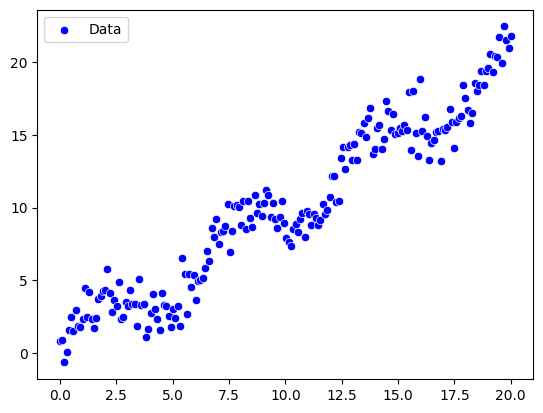

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([0.8238]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [17]:
data_point = next(iter(training_loader))
data_point


[tensor([[16.4824]]), tensor([[14.4381]])]

In [19]:
# construct the model using Linear block
in_features = 1
out_features = 1
model_2 = nn.Sequential(
    nn.Linear(in_features,16),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU(),
    nn.Linear(32,8),
    nn.ReLU(),
    nn.Linear(8,out_features),
    )


In [20]:
loss_fn = nn.MSELoss()

In [21]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [22]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [30]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

2.6264424324035645
8.440403938293457
11.815519094467163
17.14538836479187
59.891207456588745
64.20929551124573
73.01345944404602
81.01820302009583
81.18894052505493
82.0442606806755
83.77473479509354
84.67102462053299
91.46939498186111
94.24953943490982
94.4268057346344
98.776540517807
98.86900531500578
103.21337949484587
109.18602239340544
109.78900533169508
109.81234052032232
111.8798628076911
119.19852306693792
127.41964771598577
134.1967597231269
135.4922563061118
151.53639998286963
176.63938727229834
193.77718176692724
215.64794363826513
240.22581305354834
241.049979172647
251.65574165433645
251.98151191323996
252.64260610193014
264.7156356200576
264.71792329335585
270.1904717781581
275.1733023026027


277.3808671333827
279.71298326039687
281.00416327500716
287.953155527357
287.9533285307698
288.12429959652945
289.65277380822226
290.12247506855056
298.1037725615315
307.3084444212727
340.08823339222
346.30905668018386
346.6697922158055
366.7618561196141
367.8452459978871
368.0953990924172
372.7246958720498
372.7319315825589
373.0452437256463
373.0453176240844
374.00098136471934
374.0121689833177
391.89285288224346
399.72317181000835
400.19071803460247


414.80631671319134
416.49392280945904
416.95321179399616
418.9392384387029
419.07942032287247
430.0460684246791
433.8907346672786
449.0223255104793
449.2497255600465
462.6854193008912
463.11097321877605
464.3622506655229
504.38744292626507
504.67748610148556
507.54918471942074
507.97115717301494
509.22277496228344
509.28828010181314
509.4448453656805
519.4038335553778
552.1165944806708
568.5698320142401
569.8025076858175
573.1951694957388
586.9993296138418
588.3061528674734
588.3180586652306
588.3187073749432
588.5189040881523
596.5057524424919
597.8774256688484
603.1744828206429
604.2562097293267
605.4768322688469
608.25533830942
608.262429820461
610.3213413824269
610.4257781972119
612.3627933730313
614.6880826224515
616.1034645308682
620.6555761565396
626.272656368179
626.7357898821065
627.0759621431062
627.2846889217326
629.4180729110667
634.6020090301463
635.3962703664729
636.9208826740214
637.1585772355029
637.180524658499
638.038980495272
641.6645934694388
644.6554892175773
645.0

Epochs:   1%|          | 1/100 [00:00<01:12,  1.37it/s]

771.234141905763
791.7260089711926
793.4712744550488
793.7679882840894
801.8932629422925
804.2578109102033
828.7974932985089
832.4420524434827
832.579143677809
833.2629195199988
840.5199709878943
865.8306265817664
867.3534325109504
870.1534028993628
876.5322962747596
877.8135517583869
878.000197325804
878.0253170681826
886.620457525336
886.6211115898041
888.1589830697922
888.2757227898983
888.4143919826893
893.3631238819507
901.1048159481434
901.1074620218424
901.1293309622852
909.3517192298023
930.1980555945484
951.2982810431567
951.9100852304546
955.2984624200908
956.9558790021983
958.5163953596202
959.3176840835658
959.4699420922843
960.884975671157
963.4026544087974
963.5351200991718
982.9041024142352
984.1652167731372
988.0510793620197
989.4125909501163


2.6090376377105713
9.70649266242981
21.15332055091858
23.000616908073425
23.022714277729392
24.40647997520864
38.64450468681753
47.880220552906394
47.925563683733344
62.45788370631635
64.44945680163801
74.93595944903791
75.27018602751195
83.65008695982397
84.18686266802251
104.30813380144536
114.98586722277105
115.50498678348958
125.07677175663412
150.96750738285482
151.09774683974683
152.03205214999616
160.53893195651472
162.3254322912544
182.7576126959175
183.71395849250257
188.22057794593275
189.07468490861356
189.48271094821393
189.51211476512253
197.54050660319626
213.90102029033005
215.93175363726914
216.4203484673053
217.89596790261567
238.69472927041352
238.87009026296437
243.38003041036427
244.8361008334905
247.03494240529835
251.82067467458546
262.04353310354054
262.39479474909604
263.7073805797845
267.54194407351315
267.63306977786124
272.0204618219286
285.4110400918871
287.2164991144091
287.75491246022284
287.84461527504027
290.7260194364935
291.0660888198763
303.3565904144

449.4846756433981
468.03748440499476
485.7549927210348
487.2034755920904
494.5924221252935
498.0665868496435
498.6587483262556
498.85443401093653
498.92792846764496
499.7284448346036
500.03822409118584
501.17421816791466
503.5903966328042
513.0777299305337
513.1889688199299
527.522347611739
528.8159584229725
534.0440797036426
541.4073433106678
545.373462600066
546.2544765299099
550.9284901445644
551.099667904331
571.083144543125
579.0072435116308
579.5846738791006
580.6341742252844
583.6466320728796
591.630661842777
592.8649194216268
593.7661022519605
599.4476341580885
599.7034313952463
608.1398747241037
608.9217140352266
608.9230270690896
610.1769227094628
611.050914914129
612.2322244949319
612.6657267518021
642.0212393708207
652.2616101212479
653.3337371058442
654.2368792004563
656.4861525006272
656.4875221491238
664.3233099222562
685.0702257395169
685.0710277931212
686.2574031726836
686.5363179819105


Epochs:   2%|▏         | 2/100 [00:01<00:48,  2.03it/s]

686.6665206180332
690.270118497443
690.4326154218434
690.662281088662
692.7216632889031
693.1432155297516
693.4868467972992
710.4585264847992
710.5344572515605
711.9406813831447
715.4509190769313
728.8595618457912
731.3320848198055
738.2308079452632
738.6449349970935
744.4332049937366
744.8606014700053
745.8024050445674
745.826588684824
747.015712076929
747.560571367052
748.0768110697536
750.621554846075
751.9979120438365
753.4629100506572
755.8065940087108
758.7673114483623
760.5426503365306
760.5648571421771
765.5282980372576
765.7972588112025
765.9109794815449
771.0742737968831
772.3709364851384
782.8182669599919
783.1247920115857
783.3320174684195
783.7108183672099
784.9273173381953
791.7100450565486
791.7152082073881
793.4791878807737
794.1230498898221
794.2076001662208
797.3983612555458
797.8378368216945
798.0536275851919
799.3799488294317
799.3828370758711
801.0579954573332
802.4908582159696
809.761475701016
810.6743441411672
811.9632495233236
814.5720744916616
816.2584273406683

16.725034713745117
19.26636505126953
24.71464490890503
26.040715217590332
32.34724283218384
32.884032905101776
36.53923958539963
38.17058104276657
39.15216910839081
39.37462744116783
44.863693088293076
45.64621815085411
46.10454398393631
52.28281527757645
54.516256868839264
61.768201887607574
62.50491714477539
68.76463890075684
74.13387680053711
80.03489017486572
89.59505939483643
91.59045958518982
109.40608191490173
124.04792094230652
132.54822039604187
132.67941789329052
140.33128575980663
141.14320282638073
145.90035776793957
150.3506164997816
154.5015502423048
155.7999059408903
156.83569340407848
156.85584879480302
160.8005421217531
161.74923712573946
172.797207897529
214.1067133601755
214.10728211276
215.17464299075073
216.2166183697409
245.06190569273895
245.59495402447646
247.49149240128463
254.66305364243453
259.451807151956
260.638937841577
263.30738748185104
263.348789073003
268.2434161672718
268.3293388033635
268.3918988997466
291.29809930868214
291.2983092724753
291.8704662

348.6857147513365
349.86447384938947
349.9992854593729
354.7048795221781
358.50733041748754
358.5346666125988
358.7297604380583
359.9475682078337
365.81812933072797
389.7110698519682
390.0437951682543
407.28625351176015
407.504645466659
407.7816807626223
430.4882714150881
431.40320938811055
431.4080084663292
431.620589668717
445.7203506779333
448.0817460369726
454.3677105259558
470.23322909590206
471.42389636751614
471.52821794417105
471.8022107508441
473.2605640318652
475.72892898585997
476.28356737163267
476.9189381625911
477.58615821864805
483.4090036776324
483.4261968106439
483.42759822969674
484.76726626520394
484.9855717784667
493.4899386531615
497.1550351745391
497.17437962730764
508.05174569328665
508.60504929264425
509.8165932103002
510.56177691658377
514.4432528420293
514.4433057067508
520.6156570670719
528.6050016639347
528.7245208901877
529.5670798105712
533.5241201204772
533.5242802096618
534.4449210358871
535.0064751697792
535.0084668196359
535.0122540654702
545.424886053

Batches:  35%|███▌      | 70/200 [00:00<00:00, 699.36it/s]

13.073643684387207
19.017518997192383
19.018930125865154
22.82232945028227
40.69158642354887
48.81138699117582
51.733338046702556
56.44306628766935
70.28904025617521
78.85480372968595
80.41395692888182
81.93329958978575
86.64098935190123
87.47642200055998
87.76631753507536
89.67972414556425
95.06052963796537
100.31247036519926
100.32810144487303
107.9077156073181
109.38395779195707
109.97007958951872
111.64419632020872
116.9343245512573
116.93840316066053
116.95065419597086
117.7283477060264
118.95876221579965
119.81006168050226
119.9819600902265
120.00940053013619
120.06062484753784
124.9861600495642
125.13878891838249
129.14558194053825
136.65026734245475
144.34955904853996
149.51765654457267
150.07586036098655
152.05779264343437
152.3403039969271
154.26894138229545
154.30209139583167
159.86961487529334
161.17581239936408
162.43169728515204
162.43406561843585
164.00156573287677
197.0793550395174
206.06098822585773
208.9197361849947
211.23567656509113
211.75358716479968
226.9435581349

298.3747950642137
299.48380886006635
312.9625896065263
315.11670361447614
318.99143634724896
319.0022139175562
322.6577999218134
322.76852777588647
326.59501126396935
331.99631693947595
342.6718969641952
342.7013889084337
354.9888616333483
355.367912901449
355.49928766291123
356.83639555971604
358.326167164254
361.924795446801
365.83944397966843
366.47855120699387
368.4896031002281
369.6661536077736
369.98848092358094
378.7457574586151
379.1585746387718
383.9396343807457
402.7966728786705
424.74407964746933
425.1384561936138
425.15193436841946
450.4054114649771
450.9603794644354
455.03405223588925
456.08062468271237
456.16772851895075
461.50985059689265
470.27608118008357
470.33966299693566
473.91372200648766
479.96325775783043
481.50713559787255
507.4863416830776
507.4863537153178
517.1396330198222
519.3015516599589
519.4494705995494
534.4971381029063
535.8004395564967
535.9315142681771
540.3843412449532
540.4077928340012
541.2376430308395
541.3139955004626
541.5296197285825
557.92301

Epochs:   4%|▍         | 4/100 [00:01<00:35,  2.69it/s]

618.8594154616767
619.0801633348638
619.7725575914556
627.3253229608708
636.6404932489568
647.4121464243108
648.9817617883855
649.6458601703816
649.7017345962995
655.6869373856061
655.8292727259868
658.6122929839366
659.396457174229
666.3559703616374
672.976480939793
673.0600843889588
673.5781936509484
675.2906712157601
683.5943525893563
683.8942922813767
686.8573025925034
687.0825435234183
705.461424977886
706.1179935051077
706.7695768190497
727.2369230104559
730.2771966768378
734.0476973367804
755.1285822702521
760.9713280511969
761.6582236004942
771.5041575146788
778.3986482335204
779.0252217961424
784.403722734558
785.9339447928542
786.1606595678204
790.7778375310772
805.7317149801129
806.3346572084301
816.0176196260327
817.9330282373303
828.3569755716198
828.8631212277287
829.9166605038517
830.8098687691563
830.8182042431035
833.4091516327062
833.4118841776108
833.7842819580292
834.4875321873878
841.9846821316933
842.532091606543
844.790407646582
845.5549082049583
846.569960046694

1.2887407541275024
1.30875463783741
1.656925991177559
1.734574094414711
3.2608496099710464
3.459093376994133
12.087673470377922
12.550261959433556
17.095634922385216
20.352094635367393
20.673857733607292
21.623498126864433
39.59448163211346
39.60713502857834
40.28171417210251
40.40925808344036
49.65864677820355
57.2201501885429
57.33977592829615
63.558075794018805
64.37240160349756
72.41416395548731
72.41887785913423
88.5178463649936
93.74632956506684
94.12844340922311
95.41043524863198
98.62490754248574
111.48167328955606
111.48526893532835
124.90761123574339
124.95219200453721
137.11117142043076
139.17917817435227
141.1271210273262
155.75940042338334
173.07345109782182
173.07356628761045
189.06966766700498
198.783326953504
235.18131431922666
236.06473246202222
236.07630103439442
236.14039270937792
243.64009420931689
257.54272692263476
257.8655330425536
272.63145844996325
284.82324235499254
287.24910776675097
290.7149211651122
310.39755933344713
312.82184474528185
313.57517896950594
3

Epochs:   5%|▌         | 5/100 [00:01<00:33,  2.84it/s]

737.9483121852099
738.2881602565467
739.5771089116752
754.5127082387626
755.6507401982963
758.4905193368613
761.7119899312675
761.9107418725907
761.923727293004
762.0281671848788
764.7873195972934
769.9795908298984
769.9797273109434
774.744082016754
774.745848966646
778.0082627068041
778.2397567013977
778.678444890189
786.1381025592564
786.3670697192429
789.7515859584091
797.1739754657028
797.7375402430771
797.8250047246693
798.1370061318157
798.873217252898
800.5015307943104
800.9514231065987
807.5641474107979
808.688186107087
812.0587720255135
821.5147971491097
821.9904939512489
823.4879030565498
827.427055297303
827.4272747065552
828.884328129483
837.3336832549103
837.8068563069828
837.816473685918
841.4588894478657
841.4718872604572
842.5933561620914
844.1966163215839
850.4050270614825
850.4113061658718
853.1030004255153
853.2767286531307
854.4879236451961
854.8254930607654
854.8356023437955
862.937211573837
862.9382679186674
866.1928212366911
871.7505805216642
871.7724060457113
87

0.013097815215587616
0.06895646080374718
2.179948415607214
10.846202459186316
11.301343765109777
12.300497081130743
15.647510554641485
19.414502885192633
19.66969370469451
19.890225883573294
26.242993351072073
27.296196814626455
30.809261675924063
39.383509036153555
39.94231438264251
55.16735577210784
57.587103363126516
134.0284333191812
134.42930632457137
213.08106261119246
254.36949568614364
259.0432270132005
263.31487780436873
263.39145390316844
263.89613370224833
267.9271767549217
277.6835768632591
288.7992384843528
301.2336028032005
302.0518529228866
313.0999181084335
315.6903228573501
320.64684722945094
322.82791731879115
345.44828436896205
348.4255592636764
354.33934424445033
354.7034372203052
356.31425822898746
368.21018375083804
369.6832058541477
369.6943641388789
371.01716763619334
373.2212899411097
374.94728488568217
375.51951868180186
376.09565300587565
377.78532869461924
400.3636139119044
408.478795834817
412.28381712082773
412.95858509186655
418.4937432492152
419.57605940


Batches:  68%|██████▊   | 135/200 [00:00<00:00, 671.19it/s]

481.81977744959295
486.49628206156194
516.1389345731586
544.6204561796039
561.1563105192035
564.9670176114887
565.7466483321041
568.0172631945461
581.7060907091945
582.0158896055073
585.6363617982715
587.138621410355
588.3366238679737
592.0632259454578
593.3255036678165
595.4250062312931
599.170808872208
599.6603117194027
600.4592660870403
601.4228211250156
603.1538815107197
603.4145910348743
616.4583761300892
627.325346192345
627.7379660811275
638.0776353087276
640.6846399512142
642.3587566819042
647.9588710274547
652.888553282246
652.9012404931709
652.9061918538064
652.9392739217728
664.9412709157914
665.0819366853684
665.0889921430498
674.6723585370928
674.6792050874792
689.2229873216711
690.5672575510107
690.763194528874
690.795627606567
691.6361437565647
691.6362003422328
691.6371335283839
705.24004070917
705.3371848807656
707.2955579505287
710.6142778144203
713.3109686122261
721.1196729884468
727.6294328914009
728.7612060056053
730.1620008693062
730.2734763667904
736.866385226043

Epochs:   6%|▌         | 6/100 [00:02<00:31,  2.96it/s]

780.1777029641889
783.5183041700147
784.2667300709509
803.0766456135534
803.4544282265924
803.5698695042156
804.0377444484257
805.0681772687458
805.1010409676455
806.6202102982425
807.1899957143687
807.3376046949052
816.9844075971268
825.5575773053788
828.5994009309434
829.0842947595738
829.3927794330739
829.7549323075436
839.9370936387204
840.74165871078
849.8551621668958
858.5223555796765
858.7501860492848
863.5809117191457
866.1912463539265
867.1105425589703
867.1358977378331
867.2527476147734
868.3289092377745
869.7195322112166
870.1406641201102
872.3898773387991
898.3166217998587
963.7636280254446
974.1896705822073
974.9765983418547
981.123385031613
982.3921770648085
1001.5542196826063
1020.2842688159071
1022.0415793255888
1022.3750088707529
1024.526898910197
1026.0992545382105
1027.1749473110758
1041.842232276591
1042.643999983462
1045.198913504275
1045.667834718617
1049.0860361651503
1049.0907503635608
1049.5591257781707
1049.5677681154557
1049.7547393030472
1061.2400336450883
1

1.527116298675537
1.5597626939415932
13.961166121065617
16.23915074020624
23.42751381546259
32.71141407638788
35.52580664306879
51.40628740936518
51.78325129300356
52.212315924465656
53.49673522263765
55.728339321911335
55.72947362961713
58.115888872765936
59.8834343344206
60.23222045006696
60.47182957234327
61.40996990504209
62.18462190928403
63.1749427706236
63.175126910966355
63.51328030304285
65.23436978535028
66.00162455515238
69.04357120470377
72.24250409082742
72.51114249305101
73.65562558249803
73.88318710104795
74.66662143246504
76.58408103958936
86.33619247452589
90.79786239640089
91.90590070263715
92.14875324146124
98.02770479099127
114.78710992709966
125.73493154422613
126.29072822706075
126.78803823963972
129.87367557064863
161.4086677886662
178.9926750518498
181.87185452954145
185.01074455754133
185.01727740681963
189.5295349828084
190.6826512090047
193.92317716992693
205.43253080762224
205.9249253741582
210.92581610596972
211.19543855107622
215.36499946034746
232.1086441

Batches:  34%|███▍      | 68/200 [00:00<00:00, 677.59it/s]


274.8991706841043
283.5028713219217
284.0929042570642
285.0565472714952
285.9120314590982
286.219770001655
287.07234494615113
296.12970845628297
301.75904147553956
303.6954079144052
307.9162631504587
308.40862493444
308.788496004825
309.31046037602937
310.21495746303117
331.8864395492128
331.89687620982295
342.9939898191369
364.8382490812219
370.2325223623193
370.2930644316948
370.3009022571496
373.013436923211
389.7499176361016
390.2774158217362
390.85832960385596
396.03683883923804
398.8971746661118
399.0110169373802
403.49572906125104
403.5189350642613
406.93278274912154
407.0039873443893
408.24973967898404
409.1398762189201
409.1777412429801
409.2074049920193
409.25912868458545
416.8177424617461
417.3622452564887
417.37441767327255
422.6331819402403
440.81903399102157
448.9929050313658
453.4041541921324
470.2184738027281
477.1619385587401
481.1529599534697
482.4091104375548
489.9379948484129
490.3250861572451
491.4466182398028
508.14606205694145
520.8721868204302
525.9243752168841


Batches: 100%|██████████| 200/200 [00:00<00:00, 641.63it/s]

722.8274917746312
723.8920385981328
724.0301110888249
750.9338853502995
750.9973301733262
757.3435802305466
757.3436075480204
761.317949178956
761.4254525335054
761.5032580377083
770.3081753732185
773.6411009313088
773.641787724082
775.2091707750005
776.7299450202627
781.8844579024953
782.8810085817022
784.548235373084
786.0452255769414
793.7727622552557
794.6464539929075
795.5569489761037
798.1546059413595
798.1985522820396
812.0781060769004
815.0293251587791
819.1440350129051
819.7143712951583
830.7563644363327
834.952720732872
834.9567841910539
838.12369984619
840.3214160823045
843.0605759047685
847.4966711425004
854.0959824942765
858.6772250556169
880.135679187697
880.3103746794877
880.4329016529737
906.7980349384961
908.2981021725354
911.2153082215009
930.6599836670575
930.7638670750675
931.8344641276417
936.5743299075184
938.5851660319386
939.2261196323452
941.726791019064
941.8671886571465
942.5297177084503
958.9646713980255
959.7898109801827
962.1720677264748
966.3334809192238



Epochs:   7%|▋         | 7/100 [00:02<00:30,  3.03it/s]


1.1682730913162231
1.18166636954993
1.2083586631342769
1.252493835054338
1.7347584730014205
2.76856682356447
4.8066191440448165
11.477666831575334
14.033784604631364
25.098548627458513
25.20425472315401
25.238015337847173
33.42559640016407
38.66367356386036
42.793777151964605
47.33368460740894
50.18608395662159
54.02341978158802
56.380494995974004
61.15463106241077
71.50773374643177
72.75704269018024
73.14511780347675
74.20135454740375
78.79983906354755
105.28675846662372
123.58550457563251
123.78051499929279
125.79917602147907
125.92223300691694
126.0371536752209
139.51839108671993
139.54919507261366
139.79668465908617
144.07446757610887
149.1862162714824
151.856142914854
151.9062418146059
168.12495557498187
168.21721980255097
168.99012771528214
169.42892581503838
170.84578758757561
171.5027970103547
176.3701623706147
182.6297205714509
183.18193865101784
185.37237263005227
186.01771432440728
188.07273561041802
189.2681110529229
190.07532757800072
191.19991427939385
192.84377044718713


Batches:  32%|███▏      | 63/200 [00:00<00:00, 625.06it/s]

245.94135745667154
247.3807367911213
250.4379603495472
252.792708121764
252.95680745743448
275.5642312397831
275.56608493666863
279.8242922578356
288.19575889449334
316.8004074845812
336.28525550704217
341.43725259642815
341.85859619121766
363.5565026853583
363.70251484256005
364.8392489705584
371.4045532498858
372.84835477214074
374.24910445552086
384.1853990111849
385.85998471122
398.18139202933526
399.70114345889306
402.12987037043786
424.40469069819665
424.40893575170776
425.595120038779
426.8058143518283
427.36208536842605
429.893404509814
430.1622935793712
430.9445858261897
431.2095744870021
438.0066864750697
439.4829466603114
453.4176790974452
453.8981116078212
453.9540554843261
454.71684258797904
466.0781392417266
467.3507648072555
467.51799465337535
472.2971322647645
472.9765583983972
477.7440988532617
478.89856929698726
478.9115569460555
480.86040996195516
481.37054203631124
483.65990875841817
484.67953251482686
484.9222856629058
486.1664534676238
504.12641059042653
506.68537

Epochs:   8%|▊         | 8/100 [00:02<00:31,  2.91it/s]

900.0179583887548
900.7041206221074
903.707805619666
904.3303620676488
917.3155219416112
917.3181335917652
917.5634073159636
917.577515469955
919.9054318536982
932.3159180750117
941.50238810675
950.5137673486934
950.9881193210349
970.389070706533
970.7518956531749
977.5710346569285
977.8037370015845
978.1929863561854
979.760179625915
989.4712983240352


2.2301084995269775
2.2456263955682516
2.499330734834075
7.294029450044036
7.486129766330123
10.359370237216353
10.984238153323531
39.98303080163896
67.98733378015459


73.94792843423784
74.87996560893953
77.77178747020662
78.87887687049806
90.17013472877443
112.79021949134767
117.37718839012086
117.57190728746355
123.98477054201066
124.3292464967817
124.58965030871332
127.21814886294305
132.2933084126562
137.18802849017084
138.1520516630262
139.21484575234354
139.85580543242395
140.17797005735338
157.3888102825731
157.625401398167
160.55028118751943
164.0350090470165
166.60406412743032
184.65929331444204
194.8257304634899
194.96596341393888
196.0595727469772
198.50614648126066
199.1242337729782
201.30985861085355
201.58633150719106
208.03979649208486
212.37368549965322
215.6284967865795
220.74181952141225
226.53519215248525
227.09958740137517
227.27606759034097
234.35172495804727
234.67437315545976



Batches:  41%|████      | 82/200 [00:00<00:00, 429.37it/s]

240.03342390619218
240.89763105474412
241.25410396419466
249.21211320720613
269.77171975933015
271.1018191035837
271.32194907031953
274.9195643123239
275.2155591007322
276.1065191384405
276.2147474270314
286.5054683666676
288.031771896407
293.26971030049026
297.2100892048329
300.2275679092854
300.43013211898506
302.67902800254524
307.80851599387825
308.19802719168365
310.2175975423306
310.2193907260662
310.2258224914549
310.2546046114294
329.1994574404089
329.55508786800783
330.1567341721384
332.1455454266397
334.94858545425814
335.2121952212183
335.4715702867834
336.5902842617361
337.4451731777517


339.66951075557154
342.5831033325521
343.4364930129377
343.58206455770414
346.046277928981
346.0698702222435
359.9993374234764
361.00344048801344
363.99457370105665
372.9242869502632
381.9922038203804
382.0559593773214
383.21129849913996
388.6682768202154


389.04786816600244
395.4259523487417
398.78517070773523
399.33718291285913
406.6845349407522
413.83717146876734
436.0842284298269
439.20706740382593
441.54689827922266
442.6506792641012
444.7603894806234
451.709067497286
451.71857116080355
484.30318877554964
521.5977215514285
522.7727985129459
536.7491492972476
537.052192096482
539.1670998380287
543.7712286756141
544.1492915198905
548.9294152305229
555.5825328872306
555.6995231480105
556.4163088769419
557.2019128174288
578.1959962219698
587.5769471497042
588.0050502986414
589.6395401925547
589.8226854027016
589.834129478666
589.8712691663532
590.2246805130271
596.8488708435325
597.245820253971
597.9483045040397
599.0150723158149
602.220387190464
602.8315325080184
603.8787665663986
603.9867219178705
604.2846291511087
604.6219113318948
611.769707485917
616.0513694732217
616.0931235215394
623.9258523843018
625.2550037762849
628.6466601750581
628.7693227193085
630.3842131755082
631.4558914563386
635.5703266522614
635.5741378815146
635.9455

Epochs:   9%|▉         | 9/100 [00:03<00:34,  2.62it/s]

796.1302337601664
796.6446459248546
799.3625013783458
799.5828130498412
800.1299738541129
802.213476146746
803.8064646378043
808.2444200172904
808.3183103158954
810.7003815725329
810.7185244589928
810.8553566366318
819.6901811987045
819.917605581868
820.1010921329143
823.5685658782604


1.200569987297058
3.998820424079895
12.175102353096008
23.066311955451965
24.81224024295807
27.396873116493225
29.76416051387787
30.1991965174675
36.53556174039841
36.67623394727707
37.802797734737396
41.29232877492905
41.51893275976181
43.32548886537552
44.59931963682175
49.071281135082245
64.13794678449631
76.55285423994064
77.0702810883522
83.5526471734047
83.90107828378677
84.67969125509262
87.09464854001999
88.90736776590347
90.813243329525
91.33408039808273
96.2608682513237


100.72622746229172
102.32554739713669
102.95405232906342
105.29174840450287
105.30871271528304
105.61374324001372
106.76756160892546
108.08683388866484
108.69312643446028
108.69992843316868
111.75296297715977
116.86851158784702
117.16397038148716
118.17813649820164
123.18118539499119
127.26253524469212
129.66429677652195
133.27057805703953
133.6195881073363
133.61996417603223
133.90976243576733
148.07136731705396
150.35348444542615
150.5931974585983
150.86437507829396
154.84443756303517
156.03939815721242
158.31489583215443
163.0435511704418
163.51541047653882
164.14593231043546
168.59000551066129
170.60713493189542
170.91564952692715
171.30962192377774
171.59830718598096
175.59930663666455
208.93511443695752
217.75280719361035
222.13209682068555
223.13886409363477
230.10428863129346


230.11239999270765
234.9811224315199
242.82216495013563
246.76521819568006
249.44541996455519
255.54659574961988
270.3977290961775
275.17187660670606
276.27336030936567
278.1652706239256
278.4128997150692
283.4546844784054
286.00822947657434
304.3000805202755
304.5261346224579
307.7773634318146
308.87734080589144
325.7274766091141
328.46447612083284
351.94927073753206
367.37671996391146
367.3776605059975
371.94891237519914
385.7923648288124
388.3829991748207
397.62147402070696
403.23136925004655
403.3826935371035
423.5429203590029
424.8387557347887
425.4053214272135
433.466852494108


433.6791154672974
454.67098062537843
472.80844324134523
472.8088149764808
472.9541312047513
473.23012443271
491.2470807620557
503.40909286227543
503.4223885332467
535.5866684709908
541.3396010195138
546.8947057520272
568.5429296289803
569.7786147390725
569.7801007786766
570.6636605421081
575.8348412672058
582.0459203878418
582.0684383017942
582.4206433696672
583.7093798322603
588.9368383092806
590.6280986471102
592.1081743640825
630.9963694019243
671.3349237842485
689.7732592029497
689.8036499014124
690.1553947022185
691.2980089476332
694.4720802595839
697.3900649836287
697.883428006433
700.8300239136443
719.6884948303923
730.3615485718474
732.7889677574858
732.9397777458653


732.9634541952983
732.9634945122561
735.1798712937198
735.1799161491035
736.1583523807167
736.9042080101608
737.3400904593109
751.9746319708465
752.0795396176218
768.1721337643503
768.8009483424066
769.1989523378252
772.8374587503313
783.4208775964617
794.3175269571184
797.7651909795641
823.5651463476061
826.6903511491655
834.4585000482439
835.115021010959
835.1174685697588
849.9582841138872
853.6325764398607
859.565203640941
859.9098883907827
861.8529729883703
874.3414573709997
875.2935100238356
886.5207763354811


Epochs:  10%|█         | 10/100 [00:04<00:39,  2.27it/s]

886.6301892365846
886.730332326475
886.7408026758167
894.817403704259
929.6779917779895
948.8103484216663
950.5298918786975
955.0449594560596
956.7654559913608
963.7191045585605
964.0676220956775
966.7021354738208
966.7021355606603
967.4750426389264
985.7989924527692
992.9908693410443
993.8126861430692
995.3340542890119
995.3646778535085
1001.2734870385366
1001.4293711703258
1001.8248090665775
1002.4057100933032
1007.2079900424915
1007.4422960948186
1008.4964011382299
1012.5237878035741
1017.6759083937841
1018.7548914622503
1018.943970821424
1024.3716484528022
1025.0002716999488


12.238393783569336
12.249116031453013
14.943061439320445
23.386401740834117
23.638789681717753
30.98317435197532
32.58493152074516
35.155722526833415
38.541337160393596
39.85391643457115
49.88527801446617
56.59471013955772
57.65437570028007
70.63766637258232
73.28216710500419
73.84783729724586
75.50922688655555
83.74604996852577
85.17425092868507
85.17568645114079
86.69427046412602
87.30366125935689
99.46346560353413
100.37733844155446
100.75694152945653
109.16173240775242


109.28892967337742
109.63463419908658
109.65395571151748
113.20543075958267
113.53464336553589
117.26381869474426
121.30384678998962
123.31154341856018
123.5771637992002
137.5208884314634
138.18447480956092
138.26533592352644
139.9848243058659
142.8699814141728
143.07360891113058
147.1834068656899
147.19593794224784
150.90517003415152
151.1240556347184
151.33007162390277
157.52541750250384
157.7959846216254
158.8777749496512
165.45133614121005
172.8795936065726
173.88631009636447
184.28355454979464
184.88522821245715
200.17863755999133
200.17882841217215
200.71835886823828
217.113036984083
225.08426129209693
233.18314015257056
235.63060294973548
236.33940559017356
236.86021613466437
237.14886450159247
242.5259234844416
242.5892434580892
242.95577089625294
242.95597180485493
244.9487347280956
244.95143699733308
245.08392976311734
245.0953285348951
247.13642999058357
252.34871074085822
253.06733533268562
254.69308098679176
259.8758836639463
268.7599120986997
269.57190563803306
269.823860

278.76901603577426
296.31377387879184
298.2698861443787
306.6879998528748
306.8389224493294
311.0221843206673
314.90015883086016
315.8268929803162
315.89633237657836
323.87415992555907
323.8895481265499
332.7164323962643
334.03360456594964
336.2572974599316
349.5883521474316
349.60189661284676
372.7198489596485
378.8279131343006
379.016296460235
379.0169927830575
386.91336462448817
390.2596504444955
392.35984919022303
398.6655719036935
408.2652413601754
408.36751181434374
408.9465060288785
414.20007515500765
415.07166886876803
416.0555940325139
420.8005929643987
424.81745249580126
426.3599030430196
428.9739245827077
429.20390776346903
429.60166544269305
430.28405285428744
440.1036825234769
442.4215762669919
444.6680901105283
471.07517552922945
488.64552808355074
493.5751359517453
493.65892866801005
494.01550406764727
494.2189495618222


494.3893865401624
505.94671190332156
516.0656780059217
521.6620463187573
521.9698559994576
522.6746937985299
527.8685142750619
530.0890183205483
533.0286936516641
533.9725113267777
536.035075222957
537.2124948854325
538.6784184331773
538.7737645263551
538.9167821313022
541.2552077675937
543.3332281018374
549.3462624455569
549.9476660991786
551.4457048679469
551.4713336656569
551.8175840209005
552.2606658766745
554.7710745165823
565.0453483889578
574.5655214617727
575.7862746546743
577.1714780161856
586.4572093317984
586.6381597052095
587.6929482946871
592.760122729349
594.1010248194216
594.2203621173976
595.0126231814502
608.6142743731616
608.69295859884
621.7629268224118
621.7630071169842
621.8581171832193
624.6306470236887
625.5710924468149
626.4141206941713
628.6972637376894
639.3056230745424
639.7960177562345
647.5691805980314
653.4959741733182
653.6687742821086
657.5629204861034
659.0248934379924
664.0213576904644
671.5185076347698
685.6348387352336
686.0280488780845
692.694881325

Epochs:  11%|█         | 11/100 [00:04<00:40,  2.18it/s]

712.0323875765462
713.6259911875386
720.9659570078511
729.372454009499
733.4126046518941
734.4761126856465


0.993398129940033
3.8881399035453796
8.765625655651093
9.321278750896454
9.88333284854889
17.479970574378967
48.213576912879944
58.71775782108307
61.56058490276337
85.95499408245087
86.5737818479538
88.1733056306839
88.74576669931412
92.21963101625443
99.28042298555374
99.5785384774208
115.91091305017471
117.52002793550491
120.02321869134903
127.21909576654434


127.69750636816025
129.84500616788864
132.10457509756088
132.40644988417625
132.53277181088924
132.53450612106826
134.76600746193435
134.76921662164386
134.78144803119358
142.77739253116306
142.77739506765283


146.05037742658533
146.58607387348093
146.63017028375543
146.6302549035936
150.7800032289415
159.19864336566025
160.7163715751558
179.9271984489351
180.72999165371948
180.86070098892742
217.917608642736
222.1892951966911
222.65085619107776
229.80220716611439
232.0902494730144
239.44996302739673
240.33071916715198
245.85507696286732
245.9971792490869
257.47640536145263
264.8479263575464
264.9260183589249
324.0807272212296
362.07817900345617
365.93841421768957
372.9214116351395
376.61962258980566
376.7430148513704
377.8048712404161
380.71733275965744
381.19180823282295
381.7996013255506
401.29489971117073


409.0640742869764
409.7916725964933
410.1220344992071
412.6951872797399
413.23663384632164
425.98159939960533
427.12492890075737
438.558111617127
439.1711617799192
440.00229997352653
444.1840230913549
444.37134909049564
444.44369677619034
446.7736304195314
447.7662094028383
448.51291690186554


454.69952330903106
471.3431790860086
471.97444931582504
477.9713932664781
499.3546978624254
508.10714880541855
522.1310192735582
531.1143662126451
540.5377651842027
541.6820768506914
542.0169513018518
547.1092655451685
547.2218525128155
549.8769530968457
551.0463912205487
553.911183567503
554.2601090984135
554.3250524716168
554.84717980192
556.7845831231862
556.8524985106378
564.0201554091364
566.4783513338953


570.2631969244867
572.896108368197
572.9936713592797
576.5605546848565
578.5552904026299
579.0641481892853
579.6371148245125
581.2169863598137
604.4471766369134
604.5365099401861
604.5368153536292
605.7070879423591
606.7001230204078
608.5894684278937
613.4901656591865
615.1278124535056
615.3344245040389
616.2007407033416


Batches:  60%|██████    | 121/200 [00:00<00:00, 220.78it/s]

616.2609578603478
616.2725385389822
625.3919624052542
625.4052681950452
627.5133578804853
629.5922222164991
629.9549009827497
634.5865447548749
641.4164865044477
641.4338341680887
646.0185686079385
647.6430401531579
647.738393898082
653.2256990624192
653.5182391060116
659.512610043359
659.8592979563
668.0226585520031
669.3791474951031
669.6036445004465
669.6041755204387
670.8099104886242
681.6843955044933
682.3268044119068
692.5698731069751
693.093214643497
693.9862967257686
694.9413051729389
706.5703573351093
717.1900634889789
720.0764858846851
730.1801922445484
756.6414291982837
768.226861250896
771.5862231378742
777.6626086359211
782.6929988985248
784.1079541568943
793.1378823642917
803.4314977054783
808.1848346119114
829.5038272266574
832.6351558094211
832.7226902519651
834.5388547455259
837.3909801517912
837.9612861548849
838.3634557103105


Epochs:  12%|█▏        | 12/100 [00:05<00:49,  1.76it/s]

838.4584105511494
839.4367774029561
839.437147631852
850.2977175857704
850.4088335703891
851.8665615986865
855.8765470456165
864.8768674801868
866.4687535237354
866.8129194449466
870.0850415896457
874.1875348757785
882.9045282076877
882.9094706136566
883.1112629581075
884.5422695088964
888.0614431310278
892.252147953568
893.2370874691587
893.8638723898512
895.0768412161451
924.9292276907545
925.5014005709272
926.5863355208021
945.5586198378187
945.5592635050598
945.7033336386266
946.4793628081861
949.1436062678877
950.8432535752836
951.1866855845037


1.2991594076156616
9.666686415672302
10.191204190254211
10.250907130539417
12.267156310379505
14.792640157043934
14.883758381009102
15.057625353336334
15.062889002729207
16.3755316962488
19.625589155126363
20.032074802089483
20.06609419779852
27.219842710066587
28.005405225325376
50.498233594466
64.23657397227362
67.48286727862433
74.41795400576666
74.54159848438576
90.34691254841164


122.45199601398781
126.83558528171852
131.5061256145127
140.91058747516945
141.31243957625702
145.69911254988983
146.25056900130585
177.94447387801483
186.96387924300507
188.41616143332794
208.53066529380158
216.03427161322907
216.6904557500966
218.78065498219803
219.4726525102742
226.37087257253006
227.53651185380295
232.64767642365769
236.2138087307103
237.0018239771016
240.48114211903885
243.01409418927506
247.41078360425308
248.38109155045822
248.82516266452149
253.81087137805298
255.27356864558533
255.49945773230866
258.3616920863278
264.50592769728974
264.83243836509064
269.2716878806241
269.5949544464238
271.70063705788925
271.896964088548
276.21475125895813
278.40348435984924
282.83637858973816
282.87710880162194
289.3502128017135
291.13671254040673
291.68340890528634
294.11234681727365
294.1126598441624
294.8667148077511
294.86953954637283
297.7994611734175
297.80779499333585


299.19942385476315
312.58522326272214
331.85807902138913
337.07341677468503
341.7781997374841
347.43818432610715
351.44086653512204
351.4502168163308
351.7694960400113
353.5959723755368
355.41243513074005
355.4314359254786
357.2907674140879
357.37953666370595
358.14644560735906
360.14179692190373
360.3114542416879
373.04482692998135
375.62955040257657
378.47917360585416
383.8544501714059
383.99089439731324
388.69067295413697
405.22972210269654
406.830895741994
411.07411654811585
414.36975606303895
414.37429062841693
415.0111468863324
416.4854323696927
418.9738664460019
420.5062006544904
421.02580611227313
424.5605973434285
431.87934534071246
431.9397294726805
442.23642899660626
454.2180555072264
456.6808798518614
461.2959463801817
461.29690975527046
462.1688970385003
462.4962019083905
466.59783354977844
471.61337748746155
475.34191480855225
489.14397398213623
489.1574414197239
507.6701939526829
528.6175740186009
529.3531964842114
534.8820198599133
536.7917418304714
536.8169717296842
53

564.3646532773855
564.3951513033244
564.5729986887309
566.0266925554606
566.0406068863231
567.797756940301
568.6040851773578
570.2122063340503
576.9346804322558
576.9348582351231
577.4899974787259
580.535248371365
584.9711791002774
585.1789951795363
599.8140621656203
599.9619050049805
600.4439375424408
602.0265840315842
604.7616606974625
605.6548626446747
606.2354744100594
606.704076650145
607.7342326664948
607.7398593547405
609.8978788974346
609.9211606523604
609.9700132264406
614.8285647286684
614.8915984882624
615.3735909714014
615.4813396139652
616.6763178511173
616.9131558044464
616.9347438729019
616.9371159668663
617.2850934859016
625.5484210844734
626.4548805947998
626.9625906344154
626.964557675703
631.6849713605479
632.8999214452342
636.8519552033977
638.0328626912669
638.1448252555565
638.9676620718674
642.6078822371201
650.6141698118881
651.2611485478119
654.1240364071564
655.2734647747711
664.1117473599152
664.111747851247
670.4658323429767
671.5836483143512
684.19847642409

Epochs:  13%|█▎        | 13/100 [00:05<00:44,  1.95it/s]

793.6612683438007
822.6473466061298
823.8028932713214
830.5565987728778
830.6272608317677
831.7394696749989
859.0086957492176
859.6031248249355
864.0474955715481
865.1309629358593
865.7212889470402
876.6186182774845
878.2139811791722
881.9984042920414
883.2541458882633


4.979526996612549
5.6825085282325745
6.658205807209015
8.352475106716156
14.225538671016693
25.810698926448822
28.104613721370697
41.98201984167099
53.89649146795273
66.2654327750206
80.09845679998398
80.64097303152084
87.22577899694443
87.4131312072277
87.41370625438867
88.7669693941134
93.804279517557
97.30743069591699
99.68539996090112
120.76341242733179
133.09104056301294
133.09338835760718
134.6976316361106
150.2717168717063
168.70618609472876


169.0308455316699
169.03546432353323
169.19161326385802
169.45834264851874
169.78033409215277
170.5737108955509
172.75344321824377
172.84997796959942
173.07010883040493
175.96639555640286
177.43251138873165
177.4370882124058
179.295332750713
179.37698276195442
192.93810470256722
193.6641163364402
216.39856381568825
218.42222471389687
218.7744490042678
236.63502372655785
242.10295022878563
242.17071062180912
242.1752365216962
242.49650862667477
243.0087701365701
247.93901744339382
248.26472565386211
248.29673052433645
250.35794973972952
250.91310066584265
251.1756922066561
251.32222666445887
251.37486444268143
252.1896343663684
252.26826403144514
254.0574855566374
254.25698222819483
254.96519043151056
255.86444862786448
256.8926909774891
258.8625542730442
258.8643185380497
259.3971092585125
267.5441458109417
271.82959340844536
272.23796277079964
276.76629118953133
276.86833181564


276.95858115289593
283.97148388955975
290.19795054529095
293.1750144395628
293.5009717080393
293.5979353893199
294.35314519290114
294.99580479745055
305.6966428864398
306.48543507937575
309.67946774844313
311.7390826452174
312.28062010888243
314.73480034951353
316.69154287461424
316.69163723886595
332.2498743146716
332.2669690515904
424.987321224442
436.2243026163487
439.23172577880905
574.9128018286137
575.1857102181821
578.7427194383054
578.8137568127422
579.6591929685383
580.5555902611522
589.2111812721996
592.7649897228985
592.9443113248853
603.81097621136
607.3705470006971
608.6446048658399
608.7047822479217
617.6583735946624
620.4150631431548
621.6101852659194
622.8090834621398
632.1344199184387
677.8867735866515
680.207936048886
696.7653434280364
702.917260885617
709.1129271987884
733.6257083419769
734.4426921013801
735.6850001219718
740.1099445227592
743.6444060210197
750.1694018248527


752.7395755652396
770.9980785254447
786.0264999274223
787.3131023053138
787.9206761125533
788.1163048449962
797.7466101352184
820.7526850406139
824.466326684138
825.2085709873645
826.3768409792392
826.7920881811588
827.5608004633395
868.5217608515231
889.9884203974216
890.0360198658018
893.5278814476042
893.5496969692467
898.6361666195153
903.4937048427819
914.0697784893273
914.5012236408948
915.0105862788914
917.2473564319371
917.8923652939557
917.9928826563118
918.2271268539189
922.1161596946476
922.1260833371489
922.9809493053763
923.6341402161925
935.4391147721617
937.0914008248656
941.2669226754515
944.7723877061217
951.626910888037
954.3681373227446
959.1970867741911
961.207358323416
975.2268752683012
976.3515479195921
981.7983986962645
995.487127028784
995.5045949187188
1002.2117177214532
1005.6364883150964
1008.8620504107384
1008.8777498867421
1008.9855949696212
1008.9898532060033
1015.4926994470006
1018.0371907380468
1018.0371908730317
1018.0387531765459
1018.4960033544062
102

1039.2313100346087
1039.452225530958
1042.0136063941477
1042.2290641464947
1043.6576993860958
1047.6044452585934
1050.0990009703396
1060.1965055861233
1077.2156153120754
1080.5553343691586
1080.7174282767533


Epochs:  14%|█▍        | 14/100 [00:06<00:41,  2.05it/s]

1086.5139036872147
1087.9108318783997
1088.2590921618698


1.1162500381469727
2.3631415367126465
5.089257478713989
11.14220929145813
11.492779463529587
14.566531628370285
16.96482703089714
16.969253302086145
16.980643370654434
16.982679809210822
17.009923052741215
18.575320911360905
25.963687133742496
32.00917501444928
32.49787784810178
32.52074730838649
37.52879345859401
38.03377312864177


38.8506405397784
41.08030486549251
41.95853710616939
55.34152412856929
58.78204846824519
60.69859302486293
73.15559280361049
115.62549102748744
144.87241828883998
158.79633033717982
161.29883635486476
161.34808569471352
175.2864916853141
177.02521198312752
193.7532030872535
267.22680538217537
301.40502803842537
302.35399013082497
304.4137778810691
342.2398162416648
342.2470551978331
342.8501459013205
343.89214762556367
344.66846075165085
344.6788626599591
345.4938856649678
346.8221488285344
353.0829253483098
354.1141057300847
354.7409812498372
364.12951674940996
375.5254985380452
391.2229491758626
396.235546259908
424.7878667402547
433.3619529295247
435.562738328008
435.7946732628625
438.19168835761957
438.9731339204591
451.0121163118165
455.9466794717591
457.1610671270173
461.1380633104127
462.72483730199747
478.91258716466837
481.05978226545267
495.1763899314683
495.54743265989237
498.052682160167
498.30318474653177
498.4461482602637
505.54234062018804
507.84691868606023
508.63636104

584.5846906544175
594.0588518024888
598.6555310131516
607.7665396572556
607.8784715922084
632.132322529098
644.5894977839198
647.0790974886622


Batches:  44%|████▍     | 89/200 [00:00<00:00, 456.83it/s]

647.097271024948
647.254239946371
648.9396093187388
650.6317354736384
650.865063890582
650.8818943162914
651.308614279842
651.4903817882296
651.5154178624507
651.6883202677127
658.2339607363101
662.1089910154697


662.1448180375155
663.4289487299975
663.7466222343501
664.2753027377184
665.0836189088877
665.4823467431124
670.499420374399
670.5101577860769
676.3048240763601
688.8164560419973
691.2714979273733
710.7333089930471
721.2042581660207
721.366902164882
728.3617742580827
728.8406836611684
732.0976700407919
732.4042389017995
732.4130325249862
737.425838940544
739.7252452305984
739.7270566333318
743.7004362453008
750.731777321198
752.7285622466588
754.2802591432119
754.2835959392833
754.485816915636
754.5305032591568
763.6670932631241
771.174028382753
775.563734040712
775.5884069475578
776.4603947076248
793.9360512170242
798.9174040231155
801.7141838941025
802.8844431313919
812.2666824731277
812.2890662803547
841.2851981773274
862.7255344047444
862.7858769475715
909.232345300843
909.8371573268669
919.9523239909904
919.9971430852311
922.249254281749
923.8533984973328
926.2175816848176
933.4255647017853
936.597991640796
938.7310859515565
957.0273830249207
957.7775012209313
961.780026073684
962

Epochs:  15%|█▌        | 15/100 [00:06<00:41,  2.07it/s]

1039.1501165174996
1040.3793180727516
1050.0615556978737
1051.0187760734116
1058.0929623984848
1060.0329626941239
1061.1583120965515
1070.5210392617737
1083.9185087823425
1089.2261970185791
1095.2979900979553
1095.764378263906
1097.6421089911018
1100.2205265306984


5.318936824798584


8.228314876556396
8.865751206874847
21.41743940114975
28.155663907527924
28.726503014564514
28.72717535099946
31.33467423520051
36.18014561734162
37.15381484827958
37.45242157182656
37.45373681827914
44.34316018864047
51.047801053966396
51.50999397679698
59.18095249577891
61.067139333928935
61.63832289620768
64.12239415093791
64.1855659027351
64.849600567366
65.12345062091481
68.91144715144765
68.93787770613562
72.9670367751969
73.87577628239524
75.44104313000571
75.95932405337226
104.53140085085761
106.60532443865668
107.72448377951514
107.74079834006261
108.30837951682042
108.32746025628876
108.34206557634752
135.7361543214647
136.17570197943132
159.0745915210573
175.16380393865984
181.65827739599627
196.58971965673845
213.92539584997576
215.33169746759813
217.7302572763292
218.0711413359968
220.3681314921705
220.69600704673212
224.91692284110468
224.93326055433135
225.08755041088443
225.86313606228214
226.75221301044803
231.14159060444217
231.1921943220077
261.71270404185634
270.68

Batches:  28%|██▊       | 56/200 [00:00<00:00, 558.71it/s]

284.63653216685634
291.9129317792831
293.8270755800186
293.88132982875686
295.35455101158004
297.57532685424667
315.1877955737291
317.54025643493515
318.57911806728225
318.5816324119223
318.6252630454255
320.5767546397401
337.46889979660045
338.6576566201402
342.5981831055833
345.2661337357713
347.852551172371
353.5289966565324
355.0355163317872
356.6447966796113
358.36609382450115
359.02986157953274
363.0718871456338
365.066432963009
365.40090409934055
365.5466132116271
369.58377027034294
373.03473662852775
373.03558512881864
377.6128356094705
377.629843921517
377.73593065247405
377.85536548600066
378.25823718414176
379.8019023548113
379.9379461716162
382.71845635876525
389.0221224735724
391.7191861580359
392.161843718146
398.49386018619407
402.0404414545046
414.9893159280764
416.86059385642875
423.15242964134086
423.1862591552781
424.04928046942223
425.1697356152581
425.19578829512466
425.390526757692
425.49101298407186
427.9190890128957


428.35699933127034
429.591967874323
430.3674527342664
431.01090311363805
432.39601444557775
437.13095163658727
448.40484690025914
450.1340005333768
450.57489975646604
452.27811726287473
453.11832221702207
463.5231083269464
479.8867386217462
482.45858820632566
482.6719713147031
487.7667994435178
487.8600545610534
493.96625954762567
494.53895843878854
494.94782037392724
497.8879208053695
499.5449543680297
503.6210857118713
511.6312480653869
511.9347635592567
518.2113896693336
535.1759053553687
535.9658905352699
546.431029924308
550.4032224501716
550.8538289155113
550.9162494289922
561.8211480724858
564.4423228848027
564.8216545629548
565.681712274556
566.6214641976403
567.9805162596749
569.9183726954507
573.1655767607735
574.4298315691995
580.9494505572366
603.5984202075051
604.1286825585412
604.1753964956151
604.2359051305102
604.6098756092833
605.2728103297995
605.2738494344521
610.6429590650368
610.644558222848
611.3493143635569
618.3155228215037
628.362513216096
637.3005243855296
651

684.086718998733
684.1794140486745
693.7532351164846
693.8337973876623
695.2667171283392
695.9878395720152
699.7485634012846
699.8888752980856
705.108955673757
705.2393154575257
705.3114751129178
705.3180908941431


Epochs:  16%|█▌        | 16/100 [00:07<00:38,  2.20it/s]

712.7841419958277
721.6452698492212
725.9415468954248
744.9099612020655
755.5464997076197
820.1256699346704
886.3264755987329
886.5449518047972
887.7607981049223
887.97461932234
889.1386972003384
889.1968475998146
889.7603304208023
899.5359241784317
903.4279439271195
908.6411607087357


2.885119915008545
4.406617522239685
4.586120903491974
4.596114734187722
9.586990932002664
9.612649204209447
10.348405422642827
11.089938404038548
11.089939025316426
11.100798082623669


11.515790921721646
11.616751124236771
11.710137923333832
18.691880305383393
21.198801119897553
21.205269035968968
40.53367250886936
40.669504639778324
41.81039821830768
43.6779209348299
50.697267648849675
51.53810864416141
56.993897256527134
58.06045037237186
58.06177834266987
58.072586031949186
62.85330388168063
62.85738404452991
67.83913310229968
72.7945054358263
73.83804102599811
75.00636513889026
79.82781489551257
79.82910367959835
83.12236139291622
85.3857881736169
85.38583906361077
87.59687622257684
88.1341132111213
88.13413036569023
91.85665024026298
96.01201141580009
101.74918974145316
102.31113589509391
106.32336772187614
106.85744840606117
112.1426819036808
112.22371558799409
115.2217703308072
115.38993512048387
119.32699046983385
123.00489221467637
126.87037669076585
127.48169647111558
130.2921644295659
130.2966611525137
130.8861535927374
143.43309725728818
144.27439261880704
150.33480788675138
151.99494637456723
160.93000973668882
171.02297581640073
171.61782701221296
174.7

194.0872856588196
195.83019592474216
197.51415171335452
209.7076207609009
219.31335463236087
221.38970102976077
222.25596531341785
228.6121078343224
230.01867409656757
234.10523911426776
236.8429028601479
236.8878512629401
237.52637460316532
241.76111104573124
241.79022221873515
244.4440610916447
246.38456623862498
256.13409226248973
258.7438396723103
261.8972739488911
275.96239941428416
276.31706368039363
289.5411780984234
292.67613946507686
311.5463005215954
312.1397300870251
312.53260391066783
312.9799399287533
313.0751754776668
314.8575126663875
317.70341820876115
319.3608814017009
330.78817708651536
353.7839523092937
372.33726651827806
372.47931703786367
373.4806526587438
373.58980641375297
385.064825868709
389.5497158528399
399.000785684688
402.8457885743212
405.163643932445
405.17621389823967
407.2269422193151
407.61449647742324
407.78973767953926
411.03333399492317


411.0425990778115
420.06922089635395
420.441022391906
420.4735403689649
422.1612926158216
424.4471254977491
426.1168178948667
429.70798558323645
433.61842578976416
434.208321753433
435.5188869866636
435.6203891071584
457.72319138376974


Epochs:  17%|█▋        | 17/100 [00:07<00:40,  2.04it/s]

457.87108464865946
475.1861900868919
475.35166645376944
479.9805150064733
480.26984420745634
488.20308986633086
491.4953474137094
505.4620412918832
505.6086305114534
505.64934195904993
506.5211916747596
506.68786740629935
507.1217204067018
509.8566602203157
518.5372851821687
519.2556608053949
520.2939548823144
520.298347463375
529.9028282067832
534.0936770341452
534.3770566186961
539.2389688692149
541.2624480924662
544.2755682668742
545.2911284170207
548.1334827146586
548.9115176997241
551.4129196009692
553.6229630312976
553.6432926408108
554.3934380761441
555.5115655413922
561.8995865336713
566.6407431117352
568.1116966954526
568.3206875971612
573.3665779284295
573.751482909089
580.739746039277
580.7831000215467
580.8450936949905
583.0864073908981
584.4306312478241
584.8872354901489
585.3591825938877
586.6959599233326
586.7590439743456
589.4509323067125
589.6504562473949
589.7006779625174
589.8275297298189
589.8329563532118
589.8428644212056
590.0514034601022
596.5162457795907
596.544

0.05289803445339203
39.38972435891628
40.52594052255154
80.9556547254324
129.98197232186794
155.89570485055447
156.3123950511217
158.23353023827076
159.49420984089375
170.79857118427753
172.2042305022478
176.59195394814014
176.72569392621517
180.52577231824398
180.6544380337
180.94300033152103
181.1966059654951
181.55584920942783
181.65279032289982
193.90433241426945
194.39651821553707
194.99370776116848
201.1437603086233
202.65696536004543
203.22553734481335
216.0111322849989
219.36761765182018
221.61527805030346
223.98703365027905
224.77127049863338
229.06157802045345


229.11081709712744
231.65216340869665
231.66543522756547
232.48403689544648
236.09402105491608
236.44869610946625
236.46653315704316
240.0654437271878
240.502918693237
240.88892731349915
241.43147090356797
248.16865065973252
287.79596618097275
336.42869094293565
346.5137205449864
346.9153873650357
350.7056431500241
352.7013797489926
355.2832107273862
356.4725811211392
356.88162145297974
357.02212024014443
359.7850544480607
359.85856364201754
363.27006123494357
374.19274781178683
382.4537894530222
386.9458114905283
386.9835805436596
403.27317900862545
405.71395797934383
406.32375086750835
420.2263692757115
438.55566729512066
450.5297025581822
457.5254548927769
460.05574287381023
460.97784657683223
461.5479999324307
462.1590997716412
462.5156911453232
462.5156912725397
467.6101984899469
473.24217890910586
479.7418155591913
481.1757857721277
489.47540067843875
497.47295831851443
500.6259083669611
500.655216186864
500.86632868610104
502.6852215226718
503.89434763751706
504.37061420045575
5

544.2216088768073
544.2216282054796
544.5176613792792
546.4439509376898
546.6364092245713
547.4089072361603
553.094745458664
554.4839318409577
554.4879496214926
554.6632115809261
555.4461247293293
561.0332652894795
562.4611346093952
564.1245210735142
569.2336652843296
569.2346095738249
573.8762907681303
574.0033515093164
576.6688364145593
576.9683719870882
578.3015923497514
580.4653875825243
584.0691120621996
586.0074032542543
586.4899109897451
594.7862509784536
599.6097039279775
603.0716160831289
606.2942234573202
606.306100604801
609.3348350503729
610.4772887208746
614.0802347638892
614.6866691687392
618.5115805247115


620.2056359627531
629.0533742287444
631.3460177758025
631.660998431711
631.9135147908019
640.0369631626891
651.0774790623473
653.6538485863493
655.8760372975157
660.6147643902586
660.6623918504702
663.2182931394564
665.0672100276934
669.0731595249163
672.866633722304
677.413635560988
679.5986059398638
679.8883836359964
687.0436294169413
690.6539433093058
693.6407075018869
693.6540022378103
694.7729477172034
700.5817641501562
709.2380847220556
714.0108403449194
715.0041087751524
715.9051485543387
741.1999159340994
784.0731268410818
784.7385832553045
786.4015398507254
798.3964205269949
798.5632886474268
803.7021545951502
803.7252488692538
803.7316866398105
803.9909305751571
812.9063234508285
816.0108299434432
827.2230663478622
828.7160535037765
831.2673356712112
831.3180205144236
835.6511594571421
841.0990077771494
859.4362766064951
861.9161021031687
861.9515931710848
867.2784774407992
868.3575883016238
868.8460111722598
871.506344567264
871.5661081068465
873.7295414202163
874.3661074035

918.980847871142
930.4104037640864
935.7110743878657
935.9008477537209


Epochs:  18%|█▊        | 18/100 [00:08<00:38,  2.12it/s]

0.5857158899307251
1.9856282472610474
4.2742849588394165
8.047428727149963
9.940986633300781
12.29846453666687
21.161908864974976
25.047707557678223
25.057979346252978
33.01762461755425
35.40758872125298
38.108411313034594
45.53942394349724
45.69792038295418
45.75162867177278
47.149844442494214
57.20876053441316
85.09438828099519
85.33217165339738
89.21436545718461
93.85978696215898
93.96890543121845


94.12744591850787
98.16291402000934
100.23838089127094
100.37431181687862
105.15011395234615
105.53426314610988
106.92242850083858
107.09737120289356
109.21728454250842
109.70634944457561
110.66802842635661
111.19910426158458
121.84376807231456
122.43610162753612
125.54462714213878
130.35971636790782
130.49605580884963
136.5644771726802
138.09223696310073
166.5814642580226
167.20906337816268
169.21474370080978
173.17056807596236
197.9515987308696
198.14230467099696
198.21893012244254
208.85464179236442
209.2074139090255
218.13202976901084
218.4644952090457
219.8161856206134
221.00604548770934
222.6631527217105
224.6471718819812
225.06290349084884
225.06355511862785
225.0644852773985
228.35086366103496
228.72552847431507
230.2496398644289
232.16638242767658
237.2289038853487
243.08773719833698
248.85755836532917
256.5418611721834
260.54753553436603
261.4930781678995
265.029088910087
266.93701535032596
268.3292596893152
268.57892411516514
268.58065405942034
270.2339699611766
281.02187946

348.4865885869367
351.04328929341864
360.9627953664167
362.59834979928564
363.8950407401426
367.41221975244116
370.8077719107969
371.2400559381349
371.2710868892027
372.5794455584837
373.05960445373785
377.84759216278326
386.395515250857
386.647951113875
387.4367161866976
390.12607966631185
391.220997321303
391.7832426902605
391.83293992176186
393.02394229068886
393.04384636774193
394.7842646826757
395.52202892198693
398.2147245396627
414.3489618290914
423.61876869096886
424.19070136442315
431.5592812289251
434.8690909136785
439.6844385851873
439.83537915244233
440.09142920270097
440.6140945245279
442.4164035607828
478.169451503898
479.49248364462983
481.57807281508576
481.58899741235655
482.7112613207428


482.7193088195054
536.1422519347398
536.9319761059014
537.4035118481843
537.4059840025147
537.4139627789846
537.4516009999206
537.4686638315907
537.4803463354474
538.0908905401593
548.2346140280133
550.1890907421475
554.9285860195523
561.3234491482144
561.4414755612379
561.6502572506433
563.3003655880457
563.3860873490339
570.7571214943891
594.2035536080366
594.8873038202291
598.8721263319021
633.0941607862478
635.3005196958547
687.7957818418508
687.8648127153283
689.2490465476876
732.0769235923653
753.3874895408517
753.4438976928359
754.7507595702773
769.5849184676772
770.0070182367926
770.0126456402941
773.6647280835314
774.2292913579149
775.0594230674906
775.4862056457205
779.11953670613
780.4091773711843
782.4700351440115
796.471149035613
804.0620208465261
807.1790416919393
825.804230519454
839.4535253726644
845.6115883075399
846.0305908404989
846.2652312301798
855.2186509155435
855.4548590265913
855.4772052530898
858.6583349470748
875.319757676567
892.4021188978804
893.54961571737

Epochs:  19%|█▉        | 19/100 [00:08<00:36,  2.21it/s]

923.6877704504586
929.7311693075753


0.8025304675102234
0.8576481193304062
0.8879851419478655
2.834974678233266
3.5218275506049395
5.245393009856343
5.401328729465604
5.837656455114484
20.207908110693097
21.55971439369023
35.68466861732304
37.89696796424687
51.768943862989545
64.42975051887333
74.76935203559697
78.72382791526616
83.0031653214246
84.49077959544957
86.20242352969944
86.94001324661076
88.30245609767735
90.56968088634312
90.62675828672945
91.3121181819588
96.23977817036211
119.69965899921954
132.20046103931963
135.38965404964983
150.4285401199013
151.12544507719576
151.12620682676788
155.72826905210968


155.76460219954606
155.89704775845166
157.16169023548719
162.6149530414259
170.87370872532483
172.65250563656446
172.97858923708554
173.1077175292885
176.52008868788835
179.7919831428444
187.6398368034279
188.87793280219194
194.03322531317826
194.12289785628673
194.13627899659332
194.68410665763076
197.78215057624038
203.24013120902237
207.67262394202407
213.058483431465
213.21777133119758
215.70076302660163
220.22800759447273
221.22647658956703
221.41641035152134
225.9956811912125
226.00846504827496
226.03800491651054
227.02902058919426
228.64402262528893
232.51755301316734
236.73624150117394
238.16734222730156
242.47428039868828
242.65868070384022
249.04621484538075
249.46580961009022
253.72588660975453
255.93985727091786
277.2509076859569
290.3950727250194
290.44018119981047
313.4355730455136
313.8512911241269
314.0774966966128
314.0791579220677
323.77079591492657
323.88178731838707
324.31021999160293
330.57594655791763
330.615665644058
331.2926308211172
339.9018427428091
352.658529

394.76576067938004
396.275245089666
396.33668390347157
400.0884026630083
402.33541217877064
409.15146366192494
427.8220855338732
444.61210552288685
448.2295950992266
454.79015723301563
455.06218076182995
457.79630470706616
459.1091544671217
459.10976956936065
468.92965673061553
470.9401473865146
474.1208145484561
475.7134990558261
477.5840099916095
482.7659767732257
483.4310866460437
483.43704728607554
484.0684792828979
485.4611489606323
486.92806838278193
487.1516066623153
487.19008740235586
489.1407820825698
489.2444350888254
491.187652247143
491.19402270542923
495.0687826179201
497.6523573898012
499.8095391296083
501.33462457882706
505.3300025962526
506.5964216493303
506.5996901575709
507.49720831552986
507.5070359535748
508.52723656373564
516.0264340467984
516.3972560592229
526.4470693297917
527.717423719936


Epochs:  20%|██        | 20/100 [00:08<00:34,  2.29it/s]

568.6537640519673
575.830840391689
576.6472053356702
581.2293743916089
581.6762133367592
583.2296012170846
585.6680460699135
586.7089451082284
586.9268488861853
593.8813729264075
603.7376456238562
604.6257520891959
649.3846670367057
649.4415278524393
676.6024241537089
678.6013294548029
678.616198967793
679.6837727535749
679.8875440020347
679.9157146696234
721.319187570014
730.6594204191351
731.7513304237509
731.75735832809
736.6011765158037
756.0435803091386
763.0892379438737
810.9655044233659
812.6706584846834
855.9835132515291
857.1587670004228
885.7803623831132
887.604954854236
890.2412980949739
904.2619584953645
906.7636755859712
912.9217528259614
915.3982902920106
916.1347993171075
916.6345546400407
916.6632366968552
917.0346303774277
917.5938100410858
917.9658884002129
919.8149453593651
925.1407376719872
930.1292320681969
934.0459453059593
943.0986463023582
945.5306202365318
950.5930773211876
950.8806415094296
951.4474021090427
952.6568050278584
952.7637325642863
957.200567376450

0.11942379176616669
0.2679542452096939
5.628318682312965
6.19656141102314
12.48750264942646
12.847792997956276
21.82160510122776
22.993013873696327
66.4293732792139
67.0894388705492
71.19386763870716
82.95162005722523
83.62006683647633
93.96546860039234
94.15191891789436
96.71000698208809
97.13419178128242
99.69063332676888
117.71929696202278
138.8260855972767
140.47780039906502
144.01492288708687
144.4660333096981
145.89341256022453
148.36686250567436
158.01091119647026
160.16242668032646
160.21749978512526
160.22556123510003
160.23990564327687
160.3385205892846
164.1451736120507
165.44557255785912
166.12213564198464
168.24088979046792
168.28023344185203
168.4894118597731
169.88897326495498
169.89976034220308
171.40527818258852
175.64430949743837
175.64701637928374
176.84919569198973
176.85439818282612


200.8517412461806
200.86067628511228
200.86624407512136
259.8942134354729
263.448920724215
264.45952296000905
294.98523783427663
299.6019966576714
329.9836990807671
331.0170129511971
334.24688660842367
336.04114031535573
339.43592810374685
339.60003825766034
346.44609519583173
346.49555566278286
349.1192569967825
354.2878098723013
354.74429684248753
357.75484495726414
361.95140438643284
362.97514515486546
363.0047894429881
368.529613108607
369.2849953484256
374.36405494925566
375.2458281230647
375.79211452719755
375.88842835393734
377.2856947418768
378.38026072946377
378.3926853828598
378.7794990532566
378.83127481420524
379.5954251952935
379.91020170529373
379.91593418759294
380.1531342987437
380.28466102224775
382.1877033386845
391.43813058477826
392.07840135437436
398.601813582005
402.16005304199643
408.8594486985821
413.28262498718686
415.0326990161557
419.1136940990109
419.9405008230824
420.3819511209149
432.1329353128094
432.4215775404591
435.23211249453016
441.42486151796766
445

584.2765904204571
585.8558098809444
587.5989559428417
593.9116352336132
599.6123049990856
602.2722438113415
602.684221042844
612.4411780969822
632.8306338922703
634.3302762644016
638.8901393549168
691.6594073908054
694.1381738321506
699.364725364896
704.5052521364414
748.3848335878574
748.5099431262934
751.3638244853937
751.7712610350573
785.3737161742174
785.3774259393685
862.0138471429818
866.8354857271188
868.2259009187692
971.3589499299997
989.5528719728463
1003.7183544939035
1004.3522567456239
1005.3023544257157
1025.1502624457353
1025.381195143389
1025.6842804705375
1026.2386220251792
1030.2659052168601
1033.345564201998
1037.0063451086753
1040.1861618315452
1042.71130330913
1051.820579127001
1052.8381056343787
1054.9949540650123


Epochs:  21%|██        | 21/100 [00:09<00:37,  2.11it/s]

1055.045595974254
1056.7709319298738
1059.0000259583467
1060.5439493363374
1068.6410476868623
1068.738027409243
1072.3993302141898
1076.014686897921
1090.6812489783042
1115.660710648226
1136.5663579260581


0.5665398240089417
2.501253068447113
2.587760105729103
17.677711620926857
21.76014818251133
34.00954069197178
41.80410589277744
41.80410995730563
42.81441703089877
51.69676413783236
51.72742977389498
72.70087566622897
73.25030359276934
79.78531059273882
97.09013923653765
97.09916591854198
97.59660238237484
112.64994520158871
163.62495893449886
193.78230565996273
255.81135839433773
256.09260949702366
256.62967106909855
269.23555848212345
270.62926492304905
270.7232106572519
277.1540630704294
278.7649906522165
287.8843525296579
289.6237644797693
292.50016471208437
293.7242149955164
294.9177509194742


295.0125970563422
297.49166867346867
298.3227864822875
298.46245609433754
301.8042286506425
315.9211081138383
316.3178382387887
317.2860195508729
323.4792244306336
324.06464402587517
326.6841816178094
326.98914157064064
327.6185408702622
329.5275186172257
336.9847100845109
339.55361186177834
339.72433853359325
341.6709315797816
343.224064233018
347.401554467393
351.11714256019695
351.1351384057234
352.8691336049269
352.88884708495243
360.3260953149329
361.05557760806187
363.51710304827793
363.7646744868289
364.78419906110867
379.0045388361941
382.6516802927981
383.85703414888485
389.2920774838458
390.052683891965
390.08379746810897
391.6231664551924
391.62317496159903
393.6142608485543
398.4937674365365
398.5116575098955
428.2537114954912
428.2636127303713
431.65129469143085
442.07558725582294
450.9810457061403
451.3242192696207
451.3481313865059
451.34813365696846
452.8375048375028
453.44430390356956
453.4453604808814
454.02260100755757
454.3779064706332
468.8818766168124
469.97803750

544.9278566232688
555.8615905633933
575.5069133630759
575.5101044770136
578.6232741471185
582.3498614426508
582.8035941716089
583.6832408901109
583.7162158485307
584.442219376172
584.4518425078868
585.6340162368297
585.8317200453757
588.0868412764548
589.2043628008842
589.5359061868667
593.4588388116836
593.5662425966739
594.2706897469043
594.6231166930675
595.0361973853587
596.3033474297999
596.4260039614319
601.7177706049561
602.4358342574715
602.6441242681622
602.7080161930799
607.7594588162183
611.895739829707
612.1429666491031
616.2225245447635
630.8028439493655
633.5166541548251
633.9173629494189
635.9137358875751
648.2900243015765
649.768048545885
650.8396502943515
651.9219346256732
654.4677982540607
654.8760323436736
655.8280231268882
692.3240024359702
692.455530888009
695.6060986580133
699.0757091106652
700.7840763391732
705.370043403077
718.1641718210458
728.1667209924935
728.7707926692246


729.4062090577363
731.3817986907243
732.6359527768373
734.2891869010209
734.3023601338073
736.7541664406463
738.3458070322677
738.3458109218345
741.5820765811668
748.4558539706932
751.2277517635093
762.0156803447471
763.1919598895774
763.3529108483062
763.4043584819601
769.2677236553
773.5185175891684
786.9222222324179
793.1275559421347
793.13177593003
794.0349733377525
795.1904584909507
797.8029350782463
803.8705272222587


Epochs:  22%|██▏       | 22/100 [00:10<00:40,  1.92it/s]

805.3072207714149
808.1924312854835
810.4627080703804
843.2349744583198
845.5249055172035
845.5586962769457
846.3416144917437
848.4348399708697
850.2570551703402
850.3962710867354
853.6457336912581
853.7631121198365
856.2923207799622
878.5345387975403
880.4478500405976
880.4534358842948
881.0016510947326
881.3765511973479
882.5510027869323
889.490002916632
905.166007326422


4.196309566497803
22.068427562713623
23.116400957107544
42.192492723464966
42.19622736191377
42.36081266915426
42.58932418143377
47.273584549780935
47.27439210907323
55.09872100845678
55.48378575936658
70.73129666940076
71.93794239655836
74.75172103539808
79.47798789635999
79.55058667407138
91.65756509051425
98.29294917330844
110.80356547579868
112.71094259963138
113.9079535935889
114.57106688962085
121.36932281003101
122.22653016791446
123.8121832345496
124.01966208562953
124.0277595386724
124.04126252577407
124.05183975741966
130.02737324283225
132.52551143214805


132.54059053835226
132.54301146551734
134.16724959894782
134.81790021940833
136.05584339186316
138.37143043562537
152.224459686724
164.22306064650184
165.20446071907645
165.8593970327056
165.8783486945904
168.39025341108209
168.39102747576544
168.41022577049443
174.02625264885137
174.02830404840643
178.41985172830755
181.48167748056585
186.3879074534052
188.09292764269048
188.21088198624784
188.40905696951086
194.47412139974767


194.65657343767816
195.44026055239374
195.50950783543522
195.96751412801677
199.74740752630169
200.01695966772968
201.34723889880115
207.6872395282262
208.88999187998706
209.46997928671772
214.70573091559345
216.71535491995746
216.7178397034877
216.84025653504068
216.84344075695844
216.87346415483626
225.75674872362288
226.21878798567923
227.35982318484457
229.36504264437826
229.40058403724106
234.3369997095433
235.25324624293717
236.55112653487595
236.60204309114488
236.91161376127275


Batches:  40%|████      | 80/200 [00:00<00:00, 384.52it/s]

238.2106340516475
238.38345715292962
238.42658090108307
240.2407895278302
241.9709742020932
252.02915215009125
252.57866101973923
256.16551786178024
256.5400026094285
266.1685264360276
267.1497729670373
267.47171896212967
273.71840065234574
309.31319206469925
325.6429993461934
328.7183133911458
329.81327646487625
332.0903655838338
353.13215940707596
353.48880317324074
366.3343756448594
366.5288465421763
372.5534832876292
375.5685811441508
397.2096581857768
404.7982230585185
418.9275031488505
422.6653078001109
422.69747213536175
430.0968695085612
430.14053441100987


430.65102858358296
430.6860758427647
430.8684248391655
444.97022194304736
454.01583427825244
459.1326035920647
464.011857456353
465.6948536101845
472.4246733848122
474.7383802596596
478.7348027888802
486.7670055095223
503.2498660747078
503.4820791844395
505.80410352983745
516.7263170842198
516.726360712204
517.2802940346337
525.2417365051842
525.2426860330197
526.6879775521847
527.510191619167
567.0675837395283
593.9139887688252
597.490722119579
599.9369556305501
600.6159715054127
607.2092427609059
613.9055175182912
619.0460962650868
619.8649857041928
622.0919749734494
623.9840216634366
638.9762415883633
638.9819831720124
694.8913383355866
728.3835525384675
728.4134165199976
728.4579135628919
734.1075069161634
734.7510135027151
736.4489677997808
752.4373348804693
752.8659898194055
754.9059568794946
767.0102611931543
767.0832541661839
768.1916880088429
769.8525441365819
772.9239760118107
773.5163848476986
774.246888943253
778.0959563928227
778.1574633012096


780.4836499581615
788.7773635278027
788.8289701642971
791.4529151620845
791.5701774659137
792.8776636424045
800.4847665133457
803.3063056769352
803.317231022058
806.3254176008086
808.33762606257
809.3603481876235
809.5058380591254
809.5709166305642
810.8383898513894
811.7389969604592
816.8414697425942
837.3323278205971
842.0364780204873
842.0848346131424
846.512257136641
846.8058059590439
846.805806010778
847.3792131243301
853.9425504503799
854.6621002255035
857.7590631542755
861.0916127262665
864.5283633766724
868.7847363052917
869.3406310973717
869.9358692465378
870.2800620196415
871.5712383387638
871.9897465704037


Epochs:  23%|██▎       | 23/100 [00:10<00:43,  1.76it/s]

6.509906768798828
9.250741958618164
9.437242940068245
12.666934922337532
13.277884557843208
13.454348921775818
15.086202025413513
15.19724490493536
15.391474477946758
20.355146639049053
20.5721503123641
20.616476625204086
21.70741781592369
21.710913913557306
22.18191676051356
22.182487459329423
35.77665516868001
37.01400157943135
39.05709454551106
50.59091374411946
52.62824460997945
53.05707687273389
55.774630488303956
56.111068011668976
64.11770081653958
107.44190430775052
111.64253926411038
128.4683105958975
129.42080992594128
131.8356160534895
131.8511823382578
133.11750268604374
150.3952221837244
152.9288632836542
153.40425228740787


154.29881482984638
166.60556417371845
169.84098988439655
172.1892343130312
174.7211423483095
183.67251354124164
198.98177772428608
209.64804035093402
213.50742774870014
217.99867301847553
218.30350342061138
219.7025052573881
221.208458450099
226.53078940178966
227.7152189281187
241.92728653218364
245.26899280812358
248.9228879478178
249.31492805149173
251.23809420730686
262.99631774093723
270.5714086260996
271.8841342892847
272.3765482571325
275.49653646018123
281.14263745810604
281.1683733933023
281.20604215044295
284.1753974952153
288.5220461883
298.84791765589034
305.7086745299748
305.74897963780677
305.75361942028394
306.7138988850056
307.74643408035627
329.1875389692723
331.0407976982533
331.86845658993116
343.36713575100293
343.85106216644635
345.0359670994221
345.0565456235199
345.98132849571994
346.4921501362114
346.49905219388893
346.94934886408737
347.0265267835348
348.39816651208093
349.1108749852865
349.133533936867
352.37887881411007
352.44178143603494
353.34858599764993
3

Epochs:  24%|██▍       | 24/100 [00:11<00:39,  1.93it/s]

608.0262048253207
608.5499210366397
616.4002380379825
621.1823720940738
625.5337700852542
635.3775019654422
643.0154948243289
643.8615668424754
646.4459367403178
647.4374670395046
649.2682867654948
649.8304020175128
650.3075482854038
650.3467643530457
651.6891356976121
652.3119596512406
653.4527095825761
653.4794224472134
656.1819919319241
657.9645671815961
662.7033028574078
662.7332887565135
664.3386878882884
664.4331899722456
668.4652286609053
673.7275277217268
682.8716422160505
683.0349509259104
696.3434588452219
703.5957581539988
705.7680599232554
706.0607408126234
707.1287461360334
707.5707272728323
720.4849127968191
723.6187833984732
728.4931449135183
730.1463480432867
735.7063670595526
740.2498593767523
742.4207392176031
742.8738557835459
772.4199068089365
776.5823609372019
776.733391924703
787.167829676473
791.5263764103292
792.1010129292845
792.5325248082518
795.5949013074278
796.2303621610045
796.2467693061917
796.5305097074597
806.3934600324719
809.9075832338422
809.93110131

0.7396026849746704
2.2800679206848145
3.231441378593445
5.256099820137024
6.160842299461365
9.164173483848572
11.12139892578125
13.601452589035034
13.967126309871674
15.912776052951813
16.913146555423737
17.135444790124893
20.16451445221901
20.1884298119694
22.38463614322245
38.079321125522256
46.12105677463114
47.805201867595315
50.00569043494761
50.60385356284678
50.986044028773904
50.998067076317966
51.004310712683946
63.45588503824547
63.57674725400284
64.04944874392822
64.55871410714462
77.06491203652695
79.56202502595261
81.41215069638565
87.69694598065689
87.6974701115978
91.70894138311269
102.4071959683788
106.50589220022084
107.93127481435658
115.38277189229848
115.38738818914862
115.42426039726706


115.74982791097136
116.47501419932814
121.28587387950392
122.04032104165526
124.29199783952208
129.42679827363463
129.97635309846373
130.87019198091002
137.9985017076251
170.37368481309386
173.58462684304686
206.85646979958983
207.27026181371184
231.5703316226718
233.74981646687957
234.2764962807414
234.5833434954402
234.94606130273314
237.92909996659728
243.95683615357848
243.99365536571713
244.542958539736
256.6024725854513
256.64257299230667
256.9738885097322
256.9920785043505
275.97263117769035
310.17530985811027
310.27902197727235
311.0852041829494
353.10877901205095
353.4816739548114
412.9776685226825
414.851543544617
430.0950032461551
431.3641669739154
436.3481471527484
436.83873218187364
436.85920004249783
441.7565575063345
445.0472128808615
445.0537909393315
446.9611957197194
447.14414180564927
447.2650278930669
448.85605253028916
452.65089000511216
460.190129888535
460.90008999157
461.7848940019612
462.5523525600438
464.640448701859
464.729983647645
465.83755417662906
467.189

474.6485843633418
475.5072434519534
478.4401662920718
478.44334040471585
478.4655633427319
483.39009957091184
483.848745063704
484.6217125214753
488.6059733189759
492.9831019200501
493.1179355837521
493.12308038567426
502.22334112023236
503.0802972445381
509.5658300051582
509.5904940011096
509.87702556868317
509.8878413893399
509.8892090267618
511.8955924457987
512.6895206517656
512.8000765687902
516.7114992982824
518.4975356704672
518.760531032749
521.0979467279394
523.0406950361212
523.705299878784
529.3498440033873
529.5566156006535
537.5244743920048
537.5498417190393
537.7319018862327
543.1354730150779
544.3258888743003
544.3928715161164
570.2627750805696
578.1602279118379
578.1716892358963
641.6715252039139
684.6926891443436


690.2445261118119
692.4826941129868
694.1762075063889
698.795155489177
707.2283286688034
709.3605060217087
709.6559718188946
710.5351337728207
710.9847584304516
711.2964754340355
712.1584127185051
712.1893785216962
712.9866156795179
716.5036292293225
721.8343782642041
722.427972398058
723.2767607190763
728.6057096936856
728.6064859356266
728.6953299294692
729.1847704004031
729.2219306740444
732.3720905098598
740.9177610191982
747.1984926972073
754.0527664932888
761.3772017273586
761.611967793433
761.6216199954506
771.1058929522987
777.9562371333595
779.254563983297
781.8912507852074
781.891282745928
794.8573662725394
794.9081894767587
807.9949395072763
808.1585130852764
819.0356149834697
821.4140019578044
830.1313615006511
830.2160316121881
832.0212692630594
833.2430657756631
835.1246247899835
839.2528167379205
839.9283823979204
845.5257864010637
848.3417568219011
848.527877853543
864.6180458528106
864.6325425750692
866.0929846412619
868.375698292919
880.5209743625601
880.9836303240736

Epochs:  25%|██▌       | 25/100 [00:11<00:36,  2.03it/s]

940.1191576964338


0.007092675659805536
0.1577345789410174
10.336716359946877
30.773422902915627
31.456056958530098
38.87921035895124
39.03584676096216
41.91591315576807
64.87988906214014
65.4016277701594
65.81492119142786
66.4570824415423
66.64752692589536
67.42592198261991
77.05785519490018
78.11978632817045
79.00742149958387
81.24838400492445
81.33346531400457
87.79642126569524
91.71798274526373
93.3150951624848
98.34735510358587
98.682384646032
113.23446003207937
115.86021128902212
128.82161513576284
129.92553988704458
135.90077010402456
146.04780474910513
146.09841661760584
146.18783403048292
147.61469376692548
149.4080444634892
155.96070683607832
162.80287898192182
165.37106550345197
191.68897474417463
202.19084394583479
202.1999069065787
216.1674314350821
226.8445545048453
231.02097662398592
232.42248722026125
238.72245689341798
238.93330655107275
244.08548579225317


244.1351907872595
252.5457246922888
252.54572510056096
255.29696964554387
255.92406343750554
255.95542934618788
256.458069235905
256.5556539752324
257.39650242112475
257.5017272316654
258.45489872328835
259.39864320389825
261.48452920548516
266.35112256638604
266.35772051837193
269.7548281195377
274.91737046267735
281.4245621206974
282.9564441683506
283.4230902734016
283.452471200264
284.5897621548538
290.56506723526763
291.9172150528793
303.3520295060043
311.711855593956
322.12140435341644
322.12581566337394
322.3352183288698
324.08877863351154
324.2176905906563
324.65616780880737


324.65764283994577
328.6935505853071
338.7564530358686
339.37617438892266
339.41189003223917
341.96438288921854
344.3827321552708
351.7698590778782
351.7712980168908
352.38251414476326
352.6613272088616
370.17524513183525
371.1352115529626
371.47814774094513
372.6051796632855
373.20278644143036
376.05868196068695
376.4697240847199
378.0245088595002
379.3121326225846
379.81590231834343
382.49993523536614
383.26135780988625
383.3196454714089
385.60670263274005
406.44337255461505
407.77750653727344
407.9678729991465
425.72553863330177
425.7264579024668
426.11513001588537
426.37498907116606
426.3767255266466
431.2671168764391
440.74680838187123
442.425086112813
442.42508937538514
464.25522090614686
464.2870491829599
468.9564269867624
469.0873015311445
471.3103063491071
479.6702154067243
485.4556935218061
487.1220775035108
487.2000970330919
487.22391574391077
489.37386028774927
492.20583932408044
492.7843561650152
495.08743433960626
498.1340775967474
498.95808570393274
499.8192227364416
500

553.3102435723777
553.8080103353495
556.4939122156138
561.0315623239512
561.1561973647113
567.8103583411212
570.5688207701678
572.4271121577258
575.3110771731372
575.730838741445
576.9656854526038
581.7960067645545
582.3855468288893
586.7490254894728
586.845689471149
588.9857243851657
590.6489325121875
608.5306273058886
608.5556602881188
608.9008586809869
609.3813903734917
610.4236344502206
615.5992044613595
635.0457719967599
637.2842516110177
679.1498331234689
681.0344623730416
743.0442279980416
743.5076237426038
748.7097674117322
749.9224410758252
750.0397102341885
763.6650077805753
764.3208570585484
765.3447078571553
767.1647728786702
771.3078760013814
771.3217659315924
773.2227335295538
774.6905169806341
778.4572029433111
778.4587379441728
778.7099563227166


Epochs:  26%|██▌       | 26/100 [00:12<00:36,  2.05it/s]

780.1865316973199
790.4784456835259
801.2934166536797
802.1874241576661
802.8995329485406
806.7866062269677
806.9582198755015
806.9696398870219
823.8205042974223
824.7636119024028
825.2865574852694
830.5208080307711
839.4989746109713
839.5391668350567
839.7005722643007
840.9084119917025
846.3210492254366


17.478103637695312
17.85987561941147
19.115074455738068
19.14519526064396
24.28780199587345
50.061994805932045
56.85073305666447
56.867492355406284
64.69715753942728
75.36140219122171
75.74735275655985
77.24871591478586
77.27386506460607
77.27405099515454
77.32421374265687
77.3777983332111
79.48338533882634
90.61732412819401
92.84941555504338
94.12116767410771
94.12121886047316
95.71491760047866
100.32291072639418
101.2596142891307
102.78558522495223
126.56125432285262
136.67386895450545


142.2633631828685
143.40794831546737
143.64568100902034
179.28919373485041
197.11466370555354
197.49572302433444
199.43173648449374
199.4318835930062
200.22662945549018
201.2077546314431
201.53532989780433
201.574623149736
213.7362099112106
214.24253330837018
215.52325235019453


217.6962717593742
217.84239616702325
218.4333470136953
218.4446206390021
218.93795454493738
220.57318401328303
225.70843172064997
229.12484812728144
232.25317025176264
236.22880482665278
242.30496239653803
242.46263676873423
243.71359735718943
245.58619576684214
246.17125499240137
247.82991671553827
248.2449119984267
249.2443284093497
249.78951010099627
250.31298342338778
255.8870705663321
256.12155437461115
269.36513805381037
302.67581844321467
303.56683200589396
303.66827154896237
304.9328399970291
324.1327911689041
329.0424267127273
334.9414802863357
336.9105713441131
341.60494256756283


341.61529085497386
342.3524105296565
344.62610170702465
346.34083256582744
347.2743355975581
356.1244637713862
366.4398629413081
368.55496761660106
388.55567142824657
389.88067886690624
390.28819457153804
395.45216933350093
395.4868109756244
395.5760619201792
444.3367507019175
446.14203162576086
450.60583396340735
461.8673820057047
462.74907995845206
467.2567560830248
468.3470518746508
470.22322978164084
470.6352532365454
471.15024386431105
471.49797080541975
475.6060016014708
497.4006697991026
510.02569554830916


510.7788911321295
511.3079655625952
531.0542901017798
531.2839962103499
531.284083064249
531.2841068851576
531.4517970430479
531.4917243282125
531.5519780005143
543.2520645941422
544.1273768032715
551.9843380535767
553.6252652491257
553.6345109279082
558.8586515719817
564.5334567363188
564.6371238614247
566.9158749962971
568.6088894988225
570.2469396973775
574.928991832845
582.7815642739461
587.7222485924885
588.0362208868191
590.6300002123044
593.1649766946957
598.2059947038815
598.498782404773
598.827070930116
598.9379610056803
599.3536102409289
619.7188808555529
619.7729078764842
621.3233093256877
621.3616203862057
625.7715739804135
628.9731819229946
630.9444546299801
630.9823193783686
631.3623856241629
640.9356516535208
649.9655169184134
663.9463585550711
676.3458269770072
677.6329703266547
698.224433415644
698.6464727754519
701.5484436387942
702.1087249751017
706.9088462824748
707.9743728871272
709.192814850323
712.032664799206
716.5567016835139
720.1884403462336


721.4261945719645
733.9971078867839
734.5692908401415
734.6136457669363
736.2883153903113
736.6137433695421
736.7251052233205
736.9236529293285
745.9882386150584
746.0003605271504
746.033170738332
747.8739477778599
750.5150691653416
750.6555804694817
753.7626146758721
757.489960619323
760.1323804343865
760.453748771064
762.0762202228234
766.1452061618493
766.1472820603103
766.1473701898158
769.1915710870326
772.1888101998866


775.8148599568904
783.2629314366877
783.7622054819167
783.7669242321663
793.0941136776619
793.205755613666
799.2118114455752
800.7113534434848
800.8868734165244
817.6544820591025
818.2742702289634
819.7649649902396
820.0153905077987
823.6971634551101
824.980330340486
826.7129268570952
829.2101674004607
829.7104113026671
829.7104607840683


Epochs:  27%|██▋       | 27/100 [00:12<00:41,  1.74it/s]

0.12570427358150482
0.12621892837341875
0.1334197985706851
0.3223567473469302
1.037109242635779
1.0728295723674819
1.4011312107322738
5.748348293709569
7.143451152252965
10.743134198593907
11.141235677408986
13.570129005121998
25.375051109003834
28.376475421595387
29.4548067728756
31.32681020896416
32.209892241167836
35.992007223772816
36.59605261485558
37.89890607993584


38.931659785914235
61.512083141016774
115.26022156875115
129.67138299148064
129.68350852641743
129.68356824994407
138.84895921826683
140.70743001580558
140.71243122687883
140.8915098058278
142.60878792872973
144.09229317775316
144.0922965954362
148.38508080945599
151.2033338497697
151.87866281972515
153.32470893369305
153.90082478032696
155.98804449544537
156.17454340563404
156.1967130626856
158.41847810403692
159.0039013351618
159.28072586910116
160.49676564590322
160.82818162695753
161.35746765391218
161.7452535058676


163.63748914257872
163.87480537847864
169.02858869985926
170.46348636106836
173.16333191351282
175.46877400831568
175.7783622022091
178.3553716416775
184.2001277680813
184.68569489077913
187.2036087091385
187.2044333775832
187.9195713361098
188.27206509907978
194.6260608990981
204.56200068791645
204.77815687258976
218.49020349581974
223.49944889148014
223.5844503899409
226.49016800125378
228.6268681546046
228.81893586715
232.03879761298435
258.60477852423924
259.22823863824146
264.25372749169605
268.86654096444386
268.88033877101975
269.9176914521797
270.86102412429886
271.95377038208085
278.12174390045243
279.29262636390763
288.4145498105629
289.65577862945634
298.94750951019364
312.53652356353837
321.9338977166756
323.8718914815529
323.88734315776514
324.47012572431254
327.4258502020805
327.67276604914355
331.49330313944506
332.3605058982341
337.545410473582
344.1027520492046
363.55019505762743
367.1671512916057
367.2051163136332


368.1358263313143
368.9023862301676
377.06557802551674
384.7476129948466
391.9584689556925
393.4126941382258
398.7097689329951
398.71943838217544
401.85889966109085
402.4602323255806
413.93814618208694
414.20106623390006
414.20110186342777
416.21102865938724
416.23669151556373
421.9168234277952
421.9357739739555
424.5425289921898
427.57776630450667
427.8831519239086
432.23062983681143
445.58011809517325
445.581851134679
454.25913251437873
471.7515202859852
472.14150599636764
472.6408440569851
485.6863991717312
489.56569595136375
501.7954236964199
506.4639117220852
509.6346742609951
509.68530511730046
509.68957066922144
516.5062544384475
517.0923002996917
519.0396572390075
519.0486675278719
520.7891837136324
530.0564585701998
536.9718442933138
553.1277776734407
561.9351669327791
562.2897576467569
563.0024025218065
563.1533901469286


568.1111871974047
569.9975240008409
571.4677302615221
571.5367278160031
577.8843473495419
578.3481245638307
578.5756819994624
578.9909992666419
579.9437927456077
581.2970076055701
587.035764739054
587.1018858031805
588.5314598159368
588.5664210730667
591.7205124312516
591.7210339672367
611.286784089307
611.4008240170281
612.1424292392533
620.9019297427933
620.9256853527825
621.0190430126588
621.4005083582799
621.9286273262899
621.9744713969033
630.2174428171913
630.2299031076457
633.1830605325724
653.9079331216838
655.0025509653117
655.055920751902
663.0044843276467
664.1720792373146
667.1440776904549
667.5070034583534
673.5615316947426
677.5868708213295
678.987017901751
681.7911804040398
682.0278373976673
683.0792124291386
686.9163651486363
689.211290599915
693.4620583077397
694.1000281592335
695.2925431748356
695.6645842810597
700.388573767754
700.5248160382237
713.4841322918858
717.7472372075047
717.7745605522271


Epochs:  28%|██▊       | 28/100 [00:13<00:40,  1.77it/s]

719.2146067434426
720.5684174114342
721.8896972948189


0.05809062346816063
0.33145081624388695
2.261446949094534
13.43394946679473
21.602657314389944
23.84954571351409
24.522348817437887
28.17892688140273
38.37331622466445
41.46452873572707
61.82202881202102
62.15371250733733
79.20169758424163
80.5069034062326
81.4906280003488
84.54846000298858
87.00659560784698
89.82466435059905
90.1938203535974
90.2438989803195
90.99335818737745
91.27749698609114
92.57490258663893
93.56991731375456
94.6673586294055
94.6938313730061
94.86839215829968


97.46701138094068
97.96130495145917
113.72473650053144
114.64625601843
116.22622816637158
118.42614095285535
120.28817825391889
120.96160881593823
124.81989090517163
138.51086323335767
141.6947407014668
143.90768687799573
144.39866976812482
146.17899386957288
153.30355613306165
153.30882531916723
172.18194467341527
175.31088072573766
176.65682107722387
177.19293326651677
178.04308218276128
178.04421170975547
178.40941845800262
179.0317235531984
179.31013845826965
179.36124671797734
180.3670745025156
189.0698676238535
191.48080016474705
198.46470977168065
199.73460842471104
202.220225108671
208.28010727267247
223.06604076724034
227.8735692630289
232.05139471392613
235.63080145220738
243.87340570788365
244.1154768447159
244.17401712562423
246.1577649655519
247.26906877185684
247.28512363682967
248.26411317836028
248.42423229466658
257.48506241093855
261.52291231404524
265.69529705296736


267.16731004964095
268.55516617547255
292.67607872735243
296.1948389316676
299.38048117409926
314.6850208545802
329.90876715432387
332.019593885052
332.05252313788515
335.44859004195314
336.11089593346696
337.3451322930632
338.72188550408464
339.9899342673598
341.67882877762895
344.7451785224257
352.70166522439104
353.8604291098891
356.1134291308699
356.123392286594
357.2428881552769
361.96194666891824
361.9990453821374
365.6405429941369
366.04433287202846
370.45862139284145
379.8306945663644
380.3326329094125
401.7702320915414
405.5368985038949
405.5500077268807
406.3205221554963
406.9194301030366
407.10475545737427
407.73169672104996
409.0290800294606
438.30848943802994
438.48872895154636
474.81745667371433
478.5088428965537
479.211558591458
481.9079558959929
497.30927826080006
511.239475022885


514.4747309795348
522.6395421138732
525.2009930721251
527.2234268299071
527.2699430993525


Batches:  62%|██████▏   | 124/200 [00:00<00:00, 216.90it/s]

534.4994286111323
534.4994286207811
536.6346069483416
541.4341436533587
545.7673021464007
549.4989246039049
555.8201178221361
565.337231507744
565.8641244678156
565.9251470027821
575.2209653316395
576.0101501403706
584.0845777450459
584.5998421965496
588.7847076712505
591.6157990752117
591.9092445431606
592.832414513673
601.9018420039074
606.8246597109692
613.3457731066601
614.1791751442806


614.5349759219544
628.944965278949
633.5103987811463
646.9888419268982
650.5561918376343
654.5738200305359
656.727826273288
668.1394340155975
669.5331871865646
669.5387807662928
669.6130713473403
669.9654632161701
675.8431664060199
676.4843849490726
677.2020397137248
694.8044547985637


Epochs:  29%|██▉       | 29/100 [00:14<00:47,  1.48it/s]

697.6011326263988
705.0532462547862
705.7046002100551
705.7050615528287
716.0865551212491
719.0370844581785
719.0762431339981
719.1703909577491
719.173338238631
720.4983566445453
720.4993609687235
720.5676596363928
721.3384787639525
721.9319575032141
722.5873322686102
722.780643095627
728.4965335031893
736.2904010912325
737.1792775293734
738.3364901443865
738.7697026630785
740.3572552105334
740.3811297355142
744.4387006698098
748.6970496116128
761.8973698554482
765.036648505732
767.1173863349404
773.5472178397622
774.1048183379617
775.7085899053063
782.3439630208459
782.6405511436906
784.2889485893693
784.6424078283753
788.959346705481
804.3057231245484
804.9456757245507


2.333076000213623
2.912507176399231
7.653759121894836
10.56590473651886
10.932852357625961
13.98902377486229
14.069861568510532
14.67325858026743
17.16523341089487
31.716595448553562
67.53710249811411
68.81273142248392
71.24645797163248


75.830431856215
78.48254648596048
79.19231048971415
79.9322921410203
80.82699725776911
81.61966411024332
82.63077656179667
86.83137718588114
95.24030701071024
99.51954666525126
117.54577270895243
117.92123387008905
121.20512840896845
122.18331793695688
123.3766256943345
137.4157463684678
137.7229751124978
137.76466371119022
137.77891791332513
144.5128985689953
150.8790808962658
155.2569614695385
158.26339400280267
190.01725638378412
190.36132833827287


194.0778853641823
194.08832714054734
199.35277435276657
213.29857322666794
213.31719594355673
219.2519741570577
222.16537433024496
226.9746771370992
227.7820007717237
233.6582567607984
243.43407653924078
247.78540300484747
251.34849404450506
251.97123443242162
254.12730371113867
259.3337289011106
262.6938851987943
264.71249066945165
266.54975258465856
266.8279649829492
267.8180960630998
267.82935703452677
269.3547116583213
272.3123811548576
272.62673348840326
273.044421560131
273.0445117155323
275.3574098745594
275.3739096230129
275.8203792279819
276.9720396703342
278.0797377532581
278.171434365795
280.5368229976157
282.1899377933005
283.1347127786139
285.3348918786505
288.9186519017676


Batches:  38%|███▊      | 76/200 [00:00<00:00, 373.59it/s]

291.7823756566504
296.5516317716101
297.99760671763215
301.2226180663565
306.7803840270499
308.00037761835847
309.05339618830476
312.86467906145845
312.9766738569597
313.5148356711725
314.42472149489913
317.18457795737777
317.2836381351808
317.4730915284017
321.9333194947103
344.41113512276206


379.6801170563558
379.9643290793756
380.8318675911287
383.31953562854324
383.32618192967493
384.4510599785717
384.96734593447763
389.74657509860117
405.9033515268238
432.416918497649
433.27409891423304
433.3213959225686
433.4134984352859
433.9656098225387
453.07297829177696
453.24852262821514
455.62304006901104
461.4073709138902
466.2163914331468
468.25941072788555
468.41316910472233
468.4742887393804
473.7364838497015
477.3247714416357
490.6168628112646
509.34085420530755
509.5039594845148
517.0494220928522
517.058895286289
528.5665923916968
529.0047551953467
531.5117379986914
537.438563998905
537.8463305496844
537.848357101786
538.6039200032828
542.2675407136558
589.9702193940757
589.9726693596458
615.4161508049583
618.4294910397148
619.2582886781311
628.085289296112
678.0833743180847
678.3387896980857
678.3438209666638
678.9938348307041
679.0273542365758
679.6253654322354
679.6277907722397
680.0187391870422
681.1467862956924
681.2988144241972
685.2399693810148
685.4239634507103
686.

694.8963815130992
694.90192197531
701.6117813464953
737.0426552173449
745.3043377277208
745.6788064119173
746.0257518169237
748.3290991660906
749.4905711290194
755.9209734079195
762.1026683923556
762.1230096303625
764.1403109513922
778.4613587342901
787.4978281938238
792.2720090829534
793.1617974721594
793.23596566997
793.4192745693726
803.9273569592042
805.1617029913468


Epochs:  30%|███       | 30/100 [00:14<00:46,  1.52it/s]

819.0812100180192
824.5253504522843
834.3165749319596
836.0514982946916
844.270168186049
844.953662932734
849.0524135240121
866.4559322007699
872.2229385980172
873.4462862618966
873.9472872026963
876.2177182444138
892.1171227701707
892.1390351698501
901.3449925825698
901.7853802785976
905.645635281573
907.339931283961
909.6452212677104
921.2798962936504
934.4206872329814
935.160158728133
936.5194821105106
936.5197970046429
936.7327890916495
941.7906251474051


0.45978936553001404
1.75607630610466
5.652322977781296
6.142721325159073
7.216239124536514
7.254157334566116
7.46244952082634
9.784070461988449
9.890999555587769
20.900957822799683
22.17915153503418



Batches:  30%|███       | 60/200 [00:00<00:00, 307.84it/s]

30.937291145324707
31.784672498703003
35.99067568778992
62.08446192741394
64.98782277107239
65.51461607217789
79.25657087564468
85.72313982248306
86.91506236791611
97.01905673742294
99.16602557897568
105.61857980489731
127.64948838949203
127.65747142583132
129.76772452145815
139.42613077908754
140.31792999058962
142.4013567045331
146.22761488705873
149.7166471555829
152.1404092386365
152.54950872808695
153.43689457327127
153.49682434275746
154.4298860616982
156.4543845243752
162.02271338179708
165.78986855223775
166.36064459756017
168.78666140511632
172.08619405701756
177.22880985215306
181.23565628007054
181.43811405077577
197.60554111376405
197.61320547712967
198.78187386645004
199.15235449327156
223.22729422105476
223.98038841737434
224.8033532644622
232.8602790380828
243.9359969641082
244.46472878707573
246.7901286627166
246.81117855524644
247.49700432037935
247.93985479092225
249.93958668923005


250.17531763529405
250.1831244211644
251.4438414555043
253.61870002560318
255.62265538983047
261.1332855205983
261.2814879398793
270.6883072834462
284.91437959484756
326.65281724743545
331.04969072155654
331.0790597163141
335.171178933233
344.01330768689513
348.18477308377624
350.3794759474695
350.60199816152453
351.76611871644855
351.7726062820293
353.8250693366863
358.16716185072437
363.3267315910198
370.80508223036304
375.5563777969219
376.20927354553714
381.05697557190433
383.0644883797504
389.56460758903995
390.18400314310566
391.077526895795
392.2098626778461
392.7484065578319


394.0704615400173
402.8829977796413
406.34955695131794
411.4326277063228
411.43262912627165
411.8225439667315
416.2300466179461
417.0289297580332
417.1942860811562
421.1257157057137
421.87410530742113
423.5137645929665
428.1705023973793
428.3060443728775
430.8387899726242
430.84978290662025
433.11066218480323
434.9137619362757
435.0853898005173
435.68151123091434
435.7838201151774
439.18510528668617
442.41123005017494
444.6572434531138


456.02563830479835
456.1404498891518
461.12526453301166
465.1982954816506
465.2244847232089
466.9592209273562
467.10770414411877
468.47981021940564
468.76808468639706
469.0885270351157
470.93874616563176
482.3928925508246
484.7253305429206
484.8504960799203
485.3725641036019
489.3340676093087
489.65986373662804
491.1777079367623
493.7918048167214
496.2538719439492
496.941272642611
504.5571631455407
505.31443634271477
506.0407929682717


510.7115364336953
511.31740727662896
519.7207132840142
520.0702711606011
522.238170292376
523.2366950178132
523.26752788402
532.0265849290029
544.6936095414296
545.3847259340421
552.4853495416776


554.3582950887815
556.3566823063031
556.7130717990533
557.1157573816911
557.1392384806261
561.5091034212694
561.6360555776939
571.173026669918
572.1365704426155
574.6532869228706
577.4209675678596
580.048470486103
582.2757601627693
582.4957111963615
600.5244320520744
629.434159148632
631.3523583301887
632.8020865806923
638.1311719307289
641.1408116707191
651.9096038231239
687.3105475792274
705.1700580009804
705.8798670062408
717.3776468524322
717.759719420372
717.9734440782652
718.4711348155126
722.846057567893
722.8546395461619
724.2896971862376
724.6374876957
724.7559338595331
724.7686328889415
728.2079155446575
728.5871884824321
733.6957595349834
733.8916714043901
733.8919133891343
734.059628729987
734.059684889615
734.1000621153419
734.2718828453128


Epochs:  31%|███       | 31/100 [00:15<00:51,  1.35it/s]

737.9605136646335
740.2470479740207
740.4336733503644
745.6098909063642
753.2448372526471
754.40765759185


0.4346376359462738
0.5393032506108284
5.058305211365223
5.379850901663303
7.00792471319437
7.669632352888584
7.673825805075467
19.69819409120828
31.012812201865017
50.310839240439236
50.65836769808084


60.75535160768777
63.67141753900796
63.86050022114068
65.01880622375757
81.46846175659448
90.38913512695581
94.67629647720605
96.92904830444604
97.22191545832902
97.90558365453035
97.9982874142006
98.03192854020745
98.69335889909416
98.75717852357775
99.2910250807181
99.7697523618117
104.55002389196306
106.05169675592333
107.99605772737414
108.1710802251473
111.08222996536642
120.9364188844338
121.51834159437567
128.3764010006562
149.02774911466986
153.7824750477448
153.9383859122172
154.00553254131228
154.70714423898607
154.7317808335647
156.01273841317743
157.49263221677393


157.50568423140794
161.08388409484178
162.9100819574669
164.2417391287163
165.27196094859391
165.27453745668754
167.72902239626274
169.1554556018673
171.3794784671627
175.16394187277183
186.42690135305747
186.95451731747016
188.41989274090156
195.0892996317707
197.1051392084919
212.53037877148017
219.3508381373249
223.98644776409492
228.01073737209663
232.64017481869087


232.74002598738298
234.1535508534871
239.0878541371785
242.4227056405507
256.6463327310048
274.4834566018544
274.7468531630002
275.7889843485318
279.48916344856843
287.0995598337613
287.6610453627072
299.31024008011445
299.33553151926026
299.3373145406367
306.1758627240779
309.50413435150404
311.40650051285047
312.03380423237104
312.23251875687856
312.29013261024375
315.83403095428366
315.880708413315
324.4078661968233
326.256609635544
353.67917318840045
354.1714452971937
356.6869668235304
357.33145646948833
361.4240615834715
361.7333983053686
363.29647050995845
363.4003225733759
377.54978145856876
377.6043192987563
377.77084983338136


377.8730781992199
386.63707241613884
392.0410693605663
395.716064544511
395.8828220536234
395.9335778785171
395.96703637589235
396.0452969019534
396.3488785867812
396.47184526373167
398.4821604435565
398.98771023203153
399.0344625135185
399.8696241398575
400.7294766922714
403.16267633636016
403.949540259433
404.08938741881866
404.63952356774826
404.63954445489435
405.5560885942796
405.99279182919054
406.1230214811185
416.32562196024446
428.796163914285
451.0436710096219
454.40222537287264
454.5964591480115


455.3265068508008
455.9125519371846
455.96624608107595
460.0606650836089
460.8297218806365
460.8614572412589
464.6481100446799
464.67503155537634
466.79540408917455
467.69197202988653
469.6752337343314
485.6453713304618
487.6273949272254
487.9230764038184
509.81444717713384
527.2226331359961
528.0428016311744
532.7735145217994
537.8300469047645
544.3630550033668
544.4162653996864
549.9395469739356
554.4484242513099
561.4689396932044
563.4364573075691
564.2790206386962
567.4636791660705
576.1597126438537
576.1633202799385
577.3934666880195
589.3059365519111
589.566505856139
589.5728965013077
589.728942966347
593.0476349352648
598.6900437830736
600.8046139239123
601.3291296719362
603.6222843884279
603.8747207282831
624.9532767890742
625.5880023597529
634.4461442588618
641.5537735580256
644.4079319595148
657.9984909652521
669.3209959625055
669.5811205266764


Batches: 100%|██████████| 200/200 [00:00<00:00, 287.16it/s]

672.0372605680277
672.1578027217438
672.1704596581658
673.1265672149857
673.1319577882787
675.8498604486485
685.4567768762608
688.0684151838323
688.4292257617017
688.8803249786397
690.432207245638
695.7347051094075
700.530535836031
701.4495029042264
701.7680284271737
723.0722734222909
728.9656259308358
728.9704805987676
732.9312705176671
734.3075784819921
735.3806764262517
736.6909414904912
738.4577135222753
741.6200467723211
747.4954101222356
747.5004482928452



Epochs:  32%|███▏      | 32/100 [00:16<00:49,  1.36it/s]

1.9757192134857178
9.38931393623352
14.673095941543579
15.229034841060638
18.946180045604706
20.410854876041412
22.049513041973114
22.06336714141071
35.67399908415973
36.34198905341327
36.38139638118446
36.97985055856407
37.21249700896442
39.17637707106769
39.57057575695217
41.56224576942623
42.028229577466846
43.77809761278331
51.83284710161388
51.850595612078905
53.69215681031346
56.558534402400255
59.987895268946886
60.03459560126066
64.63346254080534
67.67218314856291
71.27626263350248
72.02165298908949
72.29932817071676
88.3034747466445
91.3411248549819
99.36176904290915
99.6643878147006
108.06692516058683
108.08259095624089
118.86975564435124
127.23576535657048
136.74119653180242
137.3227814026177
138.40075822547078
138.53081672266126
143.39983384683728
144.2964031584561
145.31712018325925
161.20229111984372
177.09310304000974
201.80256615951657
202.14243619516492
205.2763237245381
207.23743360117078
220.90548627451062
249.46021192148328
274.11710088327527
275.6674093492329
277.5

648.4622483919375
659.7869868944399
659.7919035549276
671.0506706829183
671.8493271465413
671.8565455074422
673.699313103687
675.5425960416906
682.0156852598302
682.1831811810844
683.342630400788
684.2853356744163
684.2994237863459
692.1986833536066
692.5352215492167
699.4536370956339
704.741352530662
711.0914568626322
711.5849568867125
711.5905428016558
715.7521076286212


715.7521198301638
716.2872102170313
716.6446996538962
724.682173332485
725.4704556672896
725.6103078185643
725.635756321537
727.9748056608314
727.9756713175393
729.6654101872064
737.9643270039178
743.7850915455438
745.749835755787
746.4208119773484
750.9211820029832
772.1907361411668
780.8761552238084
785.9366963767625
789.0992349052049
792.1187020206071
792.7793744468308
795.7367289924241
799.423228111229
801.6053722762681
802.7146416568376
803.2785186433412
816.636154141388
816.8701030277825
818.2305195593453
819.4074486755944
819.8188259267426
824.4975540303803
829.0647046231843
842.3395974301911
842.3401387627182
844.6328869755325
846.9913152153549
847.8783318693695
849.3411167557297
856.8879311974106
859.3469828064499
862.4781747753677
884.666821091896
885.6296409065781
886.1815298492966


886.3183472151813
888.3642015452442
888.5314980889616
892.602285041934
893.9766290332136
894.1331754322109
894.4120438988266
895.2924018199501
895.3113594553379
895.9153162739185
901.1587130329517
902.8412013552097
913.9207911989597
920.12303691124
924.8350253603367
924.9124801284579
932.5087025291232
938.6612289077548
938.6869386876879
951.5944179738817
953.4112110580263
953.470846555656
957.2098230342326
962.0874170283732
963.5997396926341
966.180721900886
967.3775482396541
967.6838249186931
974.4654511432109
981.0451582889018
985.2183770160136
985.6132633904872
991.0792992333827
993.8262870530543
995.5498095969615
995.7246709386764
1008.7096524755416
1011.199521831697
1011.284494138783
1012.0892889271436
1012.9455072055516


Epochs:  33%|███▎      | 33/100 [00:17<00:47,  1.42it/s]

0.47171521186828613
14.218070268630981
14.626787692308426
20.00685027241707
21.638328224420547
22.091980010271072
22.10015919432044
31.13220837339759
39.94148113951087
41.80350806936622
42.7194862626493
43.74319138750434
51.42701306566596
54.916909363120794
57.379948284476995
59.019503857940435
70.28028133139014
71.02135201916099
80.91912957653403
81.56880667433143
81.90937760099769
92.02605583891273
93.18831887468696
95.09613158926368
97.25339153036475
101.09225180372596
101.7641994021833
106.59264102205634
108.00477757677436
124.80419316515326
124.99067951366305
125.00612324848771
125.58912283554673
125.59183706576005
126.33941258722916
126.3683169898577
127.17711941571906
127.2645342615433
128.82686021598056
128.83679217332974
129.2175563299097


129.4896524869837
129.82315582269803
130.7927264594473
130.81360003212467
132.04153522709385
135.28316005924717
137.5297738001682
143.0717054293491
143.27518190303817
144.1345304385759
144.23818528512493
145.47795998910442
147.36326742032543
147.7426672563888
152.90287595847622
152.97956095496193
162.33536730566993
162.49853652575985
163.78979021171108
165.9674354181625
178.22681003669277
188.8188930139877
189.68853974202648
198.36888623097911
199.28780573466793
199.2878177470675
199.82792308993248
211.15713909335045
217.63553360171227
218.4382157034388


218.64351096815972
219.928134591054
220.07095535166172
223.00244601137547
224.28485901720433
225.12625499136357
225.1263111652852
225.2286560433031
225.24988980684884
225.30082422588475
225.57699182723172
226.47086539958127
230.91343894694455
231.4544277498544
231.45464293470013
248.54862753858197
252.953644914528
253.49807308425534
253.4981108745933
263.8569403728843
263.8671588283405
269.2222146373615
269.41949441846464
269.41949703146565
273.593428630129
273.59497249904416
276.1664456206872
284.86717785182736
286.5259599763467
287.2031111198976
292.1889266449525
296.5862121063783
301.6819700676515
301.85165096107266
308.5350115377023
309.39529741588376
310.25635833326123
313.5377647358491
317.4394423443391
317.9360376972272
319.48784629288457
320.8859379667356
321.19734410229466
327.79672411862157
329.8869555372312
330.5322370904996
330.5364082780234
338.15085110334076
344.2225216355673
344.77389386562027
348.9434037533156
349.3442163792006
350.5862565365187
350.6182558600358
358.81

391.23320980822064
392.34540458475567
393.1757083729408
393.32575510894276
395.0256758824489
397.8936232224605
398.24775295411564
411.8689315811298
412.9807743326328
415.0632073179386
417.7232114568851
422.42730777417637
422.8991199329994
429.69616754805065
451.24027498518444
453.9919465378425
454.05776484762646
454.6405722097061
459.3055073217056
465.4794985250137
466.06039990936733
467.72898330246426
468.32326938663937
468.6852225557468
470.7943841711185
473.72685616170384
484.8740882173679
485.2000876859329
499.38555731331326
507.4981910184524
508.44492568527676
511.0294391111038
512.5218215182922
513.3575405672691
520.2206058100364
521.5332965448997
523.0652603701255
540.2538323000572
547.7319221094749


Epochs:  34%|███▍      | 34/100 [00:17<00:42,  1.57it/s]

548.625480134835
549.095833917012
571.1713038877151
572.5526622728012
574.9825412229202
584.8453475431106
593.4541846707962
595.9255939916275
597.8329144910476
610.3567983106277
610.7501125231884
615.6504421130321
644.8791561022899
658.688404072871
660.1240055457256
665.0259272948406
665.4448946610592
666.0097116128109
674.5476392403743
677.2640596524379
677.2701487223185
677.9379578510798
679.4005152861155
681.5741161982096
681.5742590352838
681.8471617028063


4.286464214324951
21.902854442596436
30.915226459503174
31.304743587970734
32.10195183753967
32.234705939888954
32.68309374153614
39.40184326469898
53.13089580833912
53.88963533937931
56.21560527384281
58.67724467813969
59.07275666296482
59.1116636171937
59.18089810013771
59.48769986629486
60.348449766635895
62.19989067316055
78.38577514886856
94.96388870477676
105.8254457116127
108.4729819893837
109.82425111532211
110.99575489759445
112.81263667345047
118.10364657640457
119.84247499704361


130.29683500528336
131.9985243678093
135.88455599546432
135.94591257348657
136.11424635723233
137.14465986564755
137.29266041889787
137.99122631922364
140.27762139216065
142.10885155573487
142.13178033009171
153.4223648943007
153.57658882811666
154.0308079905808
156.20400692895055
157.02428163960576
157.64812244847417
159.40767397359014
176.3147708363831
190.719561714679
193.9455801434815
195.81531645730138
197.20567657426
200.72267319634557
201.3018651790917
205.16129573062062
205.6011077053845
206.09226303175092
215.16625194624066
215.70124607160687
219.68119459226727
221.24166779592633
222.04867868497968
223.2922668941319
223.3858579583466
234.49017753079534
238.6180528588593
239.92379369214177


244.39181937649846
267.9718593545258
268.24029760435224
294.3222754485905
303.34777383878827
304.10739581659436
305.1191834695637
314.5536755807698
315.22395830228925
316.0574765689671
316.0579467204807
316.11388450986124
316.50715565806604
318.8462283623812
318.9581794378755
323.7098831770418
326.9094404814241
327.54091718173004
328.36536213135696
328.4693285462854
330.558188581228
332.39330532526947
333.86489942049957
341.9373700854776
342.6554951307771


Batches:  45%|████▌     | 90/200 [00:00<00:00, 445.20it/s]

342.6928199393151
343.49813281124807
344.16024510687566
344.5341281158326
344.53448773303535
347.8481988994172
349.8967542735627
357.7589826671174
359.0875536290696
359.10522066557314
360.59000038111117
363.66526769602206
363.9785563548794
367.77218266332056
367.80481872090604
368.1285222185543
368.92087578901555
368.9635255461326
371.28812552744057
395.92083312326577
404.6880889063468
425.7692809229484
425.7693042737592
427.0499370080579
428.0408501607526
436.6734490377057
441.36006688896305
451.8804688436139
453.0895593148816


454.05038279119617
455.6507630926717
456.69666534486896
456.6984676468346
459.8555220711205
459.8732753462318
462.0500765509132
463.6110104984764
465.65354175038374
466.506126410437
484.10035706229246
485.8398583001617
563.9945824212555
577.6204092568878
578.0426757103924
605.7434851891521
615.1638514763836
620.1545679337505
641.9852525956157
651.4669468171123
678.6649238831524
719.6331283814434
719.7653741008762
720.1687277919773
720.1852460439477
726.4010134275231
727.2445802624497
727.6933956976209
728.66444965556
728.7168745371673
734.7632674548004
735.8839609000061
736.7631962272499
738.6178849908683
739.5541090938423
749.7769398662422
750.0713563534591
752.4115639302108
752.5579558584068
765.3228741857383
770.9447652074668
770.945189305603
771.003691752463
771.9150191145236
779.666792471915
793.7590843038852
796.5006469087893
801.8497365312869
809.5418084459598
812.6842747526462
815.5868328409488
817.9613819914157
818.0949286567266
818.3134596841628
840.3004057901198
871.29720907

887.5645168147094
889.9189322314269
900.1582110247618
904.4376786074645
908.621174605847
908.6293050463355
916.2920562441504
918.8417116816199
921.0086406881965


Epochs:  35%|███▌      | 35/100 [00:18<00:41,  1.56it/s]

935.378183763758
936.192250114218
950.2027281339324
950.336305465833
950.8591648603833
950.860917647653
951.0276954074434
951.0299904761414
953.2274742541413
963.3597441134552
963.4083062341015
963.5418752064506
965.5160401692192


12.187135696411133
27.902236938476562
63.63252639770508
68.8223705291748
69.97205460071564
74.37152636051178
75.03492939472198
83.79695904254913
87.39606034755707
88.6398618221283
91.40020513534546
93.29929685592651
96.18725872039795
108.50363826751709
108.70696011185646
109.45944657921791
114.32904639840126
121.92770782113075
134.77442279458046
135.5259606540203
144.82122012972832
146.71102437376976
146.72518258355558
146.9165896680206
148.1000500228256


167.43672375939786
168.8391241338104
168.90253869257867
169.7357692476362
170.00611615739763
170.7782437261194


170.80034201592207
172.07661943882704
173.80332355946302
174.23034539073706
179.375828884542
181.41201104968786
182.02563443034887
188.3914367184043
190.67233934253454
192.33551909774542
197.3506744131446
200.22606446594
204.3433478102088
205.6190887913108
211.40545668452978
211.72219025343657
211.87273684889078
225.6625908985734
225.71941430866718
226.61848713457584
227.19197870790958
227.80325897037983
227.85569149628282
249.6915412582457
251.42343241348863
251.53698623552918
254.56243527308106
256.31739259138703
258.2708888091147
282.90280104056
286.0935823954642
291.35482669249177
335.16416430845857
340.1102998293936
344.5846011675894
344.5851368236472
346.75911467551487
357.34604018210666
357.3704688496073
357.6753877348383
357.67584167193854
381.1412576265284
387.0848954744288
387.9497073717066
388.13357321691
388.2947882838198
388.66577641438926
389.1368185110041
395.73359690379584
395.90322260331595
396.28998528193915
409.1647373266169
414.34268675517524
417.64567099284614
434.

439.4687551088282
439.79871232580626
440.6942827231833
440.7312197848805
443.05653812136734
445.59647657122696
466.4876680537709
480.86580945696915


483.69270469393814
486.10710455622757
486.5934581324109
491.78619618859375
491.8025031365105
491.8055122194928
505.31152418238344
510.0284822283429
512.3993068037671
513.2490966020268
513.4434295741958
516.2172456828994
518.2104196397704
518.9292006937903
518.9765196887893
518.9888645846513
519.0001804743079
519.3038081441191
527.760787895706
557.2747802052763
572.2482623372343
578.0353049550322
584.3503684315947
585.9362285647658
588.0474572692183
588.9533593569067
589.5076824341086
589.5806393388775
593.69319865742
597.2670035127667
600.9314858678845
600.9314860423656
604.9594315608592
608.043478401527
612.0041278918834
612.0279180576654
613.3518542816491
615.552555518374
615.6230179538579
647.071878122315
653.7306200733037
655.4902152290197
657.7442194690557


678.7774740924688
680.5162088146062
681.2880950441213
681.8173477520795
683.8656704296918
686.3810934891553
686.4576827829333
687.1280333941431
687.9637110178919
688.0870525335522
688.10422566548
688.1109788298236
688.5229652404414
692.5174930572139
697.642288494073
700.6445026874171
701.9000183820353
702.1831413983928
703.8364450215922
706.4388443708049
726.096080470048
732.0999719380961
736.8103377103434
739.0410985231028
743.2343491792308
760.7082738160716
763.4076151132213
763.4250101010875
764.2184943716602
775.0538920919971
781.0041627447681
782.1824703972416
791.8617468636112
793.9969352047519
794.1072645198183
794.4389693449812
795.4303648184614
796.0281341980772
796.3971714090185
796.756401510127
803.541708440669
811.8276352595167
815.9075016688184
816.170329780467


Epochs:  36%|███▌      | 36/100 [00:18<00:40,  1.58it/s]

818.4827494334058
821.7773744772749
821.9081172506885
827.3186072866993
829.636741356142
830.7775259773807
832.7019010346012
833.5493016998844
834.1111252467708
835.2654605071621
835.440859229453
838.4591564248876
839.0535296510534
839.0573284676393
844.1097099831422
849.6489341309389
857.2766120484193
857.8676277449449


0.0426107682287693
0.8315376080572605
26.535873774439096
52.178444270044565
56.816410426050425
62.67952859774232
63.23194617405534
80.74067229405046
86.07441300526261
99.69027394428849
104.94290751591325
118.54962462559342
120.95914429798722
138.41157311573625
146.39046210423112
146.98198157921433
167.04035598412156
181.04725009575486
211.98793536797166
213.34528643265367
215.4729440845549
216.60609382763505
221.8966912664473
222.1133121587336
228.2085475064814
228.25977786630392
229.83069583028555
233.25074883550406
235.64395066350698


235.65622873604298
236.44180138409138
248.62976296246052
249.52847589552402
250.35760040581226
251.36216039955616
251.40327578037977


254.20761089771986
271.4347932860255
272.01554714888334
273.4356019422412
280.4336273595691
280.9172602519393
281.3286937996745
284.37738817185163
285.68468015640974
304.3608314320445
308.79215543717146
312.46615617722273
314.4678062722087
314.49724157713354
317.59336455725133
319.0779420938343
320.2431763019413
320.4379113968462
320.43916487146635
322.70562362123746
323.7134896462085
326.4493359272601


Batches:  29%|██▉       | 58/200 [00:00<00:00, 277.45it/s]

327.03760730673093
329.8082762901904
329.9109564368846
330.6343352739932
330.6815124769928
331.73138606746215
338.3816803713562
341.5251747389557
343.4690305014374
345.6223789473297
359.21559012134094


360.98274922568817
372.10181355674285
373.24643385608215
400.7948461790802
400.91905198444147
401.0893322919728
405.26548166025896
405.2655419230141
405.74253274199145
406.7823958515801
408.1277212023415
409.1395913481392
409.1396715914452
410.5585637366021
410.59621093176247
410.6228330781305
410.6253143449867
435.67329751454236
459.2874256273353
459.2884573057381
463.1139356210915
464.0367327049462
464.1411183640448
476.67739804238954
486.65402443856874
486.66876891125867
486.6731969910761
486.68708388703817
488.5921777953481
494.07195227044576


Batches:  50%|████▉     | 99/200 [00:00<00:00, 336.31it/s]

495.1360646952962
519.7101041545247
553.1344129313802
553.8338455428457
555.9440321196889
560.1612161864614
560.5668941606855
563.0882483591413
563.1528550778603
567.0598580037331
568.3426036034798
568.8656484876847
568.8814663645899
568.9155422468757
569.3492532988166


573.2553967257118
573.6695090253925
573.9079487939453
574.3494231720542
578.831235649166
582.0380435009574
588.8656573315238
590.3366175909614
590.6816871185874
591.9993048925971
593.8791506310081
594.6651552935218
595.3048092742538
598.2440201659774
603.8589083572006
604.2026581485843
605.2050208767032
606.0318336804485
609.700684102354


Batches:  66%|██████▋   | 133/200 [00:00<00:00, 331.81it/s]

609.8931683321571
619.7258137484168
621.6081839819526
622.3944000025367
626.0565642138099
630.4804633875465
632.3662344236946
633.0885790606117
633.2822009344673
638.3585869093513
654.2688652296638
654.7461788375949
655.6200355012988
656.7031931598758
656.7162994892424
658.0852086098021
658.4691979439085
660.3043792993849
662.5009647161787


664.8878043443983
668.4310458452528
668.7510961146181
704.6746686549013
708.9491857142275
717.7465585322207
744.017423018915
745.5852944702929
745.6167894677346
747.2736824826425
752.976010210914
758.8916415051644
759.0284588710492
759.8354273215955
765.228287257356
773.7942319289868
780.3216858283704



Batches:  97%|█████████▋| 194/200 [00:00<00:00, 197.62it/s]

786.1422763244336
786.1446340413386
809.8007123799616
809.8007719782618
811.5954882172373
812.2267432478693
820.1509065893915
823.7183087137964
833.4075157908228
842.0573895243433
842.8215565947321
845.630894687536
847.7374089030054
847.7809724291292
853.7715334375825
854.5977137168375
858.5211148341623
866.8387236674753
873.0320377429452
876.0827465136972
878.8414466460672
879.2961955746141
879.6557098110643
880.3351528724161
880.8021573503938


Epochs:  37%|███▋      | 37/100 [00:19<00:44,  1.42it/s]

880.8022048923194
885.8107331248939
886.4166714998901
886.5508622827947
889.1431269350469
889.2711989733398


6.0811448097229
11.91226863861084
12.488304853439331
24.438195943832397
25.20094472169876
27.494500935077667
30.860518753528595
30.869399158284068
34.352630941197276
36.22192451171577
36.22252138500335
37.091141244221944
41.35217477922561
48.700120946217794
49.39748777990462
49.90171380882384
52.290600260545034
54.65533467178466
64.44058533554198
64.61788535659434
73.6140058094752
92.18533301894786
92.37287618761184


92.50413430278422
92.5045771834848
94.88783791041351
101.49765636897064
101.52400388693786
106.1338027951715
106.64959993338562
113.92386951422668
115.68808820223785
115.86045014238334
116.71037226295448
117.5682114896772
119.53794770812965
127.0053487358091
130.80865889167762
131.50070797777153
133.2372509179113
133.24521334687597
134.10265512982733
136.46171470204717
137.3884415201319
140.430122094549
143.1991800836695
149.12927098790533
155.41446824590093
159.47446771184332
160.1532023123873
160.80141665259725
160.897186080314
168.03902749190456
168.54338488946087
175.68511424431927
186.4441035784257
186.47599773327238
187.9617630712164
187.99468782762415
194.36278084138758
207.10058430055506
220.70035580018885


224.72601822236902
226.82884791711695
227.75159231046564
228.09915647128946
235.7768436394108
235.92644925633795
235.94854768770165
235.94895753145101
235.97857990369084
236.89775725707295
242.43335076674703
243.53450580939534
243.57803610220435
244.24538317575934
246.759679469018
251.23448911562446
251.25877727635088
256.7893906987447
260.07736505634966
268.7532254613179
289.55078710682574
289.5514659873734
291.21515810411074
296.399376510788
296.76064723651507
312.79172176044085
317.2556080214272
320.71819442432025
321.0490890435467
321.2809502623568
323.45713920812705
328.89099521856406
330.1613904974947
330.1922188430617
330.271885211725
331.7489657952974
333.55103450562456
336.6770325257967
337.6812407329271
338.0028715982626
338.0106704655627
338.4470498386363
338.9576874199847
357.17957691583433


358.66827778253355
359.5268984261493
359.7241000655631
369.2674569610099
380.4234275344352
386.2412757400016
394.6947612288932
395.9689068320731
400.16639227900305
400.1678528597404
400.3749606719066
400.51852701211465
401.5944725086738
402.30109212899697
403.31470702195656
407.7883484175254
408.9594042112876
411.8799047281791
411.9832098444749
423.890545125847
428.7952206095506
437.3516170939256
437.61186521852505
437.78740916753304
437.8105368593533
437.888279070874
439.5649930143554
442.1356283331115
444.07132338525844
444.6191859746177
446.5727015042503
451.1293087506492
452.8315381312568
452.8499195666809


453.04512860791874
453.85131981389713
453.917091155221
453.93902078064275
454.09755594821763
460.56319220157457
462.4175984391768
462.4194762753614
468.10917163363774
469.69662082663854
470.04890060893376
472.4814171837934
473.18462580911
477.2576605724462
485.04069060555776
485.1306489529379
485.30914765319903
509.83517914733966
552.5874717803963
554.5927179428109
555.5649008723267
556.1559557887085
559.313476082898
559.4034630405076
562.0188571559556
563.4592297422059
563.8786639022001
564.0331021296151
567.0906744944223
586.2668314921029
587.6589753376611
599.2700402485498
599.5596188055642
606.9181784140237
612.1021493422159
612.4756385432847
614.3227659808763
616.3029858218797
621.6592728244432
622.3602803098329
623.060055111564
630.3588217245706
632.5019913660653
632.6573365824588
632.8107699798711
642.7871255325445
646.5490812706121
646.5704923095473
654.9291453780897
656.4423351707228
668.972955745674
675.6965127410658
679.0781872691878
679.3063232871064
680.6051305504807
688.3

Epochs:  38%|███▊      | 38/100 [00:20<00:40,  1.53it/s]

705.6621755333908
706.0864125164517
707.3835557373532
708.9051321419247


4.404607772827148
6.434143543243408
32.369484424591064
33.62410843372345
34.16934651136398
40.684726893901825
40.68833286897279
42.20784301892854
42.54708091751672
53.48878185288049
54.42391882673837
61.126302821794525
64.7597418858204
74.95872317091562
75.6098185016308
75.87156136170961
102.08687813417055
115.2125380767975
123.84786064759828
133.01791412965395
136.75559623376466
137.22818364039995
137.33236480341293
138.83182502374984
138.90118553326465
143.48718549893238
144.6124954430852
144.8468772082124
144.87714882032014
145.57862312928773
146.92466361657716
147.31618200079538
147.36227460415103
181.23624845058657
190.63522382290103
190.637457808014
191.96018071984872
194.79523702478036
194.9411668232642
203.37575811659917
218.50595373427495
219.1043378165923
222.1755358031951
222.764735405799
223.11617455398664
223.5061954013072
225.12963387882337
226.16928789531812
227.6549695483409


229.13053915416822
230.0334900370799
230.0340092452825
230.19850480282912
230.62549921596656
232.0300831469358
262.93980642879615
281.3238472613157
282.0862396034063
290.99313237989554
304.8784816535772
305.0640595825971
305.2777606519521
309.85492148721823
310.3150057765306
312.1801729174913
312.69327366078505
321.9936925145448
322.0504407035769
326.0036157714785
331.55117932433495
332.8309628116549
332.895451535529
334.3514413731755
336.46712898189435
336.7164466130198
340.39852688187966
340.4254076453508
340.7111561271013
355.07255196297774
355.0886872849078
355.9444502434344
380.76738153310725
447.02751336904475
449.00657425733516
449.3441580674262
565.7282294175238
567.0962995431037
567.9282665392966
568.8278982779593
569.9506906411261
574.1994294068427
585.0946682831855
588.572867526731
588.5752634150558
590.5352620226913
591.3451931221061
593.4542882186943
594.5036928398185


595.5759877903038
600.5467467052513
600.6316043702536
601.3397439686232
601.9268631307059
604.4274896947318
606.3128548232489
610.2211471167975
618.1222320166999
618.3337223944836
620.3753815112286
624.8397913394147
625.2399943885976
627.637247186678
629.1795283374959
632.3167122421437
632.5418911693268
633.9906954286271
636.9026784417802
655.1525830743485
655.2247139183455
673.1111408440047
673.1122907830286


673.9661879969644
674.4032618833589
688.1163947416353
688.1231533146347
691.133762226149
691.1337624442958
701.2291642082118
703.2405515563869
708.158222283163
709.3487459075832
715.1103282821559
715.3978464556121
715.5795871270084
715.7728503746175
715.9096479815626
715.9229842600607
719.6254126009726
720.3032887158179
725.6534106907629
725.6633389889457
735.8948863445976
736.2518753110626
740.1633056699493
740.7479443847396
747.3928537666061
748.5797984897354
750.2918317615249
752.6842508613327
752.7124721314021
754.2232040669032
755.0731912161418
755.8907051588603
760.0839267279216
762.5920768286296
762.7114034201213
762.8010468314596
762.8236650320896
763.2276973518738
764.2477322611221
764.3701330813774
766.3394828233131
774.1733489426979


774.839821794928
774.8518714177617
775.1705791521081
781.6636869478234
781.7539074960359
782.0629223528513
786.6066101732858
787.4370477738985
787.5367784369
790.6963224279889
791.2739546763905
792.6283479201802
795.8543389308461
796.2897744643697
796.7394749093064
814.9133888649949
815.8998560476311
822.7247666883477
822.8010851684221
823.2102901878961
826.3620853367456
828.4693014565119
828.4793706982591
835.8941155522325
850.6009532063463
853.8073664753892
855.936051949785
857.2260591834047
859.0171105711916
859.9178335516908
866.2753612845399
868.644720539377
872.2952794878938
874.2207990735033


Epochs:  39%|███▉      | 39/100 [00:20<00:37,  1.64it/s]

875.7020436375597
883.6705537884691
893.7105318158128


0.005027075298130512
0.6597133474424481
5.936956007964909
14.53931959439069
15.365375955589116
17.614766557700932
17.616441005724482
18.539576167124324
32.06593381788116
33.7795746269403
35.7567988577066
36.46882277156692
37.10102533723693
38.003688508528285
38.62287389661651
39.01183619524818
40.448315406101756
40.52636797155719
45.07382518972736
46.864530989783816
62.77320046152454
62.88902570481878
63.638797001796775
63.664744576322846
69.94125624548178
69.95143911137711
70.16414697363507
70.5234816808952
74.55569250776898
74.55569681420457
97.4559729982866
155.85717615380418
163.7534984041704
169.37813028588425
171.49800762429368
184.44191345467698
189.68874773278367


193.90668377175462
193.9072780732531
197.21177030843683
200.84738470357843
207.68546892446466
207.73204733175226
208.15051297587343
208.32857197267003
215.3707458351273
215.47818916034885
231.9153553743381
260.61747329426
260.61753394260086
266.0024464334456
281.25685526981033
282.39077069415725
287.5645826066939
301.2516353334395
302.72863080157913
303.31988777770675
305.2119711841551
305.37752593114055
305.9134038741795
314.67576635434307
324.21962392880596
329.63707721783794
331.08373916699566
332.6392066533772
333.056261038324
334.60055861427463
334.6813318858949
334.7382312509326
340.35943944185055
340.36284055831857
349.8344296467585
381.53766718032784
384.8218952667994
389.546856070785
422.2193109047694


441.2713433754725
448.494215155868
452.5554214966578
457.8961154473109
458.1299776238484
460.3145705861134
461.58311120691724
462.0432052117867
462.6432266933007
466.7374644977135
466.7456764894632
469.94447300015963
470.4541814643053
471.51869335948504
471.6690564769415
475.2536306995062
478.9238877910284
480.9349666255621
509.93567997395076
530.1734672206549
535.2833595889715
535.2874038898481
535.3386189238263
535.7058825985623
536.7788293854428
537.9350229994488
539.6184095637036
548.9924511210156
548.9939114830086
549.3919503769466
553.0973632416317
554.3062377056667
554.4470336964914
554.5311563542673
558.4794030717203
562.670467906315
568.826136164982
575.6595674088785
577.7330058148691
579.7127315333673
581.0481000474283
583.4959002068827
583.4961861656084
583.5307108447923
584.2821065471544
584.6322284922971
584.6368702240325
584.7848735339976
585.0487078316546
585.7112349756098


585.7765789963341
588.371256921444
590.1194232441521
590.1389524415172
592.250447221104
595.1341618970073
596.2329303696788
596.2411470292172
596.4565499005876
596.8602343676648
598.6522302506528
599.8907358525357
602.6133384583554
603.3562270877919
603.6501537440381
603.6774382451586
604.0225694039873
604.0404946999661
605.4201669888607
605.454581183385
606.0983000816814
611.3281179489604
624.5964790405742
625.4752082647792
640.004046422433
642.4562411131374
643.481572729539
661.6513954224101
663.3765910686961
680.6482471050731
682.2217755140773
686.4456209959499
686.5096726017109
686.6251106383315
704.0238266112319
704.3723573507777
723.7885312857143
725.5744020761958
736.9419205011836
737.0031048702112
741.8812825130335
742.1126333670727
742.1746579157225
744.5360597120634
745.4174818741194


745.4183602458252

Epochs:  40%|████      | 40/100 [00:21<00:34,  1.72it/s]


752.4990439540161
753.938956511618
758.2490341788543
767.855553877951
768.1107215708507
768.5201322263492
777.7358609861149
781.5780181115879
797.1926564401401
797.9136047786487
798.6141049689068
798.62170833856
807.2019676616801
807.5354239097251
809.4861265769614
809.7141933640851
809.8259868672503
811.2538527300967
811.8181824138774
818.548086588682
818.7637845626487
841.8687516799582
843.7569915404929
851.8298741927756
854.7027494063987
855.9564897170676
865.994908486904
866.1158995455517


12.722681999206543
12.751027969643474
12.884446231648326
19.39082440547645
20.75838371925056
20.991495681926608
30.26203973405063
30.315210102126002
30.344228925183415
36.80397623963654
39.61494010873139
39.62406026665121
40.197028391994536
55.79004692379385
59.81203436199576
60.740383201278746
66.14897685591131
67.72638600412756
69.90707915369421
80.63861792627722
94.22946684900671
94.22964277480787
96.4628116152162
116.54688182090467
116.55756021932757


117.12556822494662
121.66985352234042
130.16279251770175
133.11777026847994
153.04112155632174
153.2438351650635
155.0576744814316
173.45526130394137
175.7666738768021


179.73312170700228
179.77406844393408
179.95963692561781
194.86190724269545
195.79423904315627
198.32753729716933
207.46113562480605
216.1036651124159
216.18382969395316
223.905442624251
231.89822187916434
235.51488438145316
235.8107505132357


236.53949221865332
236.54154858844413
244.2466338660015
244.63060072915687
244.82424231724872
246.3184333677782
247.12426152186526
247.66854789214267
248.3962145085825
249.24771811919345
249.33566951857938
250.30597460376157
251.56344390021695
257.3919799338473
263.8427174101962


270.3802988539828
282.76825833426847
287.3036539565219
287.43799920486344
287.9652356068982
291.31253518270387
291.4671115438832
293.46533592151536
294.04972709821595
303.87871326612367
306.46073426412477
307.50207413839235
307.5130318544252
307.8938619337423
309.99983303168847
310.12585364202096
314.54859791616036
314.5567680896638
320.3407322467683
323.9706245960115
329.44308820379956
329.57999023808225
331.02129241837247
333.611721009147
333.7060550303577
334.7287578435062
334.72965073196974
338.5011422595271
342.61781811325636
344.6612896880397


344.84875687568274
344.9849145075568
345.45937683789816
349.4139249583968
349.41647469422605
350.7519622983673
353.0637844743469
353.40927877447393
353.41173710238945
354.64998056304466
356.5783136070968
356.59798152123403
356.8007019994111
357.5964254972787
358.6535975572915
359.90814896796655
360.57828917478037
361.4739326474519


362.97569670651865
370.79767813657236
377.43028178189707
383.30471148465585
385.5391203400941
387.0250728366227
387.1892560211272
388.1179342952819
388.3616137442441
389.6359865603299
389.6400234655739
389.6486659798102
391.01521952480834
393.1154075416998
394.46131248802703
394.9038901183085
402.95950554341835
402.95950554702813
404.8355717549139
405.16870399210984
405.19719079155857
408.3737807573789
408.5577136727088
408.7095663400405
412.91597627122337
412.91877761618616
420.5550362183285


423.2659973217678
431.7253231121731
436.7382148815823
445.73798027770044
445.7578961974514
446.0289864367378
446.62386707724454
448.82277087630155
450.7953590577972
455.3000106042755
457.1236551231277
457.54260273040654
457.6027946150434
457.62056479365947
459.40353093059184
461.75873718173625
466.05798969180705
466.06804989227476
466.89087460884275
466.9216883885247


468.21880073422017
468.9408004986626
499.098492454229
534.2825363385064
534.6706013488156
537.0986120509488
540.4268801020962
543.975496511398
560.1654341029507
561.5884551810605
562.5694395708424
563.2345238136631
590.5953197883946
590.7267870264632
592.1858463841063
603.9261427479369
604.261674250899
604.3008777605874
609.797238539396
611.1714654671532
615.5649882065636
615.5778251695019
616.1938537763936
616.5354943978173
616.5525724305344
617.7101723565293
622.241744221611
622.7731199874115
626.5980976237488
629.8946669711304
632.2113755358887
640.1809790744019
642.716578782959
658.3212016238404
663.1887710704041
664.3103045834732
664.6696816100311
665.6634352816773
666.8451885594559
674.7303985966873


Epochs:  41%|████      | 41/100 [00:22<00:42,  1.38it/s]

680.0466966046524
683.2722286595535
685.6257047070694


2.6457290649414062
3.2021344900131226
3.66085746884346
12.640110284090042
15.565684825181961
16.22849377989769
16.323017120361328
18.23657250404358
19.292362332344055
29.710719227790833
29.767546731978655
29.814224913716316
38.36836118996143
38.38039385993034
38.63025559205562
39.81210268754512
44.27872933167964
46.22010077256709
52.71459854859859
54.507963311858475
54.94579665083438


56.06972710508853
72.53647629637271
114.37674729246646
118.84250943083316
123.97973362822086
123.9813287841389
153.48982983699534
155.0319926129887
157.53054755798075
157.54974545596633
157.81791894196067
163.40395467041526
163.60740748106036
170.2568186825374
170.26655087678228
171.56277106015477
191.88594839780126
192.5799473306397
192.5852460829774
193.50834089203272
193.95971718116198
194.00806297420058
194.4289213573793
196.46938146709
198.94806779979263
199.19802297709975
199.28967743425164
200.24633245973382
210.46523027925286
210.66106616763864
219.37263213901315
222.35951816348825
223.14096372632775
233.4241048624972
233.5885841777781
235.47468399314675
236.28176253347192
236.31232538132463
248.49900808243547
251.2173196306685
254.99293126969133


255.20871140866075
255.33459121792112
261.57131845562253
266.1034110268811
268.367795535014
268.3689352129586
281.78464470850304
282.01350691961125
291.3153677289374
294.4130516354926
294.4158359959256
295.01776744867675
303.2970195009839
305.894754429115
306.0065504803788
318.38858287478797
322.95970218325965
323.0010386973154
325.2573315172922
326.4828382998239
326.9302903979551
330.76969092781655
347.52534049446695


360.7493643134367
361.17400389607064
362.5352801650297
373.8307551711332
373.9358401938807
376.4174125834834
377.00897646392696
377.535259072436
384.5641372844111
384.9131788953673
393.4847645505797
393.6463589265477
394.4111050560605
394.5310582264792
399.5502852543723
399.5939987942111
402.0163866325747
425.70770132984035
445.23487151111476
445.78872287715785
445.95042096520774
445.9797830961179
446.50390104274265
452.2637687108945
453.0080742619466
453.59054968575947
453.9216544709634
471.2593944154214
474.4758551202249
481.0418102822732
489.602630861802
493.79704166273586
497.11367870192043
515.6419608674478
516.1952492080163
531.5263201079797
532.063439675374
532.0715771249961
532.4311777285766
532.4378347240854
544.3198642574716
544.6437397741247
545.9323831342626
551.752808167832
557.3541999601293
564.2634325765539
564.316643852042
567.1383809030522
567.8984784067143
570.4308268011082
573.8367709100712
590.8864878595341
607.5962389886845
608.3230439603794
612.1737076223362
613.8

Epochs:  42%|████▏     | 42/100 [00:23<00:42,  1.37it/s]

686.6604044616688
690.3637762248982
695.0123844326008
703.9836826503742
735.0361004055012
736.1016634881962
757.4193610132206
758.206066268729
758.4226680726279
760.341445896076
760.637360784458
761.7647011012305
766.6283113688696
768.7793948382605
776.62499401276
781.0572778910864
787.2429187030066
793.0278279513586
818.6863763064612
835.7449795932043
841.4065887660254
841.4523187607992
842.2397694319952
843.0102708667982
843.2606849402655
846.8500420779455
853.7333543032873
853.7521138556767
855.634971774416
861.4123508103658
863.6646629937459
866.8694371350575
867.9890001185704
870.9137199290562
870.9373336147983
871.4125858556945
872.7164562952239
873.7197014105041
875.5565522920806
878.0292731535155
880.3673337709624
881.7499836694915
889.412766815396
889.4372232158203
895.9333832461853
902.9364602763671
904.6386598546524


0.14687855541706085
7.484028175473213
7.499433416873217
20.45918931439519
20.493145238608122
20.940372835844755
23.22597063705325
47.66930712386966
55.616892229765654
55.88713304325938
60.66773406788707
68.60324136540294
69.45420829579234
70.049441318959
70.7844745926559
71.16958136484027
72.74563856050372
95.52792043611407
97.49675161764026
129.47681982442737
130.78412444517016
134.13871509954333
135.15438098832965
135.15701503213495
143.2473899787292
144.75348133500665
146.24925131257623
146.66565097030252
147.83775914367288
148.19664353784174
151.66347093041986
163.97557324822992
164.7995138829574
165.14143995102495
172.08235458191484
187.12735084351152
189.6053431397304
216.30540875252336
221.55689696129411
228.15794924553484


228.78162435349077
235.83997396286577
246.32740930374712
247.26127681788057
249.6411171918735
250.66569373663515
261.1951050525531
261.57681164797395
262.2065995102748
281.2126953965053
285.3716538315639
295.4787981873378
295.84294930752367
300.03430215176195
303.8063289290294
307.3579441672191
312.8477851515636
312.87529498618096
312.94960271846503
313.28542512189597
313.4296505851671
315.8732984466478
322.4375055236742
323.22994230221957
324.7846956057474
325.6761363549158
333.62054906319827
334.5693977875635
343.1875504059717
345.03023777436465
346.20348046254367
346.3349041296169
351.1960372282192
351.2111508427188
352.59562476258725
352.66946996282786
353.2537299497053
362.87737191747874
368.515034805052
368.5157945555402
369.82734481513035
374.38782302557956
374.7871933382703
380.1069636744214
380.11118341458496
384.1471412278479
384.4507628477877


384.5002257510787
384.5184688422596
385.0994793031132
387.6947740170872
415.52221618627664
415.5283170201583
426.05840353749227
431.4874811627669
431.99396304867696
439.0197113015456
452.4148233392043
452.43252747214865
453.76539139903616
454.5908540979726
458.2461082235677
459.00013833201956
469.26798825419974
471.25340705073904
486.9714046017034
489.2833283439977
498.0900795952184
499.43591373122763
499.57395185984205
500.12570901669096
501.4032667473657
501.5201037497027
504.690026578377
507.86890130944084
510.3227480024798
510.33781241520774
511.9409760151757
512.1320319537772
531.0689750079764
531.8964725498809
531.8964733030334
540.6461423780456


540.6501510958806
544.1330259661809
548.2964156489506
549.3298401456013
549.3321288454499
551.2526282894578
554.8820519077744
555.3021410036054
557.0780314731564
559.9063443469968
564.9811558055844
572.9912103939023
573.2128261405196
573.3535341250863
574.1475150215592
575.6026190149751
579.3143330442872
585.2949868071046
586.3957094776597
598.6729378330674
599.4043918478455
604.1291018354859
609.391387544867
610.8795997726884
611.5025640952554
620.0456587302651
623.5374847876992
623.5640591087904
623.7388853582706
624.3327734026279
626.153423503336
630.8763982805576
631.0990104827251
632.1555158051815
634.0865113887157
638.2337076815929
640.316559091505
649.4821894320812
649.6189637634125
650.6378567668762
651.0054915699329
656.2432163509693
658.634080007967
658.7970243397322
658.7989135579592
660.7124332980638
663.724215944243
665.6379516915804
669.2508681611544
677.3225100831514


677.811786432696
677.8141856830953
679.5363763016103
683.2902086418508
683.2902488498839
685.1507560997161
685.2255643322023
688.209240527347
694.5318771316561
697.3936677886995
702.0600501014742
707.7227211906466


Epochs:  43%|████▎     | 43/100 [00:23<00:37,  1.51it/s]

707.7766547067913
707.802343083069
709.1242434508058
711.1134336716386
712.9463444477769
717.4466596371385
718.6214584833833
722.2642919546815
722.3026250465664
723.1836022599491
757.7857217057499
774.2718419297489
774.8239986761364
774.8757153204533
790.063850467548


4.395318031311035
5.0651456117630005
20.751821637153625
34.214837193489075
41.35734665393829
41.72485512495041
43.11906546354294
44.854781568050385
46.86131018400192


46.905619129538536
48.929792150855064
56.92656730115414
57.249217107892036
57.509948059916496
58.04263262450695
58.18310496211052
58.18316925835097
60.23796523880446
60.29524650942767
61.30129423510516
62.742868927831296
64.1785561121651
74.52787843119586
75.00161844264949
78.7601962662884
78.94642758142436
79.34721967350924
79.34844282775884
89.97200277954107
89.9799211457721
100.9068067506305
103.4089868501178
103.70395208749687
108.40217186365044
128.09968925866997
133.1749708786956
134.78643227968132
147.46279240999138
148.18834419402992
151.12444944534218
162.0543362632743
170.91920061263954
176.39603777084267
178.8842968479148
178.9071033265791
179.04470137919998
179.59111605252838
184.393993955513
188.29063973989105
192.54321227635955
201.0720227774582
201.76271430816269
213.4282941040001
213.4525289371959
219.97675989422714
221.20754311833298
225.39578030857956


225.8087948099128
227.770671083068
227.82128155831015
229.11216033104574
233.6165691674105
233.63423284556484
235.06909402873134
235.96547594334697
242.64936533238506
243.00021844770527
247.2324882116518
247.55651190545177
256.9561252858839
257.8595592644415
257.92340612079715


268.56199121143436
268.8829736378393
268.88801204547053
268.8916869828827
269.6608387301094
269.68654774449533
272.31447147153085
272.88426052354043
272.8843831584818
282.31185241202184
283.32155950526067
283.34297452094324
287.81129441382654
293.552000380776
305.8152755272604
305.85682171183
307.20697110491164
317.78440373735793
320.0278810818709
335.4239935238875
336.32425403194793
360.317318912319
361.14495008783706
361.17235759804316
363.91302351067134
364.45089260647364


378.0632459313638
379.6059748322732
392.54498831341334
392.68015923509665
393.18991127023764
394.20328667173453
402.99037315855094
404.743145608998
406.7894991875655
407.69629290113517
407.921339699722
413.2535078019864
418.2332112283475
418.36401125202246
425.15495392093726
427.1340838314063
427.60178982625075
429.35101866135665
429.3785149750329
431.39943262907036
433.55299374433525


434.501145869217
438.38115265937813
441.93147399993904
445.28945162864693
447.0775403079606
447.0776744151808
451.60067894704116
461.2047677303053


Batches:  64%|██████▎   | 127/200 [00:00<00:00, 176.12it/s]

465.6688504482008
466.8984124923445
467.70895436055434
467.75579287878645
468.5303215014137
471.6907640921272
471.86639995149744
479.3289648967184
480.4813173489965
481.0936762767233
481.547791309873
483.90852195791376
492.5502131657995
497.83985454610956
507.5606225209631
507.6377554091014
509.19357730470074
514.2179975660838
514.8305221351184


516.9046097548999
516.9051434373687
517.0132429724763
518.1656307107041
518.5610925978253
526.0626303976605
530.0249693220685
537.2071716612409
541.8562977140973
543.7052016085217
555.6065487688611
573.2482380693982
576.8916067904065
578.800433022363
579.559824807031
591.9400766914914
594.3240734165738
595.6878412788938
600.80770908056
600.8823572373221
607.7641278481315
611.4313856339286
631.8994985794852
647.5293956971
647.9842275953124
663.7301325177978
666.7691375589202
667.4302487945388
667.4588606370817


667.5138562223146
667.5495286224614
676.6592841385136
676.7754341749678
677.267814346982
681.128777691556
682.0343875376711
682.3085241405497
682.6454519419203
683.8634639172087
685.4764583496581
687.5664894966612
687.9054197458754


Epochs:  44%|████▍     | 44/100 [00:24<00:41,  1.34it/s]

688.0336880920659
689.6825556991826
689.6857268036547
689.889491167778
690.135482859725
701.2729607344809
701.52931607973
701.9017956377211
710.5356276155653
711.1390416742506
716.4165470720473
717.3081202031317


0.01390105951577425
0.03558908123522997
9.871841293759644
10.199349981732666
14.09466300625354
15.470381599850953
15.528778907842934


15.53833074402064
16.058344612829387
17.053825984708965
18.114582072012126
18.225462938658893
18.46526093315333
18.828942011110485
19.481892834417522
20.723824630491436
20.86548901628703
23.416364203207195
26.582051048986614
26.66663238685578
44.16347191017121
44.31710541527718
45.93519640248269
45.98293454479426
46.600975702516735
50.639953325502574
51.28369368147105
55.86739433836192
58.208486209623516
71.55256713461131
71.92176718544215
75.46167750190943
86.38316626381129
86.4877424268052
86.85772806685418
90.72354251425713
108.93609172385186
115.95448094885796
116.62591189425439
121.3686091331765
121.3692994043231
138.944838039577
144.448096267879
145.741477124393
158.0925818607211
177.93461906164885
179.01337634772062


179.29968666285276
179.973331682384
180.2985390946269
186.6663097664714
190.8931230828166
202.11966460198164
213.59252589195967
213.6389438956976
214.03849564492702
214.38110350072384
215.369147464633
219.31495754420757
220.3984030932188
220.40532009350136
220.92984275566414
226.90039329277351
226.90880088554695
227.0192135279067
229.4548355047591
229.69224745081738
229.69503072928637
229.9087276114151
232.32710048090667
232.63062279950827


237.1717657400295
237.63873439561576
242.7168760849163
247.93844896089286
252.35587554704398
252.37138548400253
258.679603963159
265.1194027950987
266.0007139733061
266.2577435960993
266.57071873452514
266.6193801006302
268.90717135276645
272.0870503028855
273.92369531001896
274.43014226760715
274.43015961229685
280.4230127769697
280.4531402035791
292.52870458803955
292.58814334191266
293.81150578774395
298.80686139382306
301.4705717495817
301.50183050028863
302.779434603377
307.05121175639215
308.84384028307977
321.6147391020495
322.0853908478457
322.86215613476816
325.54123542897287
326.07289074055734
326.7441255270678


327.1391497372824
336.99463183872285
370.0954313992697
432.1712408780295
435.32602078907075
435.3316955084156
435.52088519578683
451.22335406785714
451.6734978223394
452.18267163282144
453.83300181871164
454.71741070991266
458.78799357658136
458.7901061128068
474.0068133424211
481.3955214570451
483.538970286696
484.987798745482
486.83643561109784
497.78550368055585
497.9342917005706
502.22958836957696
502.6916551987815
504.8047244946647
505.31026647493127
505.468040088861
506.2008102934051
513.0941394369293
517.9554952184844
519.3944169084716
520.5643687050033
539.3287977974105
561.7124666969466
561.7426060426224
561.785319636314
565.815367053001
574.2505467633891
576.4569230775523
576.852148721664
588.8815171222377
592.0346219043422
594.1209065417934
600.9124490718532


602.0834264259029
605.6829158763576
607.7067477206874
607.7084193795163
614.507391509338
615.3394759266812
617.7914198010403
619.371842798515
619.728942331596
619.7386581625033
619.9823025490332
621.5980517889548
622.4001636530447
639.4607048059988
639.9766944672156
640.1003409574914


641.2450382660318
641.2480531322944
654.6767125713814
655.7801644194114
663.3685981619346
696.4648849356163
702.1280791151512
727.6338850843895
732.8389350759971
734.1779522287834
734.8282744276512
745.5888811933983
745.8314903515566
745.836490652262
748.1043131563056
748.1219685326505
759.3015625725675
759.9648327480245
762.3978955398488
762.7816062818456
764.6091205726552
764.6403925593186
777.5345881159592
778.8514801438141
798.7114387924958
815.9634262497711
819.1427565987397
819.9695065195847
821.3968242581177
821.4014848840598
832.8395055902365


Epochs:  45%|████▌     | 45/100 [00:25<00:43,  1.27it/s]

832.9825397950772
839.3342448693875
839.5262398642662
839.562013834453
843.1605190930131


5.801973342895508
5.810158737935126
5.873714589513838
10.050725125707686
12.162805222906172
12.535754912532866
16.7405588561669
25.02550815884024
26.868182533420622
46.2407106095925
60.13458287063986


61.51029168907553
64.1114975148812
69.72928296867758
69.79774897638708
70.04273232165724
78.92188461963087
83.37023314181715
85.44584568683058
86.38211181107908
86.39159963000566
89.41379663813859
92.71870586741716
98.2496645199135
98.25024462078
98.5597261521616
99.7553295228281
116.60684433911229
143.68850556347752
145.61613479588414


146.50308630202198
147.0269674989977
147.04248361248756
176.4657853092649
238.5096962894895
241.9932761635282
242.81370983977104
244.56169269938255
245.20832978148246
245.30365879047895
252.54486257542158
284.2707861136296
285.8325238894322
296.40779168118024
296.40890369639965
297.81286726222606
300.7035800002632
305.5850711844978
305.71102341340156
309.9784494273481
322.33303316758247
323.30255683587166
324.5082834594068
340.9560716979322
355.13588889763923
355.4580567710218
355.48731913865777
369.0584651500103
369.07031632756116
371.60966850613477
376.64357591961743
377.414701117028


377.81253666972043
382.6400017270935
382.9138627478969
386.4670651385677
388.8276892135036
389.33974121307256
398.47769783233525
399.293060106982
403.74453477357747
408.15628270601155
417.7116463611019
419.60110454057576
453.59618739580037
493.705470843066
495.7708764502895
508.5672870108974
510.6771495768917
532.0192935893429
533.8707504699123
538.8757238814724
541.7901549765957
542.3529411384952
545.5048242638004
551.5425907204044
551.9350214431179
558.3857155272854
558.3974848806974
561.4353061735746
562.5560434877989
564.9735415995237
568.7560015738127
571.8952714026091
589.687908273947
604.3848067343351
604.4355469837901
605.2743914023158
605.4077248618123
605.4081413350941
605.6173849604966


605.6472937870712
605.6723850458802
606.5712937205972
609.8723925441445
618.587963947648
620.3033930152596
627.9980889648141
629.0975548118295
629.2518821299018
630.4574034750403
644.153013521427
683.5878165304603
684.7242599070014
686.8031166136207
698.1471956312598
699.7053070604743
702.0138242781104
707.59912758469
719.233555608982
721.514736467594
723.2451105654181
738.9173994600715
750.1256323397101
750.9973280370177
756.5935070455016
760.3217551648559
760.371674282098
764.9557955093624
770.3578545875789
770.3579878843011
777.928908828515
779.9049434697808
786.5056514775933
789.4462423360528
806.5433816945733
807.1821317708673
807.9201159513177
818.9328398740472
818.9331848940783
818.9799202701979
833.1494683048659
834.5117286465102
836.0872398636275
840.43204653477


841.5770233890944
852.1565178654128
853.0373026750021
853.7601697466307
854.024482371562
856.5475085995131
865.3106054089003
869.2044051906996
870.09677183842
881.221280696147
890.9896236679488
891.6469098350935
892.3963904998236
892.8747110686236
904.2436657271319
908.6875539145403
909.7224165520602
909.8386025077634
909.935340630167
910.1902819446259
912.3145366481476
914.7822988799744
914.7847958482307
916.9116891301674
917.1450921870273
917.3306000656885
941.5005104965967
942.6098392433923
975.9948795265955
976.605099958877
977.3998483843607
977.4187776013714
978.0980135365826
978.1327035665017
978.3680269956094
982.9711282491189
983.5631715893251
986.9794706940156
997.303895437668
997.4149675607187
997.4335926189524
998.5097325458628
1002.9798267498118
1016.5358074321848
1016.6066952958208
1016.633003199051
1017.4019981264573
1019.3839424490434


Epochs:  46%|████▌     | 46/100 [00:26<00:39,  1.35it/s]

1019.7240109979612
1021.6581658660871
1022.0641227006417
1023.345499181698
1024.9107517241937
1024.9219547822577
1029.1677099778753


0.09945829212665558
0.7389429360628128
0.8029964715242386
0.8034889987902716
2.8012146047549322
10.54429188289214
11.750458388705738
11.898759945412166
15.587856157799251
15.714180468698032
15.825250684400089
17.331508456845768
28.387221156735905
32.18157583393622
32.24762530543376
32.768410041113384
35.83055289008189
36.02109602012206
36.06347481079865
36.769562221248634
37.11241463490296
43.46497992344666
44.420232570846565
44.645952171762474
44.64874408568721
45.17384014453273
45.17791957629379
45.196851484826766
46.05838858371135
47.01067572121974
47.87741320615169
47.96854812686797
49.1130220371997
49.17766924982425
49.186612043878995
50.005980942747556
51.310243938467465
54.18903670122381
55.35437950899359
61.18442568590399
72.06393656542059
84.6590589027619
86.8014338951325
87.3571122031426
91.0973465781426
99.78156879951712
102.10823110153433
102.10836096877756
115.19584914321604


128.71616622085276
135.12869521255197
135.20585763479176
143.81433236623707
146.19646537328663
159.37124717260303
159.46806124622526
178.20461634571257
179.51492182190123
180.28284166032972
181.4032604473323
182.9222816007823
183.8076113837451
184.95569256717863
187.17283157283964
190.66389492923918
190.67577036122384
192.68059523800912
192.68067282126867
198.4686786501261
198.6551256744715
198.69349051328027
200.50280094952905
210.98275757642114
240.76595497937524
241.7540032348188
242.38831288428628
242.39320590128773
245.69320275416248
250.903876563214
250.90911184824654
250.91636298052617
252.53224311224767
256.8891032730753
256.90842637620517
259.39510473809787
263.50763306222507
264.11188599668094
277.5703515728528
278.0830961187894
279.5766927918012
295.0133058746869
304.92710229955264
304.9902913068945
305.8415168618376
306.1463999246771
308.48982996694394
310.8271779512579
323.7757091020758
327.4444217180426
327.6406756436045
327.6442528706102
327.97130325846956
333.1212962012

340.43805459552095
344.25937465243624
353.7062645297556
365.45317557864473
366.54804686122225
367.3219641786127
373.55936757140444
374.81418386512087
378.406645689538
380.80355015807436
382.8221577744989
388.2995843034296
394.97150889449404
419.88893214278505
419.9281206432788
420.2670831088035
429.3704785708396
439.3818244341819


442.15793460645364
484.21054691114114
529.1026787165611
530.4768616560905
531.9680606726615
539.5883309248893
540.7516788844077
543.9105178717582
544.1141341779439
547.0502394292562
554.7581814382283
577.2965878102987
591.0061844442098
620.3870514486043
620.7766831670015
642.5377324376313
644.4676514420717
644.4800568627252
645.0437304781808
645.3933977590932
654.2125544058217
667.2462629782094
668.0917824612989
668.4016524957551
668.7693925606145
672.7797694908513
673.4445115434064
679.3230286942853
681.7018157349958
681.8582327323093
695.2498457389011
698.1877880053653
702.923895354761
703.965164180292
703.9840568745567
704.019484102173
704.0450748981966
709.3945130886568
709.4021918190701
711.5181414498074
733.4909407509549
738.2595712555631
740.2935349358304
740.2942368187068
741.2687578596233
741.337098906195
748.7853158213256
753.6093972422241
760.2379158236145
760.8810591198562


Epochs:  47%|████▋     | 47/100 [00:26<00:33,  1.59it/s]

760.9025385905115
762.4385467100947
766.8314095068781
774.3142567206232
776.1670585203974
778.8100734282343
783.6164947081415
787.5017068911402
788.4463872838824
792.9215459752886
793.3448607254832
796.5182084370463
796.8041802574007
797.01132930108
797.9291960079281
810.9984947521298
818.9706021625607
820.4177006561367
820.4607718404441
823.9794230874686
824.8523430641799
832.5469965752272
833.5969757851271
833.8307567950396
837.5799011107592
860.8096317168383
868.0773748274951
876.6375764723925


0.010069241747260094
0.19416252337396145
2.8101829644292593
7.691248809918761
9.474032556638122
9.666330209001899
9.668128687073477
9.670573934563436
13.880096181877889
15.413544043549336
21.461475714691915
22.067244872101583
30.780932768830098
47.92237983609084
48.1592976298416
48.63188044691924
49.43325965071563
49.44674402626697
54.94054752739612
56.46518761070911
58.56178647431079
59.52343136223499
83.22144085320178
95.963315548026
105.22672993096057
106.03100592049304
108.34210902603809
108.37999827193562
123.07903200911824
134.57174879836384
145.40378767775837
145.41030292597134
152.6078074463876
159.24876527872402
159.70633410301525
160.0287250467809
160.85014202084858
163.29523016896565
183.91212012257893
213.02243163075764
217.26162411656696


250.74969937291462
250.75065312243532
251.37314782000612
258.93104300356936
259.1410256222589
259.6853222445352
260.0927137628896
268.2336763635976
268.25143224268686
274.40779620676767
278.4354622986866
278.45694400637876
287.10016586154234
288.3021946129156
291.99482490390074
292.06798906147014
293.28075880825054
293.33741593256127
293.96019172563683
299.5417566288961
304.893222330953
307.1312134255422
307.51810777082574
310.74387276067864
314.5402859438909
320.72874963178765
323.311990617658
325.66551387205254
326.2086417664541
326.2462841522647


326.2675760452403
328.6971204940928
329.0833735828055
329.22123318060767
331.2457254444016
338.1057179485215
339.756839564885
340.053583017434
343.961430421914
344.5150372897042
349.2817780886544
349.6173532222165
353.16221406206023
353.1719163142843
366.6565993510885
366.6573694938561
367.853185057058
367.90057668776717
370.0959208974382
370.3209405610105
371.0663218566915
371.8660188385984
371.95476961822715
380.56419134826865
380.5642729858009
382.6866685012428
387.37129221950454
387.374016495196
388.1591247038523


Batches:  50%|█████     | 100/200 [00:00<00:00, 481.86it/s]

388.8432014302889
401.70195749565755
403.33306208416616
408.5590948180834
409.3705814199129
409.99484560057317
410.40669551655446
412.96009388729726
413.04777793749963
413.08315796941315
414.7222738990167
415.2838923463205
421.2022149094919
433.8540312775949
439.0998389253
439.1943050974587
439.19506737357733
440.44193324214575
441.71643957263586
442.8442557728922
444.12194928294775
451.7045517838633
472.03562173015234
473.6534348405039
474.4604804194605
500.1999995387232
501.48889621860144
501.6127386218941
504.91165639227984
505.10575191444514
506.4200832075512
510.76254145568964
510.8684988520181
523.5869770548379
525.7156358263528
544.18469672418


545.5808318159616
546.8323599598443
555.0127980015313
559.8542701504266
562.0918020508325
574.3436645767724
574.9092329046762
577.1564157507455
578.3018585941827
590.7443892262017
590.7741124644017
591.0734721734261
593.7518161847329
597.6855002953744
597.8118312074876
599.0015350296235
599.0230911611652
599.5047155856228
609.9117723940944
610.0123850195741
614.3955050795412
618.3028284399843
620.0299511044359
622.0392150967455
622.0597079335785
625.0077608167267
625.0234480458384
640.2462120610362
640.6671805935985
640.6796519574782
650.3460681256911
650.352726755671
653.8970273118539
658.4705899339242
658.547862729065
669.5129954423828
673.9971592035217
674.4473125543518
682.0130755510254
708.0691783037109
720.6390101518555
723.9325794782562
733.4135632123871
741.4662718381805
749.6845202054901
749.7144493218584
751.0670185443087
753.4028399344606
755.9660454150362
775.6549206134005
778.3370166178865
778.5776241477652
788.1951664146109
788.7185417469664
798.5692879017515
798.91416529

Epochs:  48%|████▊     | 48/100 [00:27<00:31,  1.65it/s]

800.3098471518679
803.39349893295
803.5346522834225
803.562515029691
809.5288670156224
829.2293732259495
836.0802714917882
837.8441165778859


0.3128252327442169
1.245939940214157
5.007388800382614
13.498341292142868
13.499778694123961
13.871988809318282
14.20974636694882
27.517283445806243
27.715577325434424
32.00508089980576
32.64355166873429
32.78059417626355
34.8469119729707
34.88303356117103
46.899525451124646
66.15509490913246
66.16869353561196
66.1997028203914
66.30934359750245
67.99639227113221
69.97406818589661
71.26835694035981
71.6382874759147


75.55215208849404
76.18239527067635
77.81101184210274
77.88536845764611
87.33220874390099
88.46302281937096
88.64033890387509
88.72614724060986



Batches:  28%|██▊       | 57/200 [00:00<00:00, 289.52it/s]

90.00515407940838
97.48837704083417
98.21253067872021
117.5220304193208
117.62672319135163
118.74586238584016
120.03350343427155
120.1724613221595
121.51928537210915
130.04131715616677
130.9895231636474
132.0089403303573
132.03395830153022
132.42799772380386
187.2232705509523
194.72515310405288
197.7290214454988
217.19930686114822
218.91961576102767
221.50109125731979
227.81845833419356
241.1567113554338
241.57451747416053
251.32296584604774
256.4869577741483
257.84117458818946


267.27592419146094
270.34627316950355
280.34669850824866
280.74665062187705
283.02123467682395
287.1163851475576
287.63291887997184
290.02482943295036
291.53154341934714
292.7064704155782
294.02686469315086
302.49326007126365
302.72042369900737
304.47645664273296
304.4990006095031
308.55773216544185
308.99891385494266
320.9558478301624
321.2916041916469
321.7542280560592
347.61920303164516
383.2811636334518
383.41296303330455
383.47784857510123
384.9687167858938
389.3929573750356
403.3386284565786
423.3290383076528
433.67845885513816
440.5549918866018
451.3373014187673


475.3492051815847
487.3028060650686
492.4882013058523
495.6866361355642
497.698131248937
498.12839923857246
499.31637273787055
511.7857760047773
513.7890442466596
514.2383271610597
522.8948270237306
525.7627290642122
525.787513172836
528.0116640689084
528.5522292616079
531.0656758310506
533.2274600031087
537.0863471986959
539.5254801275441
549.6045683386037
553.3915811540792
559.1415954591939
569.0743337633321
575.1719704630086
575.2344575884053
585.185893631191
592.0304084779928


593.8465894224355
597.8644145490834
597.8722532192478
607.1601465145359
607.1882636646042
607.2449262390146
610.2186775455484
612.2459993610391
616.1423683414469
621.4802460918436
622.1106671938905
622.1339738374809
622.9852790242294
623.9684078103164
624.6043964034179
624.7549352353672
635.3049106305698
636.8689976638416
638.026391953812
640.4085573857883
644.8689522451023
644.8975702176103
644.9082924161339
644.9221673455322
646.4366056170547
651.5145456042374
651.5164960370166
651.7349833891494
653.3028643772705
653.7981756076915
654.4139681205852
659.4929480896099
661.93715647317
663.0829825744731
664.0180771098239
667.8846828684909
669.287262533675
669.2873866463051
669.2874375601132
669.4297750611622
670.221193434747
670.4606391955931
674.380183892401
677.3128482867796
677.8744574357588
683.9451976586897
684.3948187996466
708.287452237757
713.86216546789
733.4390373398383
736.8875761200507
736.8891490716087
741.6926497239219
741.9141005146848
748.6360553372251
748.6482986677038
7

Epochs:  49%|████▉     | 49/100 [00:27<00:29,  1.73it/s]

0.015110742300748825
0.5618836395442486
0.5964609682559967
18.591093689203262
20.909977585077286
21.50121107697487
21.68519839644432
25.8142748773098
26.138897359371185
26.698885321617126
27.797076106071472
27.817301420494914
32.34470429830253
32.377624379470944
34.62589012272656
36.06765257008374
36.19079521484673
38.13182750530541
40.23261466808617
40.706241788342595
47.82082385011017
49.531405271962285
51.2807753700763
82.16929465718567
82.62282633967698
83.27270025201142
85.43341869302094
86.11011749692261
87.32624203152955
90.06556612439454
99.56107908673584
100.73222154565156
102.31632965989411


103.80898648686707
112.16441422887146
112.71816516108811
112.8596662748605
113.17662315256894
113.73207859881222
115.67942719347775
122.28330140002072
122.56057267077267
128.23542361147702
128.52529476769269
131.8672556746751
134.20290206559002
135.13686816580594
142.31994454748929
142.6049415934831
143.71693264134228
145.48811875469983
164.68158494122326
165.7577189076692
171.97444187290967
172.35141484625638


175.83855907805264
177.23090414889157
180.49256949312985
180.54568006284535
181.76426042802632
191.72474207170308
196.4945398736745
201.44702543504536
202.46562959440053
210.59957029111683
210.65553300641477
215.8345457818359
216.60953777097166
216.66038979031146
216.74220612086356
218.8465769533068
218.84975751675665
219.30389183200896
221.8645889107138
241.05702703632414
251.21877020038664
256.6955224815756
258.4346753899008
262.52419441379607
266.5318915192038
275.86086338199675
277.1146650854498
306.5674181524664
306.56988945347257
329.5714725528378
332.0599352393765
336.4014913116116
346.8554688964505
358.4341117416043
362.23259892803617
362.6964596186299
363.74812420946546
376.95714959246106
377.297325757565
377.694080529036
378.1151440415997
378.11820474243723
384.09580388641916
384.14758355519734
384.7557525744196
387.4716243853327
388.48403943679295
389.081056546187
400.2533549775835
402.9189085473772
404.2710208406206
408.10018582246266
409.02298517129384
410.4353608598467
41

Epochs:  50%|█████     | 50/100 [00:27<00:25,  1.92it/s]

639.941127857368
641.3882659284282
644.6059513894725
647.986941894691
647.9869724162854
654.1080208667554
656.5432499297895
659.2578833946027
659.3029070445336
663.081406170968
665.377851779107
674.0604832717218
674.0686913314275
677.5410450282507
677.5537798707373
682.9702298943885
684.2134459321387
687.9087357823737
692.3795175855048
693.1528171007521
700.1475404207595
701.8512234394439
702.0840610568412
702.1078351908363
702.2843263917603
702.9672362380661
706.1954631381668
707.9361431174912
714.2700841003098
714.3556356229819
726.5255746641196
745.9784593381919
746.7900253930129
746.8284425535239
760.5192670621909


11.990785598754883
13.588109016418457
42.57268810272217
45.62973642349243
45.867308259010315
56.51448690891266
58.75218427181244
59.23457142710686
59.23701841989532
67.57355005899444
92.82114298501983
100.52793343225494
101.00976569810882
104.03353626886383
107.17605002084747
111.50340588251129
118.64757950464264
120.03158445516601
120.98040158906952
125.02970893541351
133.6655083433725
135.7545524374582
138.53851778665558
140.32331044832245
140.468897996936
155.39914625743404
162.25502794841304
163.44131189445034
163.47292242432013
163.6733188875951


163.68972322391346
167.63886424945667
186.73794719623402
191.6943261330016
193.04259929107502
197.5505591337569
204.16229972289875
205.23534330772236
207.8430224363692
219.4888840620406
219.50076032569632
228.03265310218558
228.83408952644095
230.4959585755132
230.8308468251489
230.91449660202488
244.75530356308445
245.06262534996495
260.7161163701676
260.8705321117304
262.5399262472056
266.21011753519997
269.8920404477976
276.8169843717478
278.6961044832133
278.69644963610335
280.89341080057784
280.90692254397436
282.2833037028031
283.5987208733277
283.6495417119877


299.55738244074746
302.3846434118168
302.9054171802418
305.27170631903573
310.0824038745777
312.1082350971119
313.70355222243234
313.83604151624604
313.9971147390024
314.2949032993929
314.7382959337847
322.7694658251421
323.14983432609006
331.56871478873654
334.37396018821164
336.3589212210791
336.9090785892622
337.86482154447003
342.45793115216657
342.5371846022026
343.30760777610703
348.7754765810387
351.3978959383385
359.35712683814927
360.1190379919426
365.73157156127854
370.83252370971604
372.814544564666
384.7549628080742
389.16004503387376
389.1700617108436
392.58266198969795
393.05430251694634
395.1478021774383
395.15783738027676
396.5726137055026
397.5122796786891
398.9053984178172
399.2350806785689


409.5307759834395
422.73835464249714
424.6362666679488
429.0535611702071
465.2707662178145
480.31088729630574
480.9220247460471
480.95036686453386
488.00485027823015
492.4238647321181
492.87716395649477
495.63678033146425
495.6956693218963
496.09132766592666
496.981819211127
496.993281555915
497.78428591563716
505.64721478297724
509.70830572917475
509.84987322762026
514.0780121512653
520.5904289908649
521.7602373786212
522.977271718526
534.5030018515827
540.7881366439105
540.812980919698
541.1123901899846
541.1974778991134
542.4043608527572
544.0934638600738
545.0420636754425
546.1735653500946
546.4398142617138
552.4418880265148
552.442971274344
552.5149446801224
559.4695340470353
559.5400207863131
574.6237572059908
575.3504402265826
599.4810955152789
611.6969329939166
611.9054766074696
613.8118805066624
617.4620348588505
629.1182810441533
629.2265771106759
638.4932196811715
639.2357154563942
645.6484060958901
647.6080262140313
660.9862067178765
667.8527800516167
669.936005778698
670.3

749.5318441168347
776.8897275702038
789.0872525946179
789.439126081852
812.7927027420083
813.5603551343956
813.6222643070796
813.8587663733342
814.7633237802365
823.0657024347165
823.0680841299181
823.0906938685512
823.3325295223331
825.9622974170779
826.8203155173396
828.489689983282
828.5109377855842
833.1808019632881
842.3835130686348
842.4149681346898
843.6100313680654
843.6134374920221
843.6501578610332
843.6515661431185
843.7567850751511
844.5272810859315
845.6156169576279
846.4420057339303
848.1807033819787
851.0474071306817
853.62148354479
855.0285452408425
863.890745977842
866.1223684353463
872.0307651562325
872.562953214132
877.231663445913
878.4144599241845


Epochs:  51%|█████     | 51/100 [00:28<00:25,  1.89it/s]

0.006670269183814526
4.633967670612037
12.68219021242112
14.028579863719642
20.634838732890785
20.642437945120037
22.986183176748455
23.484831075184047
23.487148952670395
34.68768472690135
36.764938783831894
36.78397949691862
40.50966390129179
41.307902357541025
41.36658116709441
42.34544428717345
42.39882024284452
47.36065705772489
49.72101529594511
51.760097107850015
54.106652340851724
54.58275472279638
54.868324807845056
59.37312226649374
68.09865479823202
68.10361582692713
68.13234118465334
68.5811032736674
68.9411586606875
69.60652137640864
70.73905802611262
82.07042742613703
85.19551516417414
98.37280703429133
101.49474287871271
102.1094697797671
102.21175547782332
111.52438422385603
112.85541864577681
117.26149173919111
126.57581802550703
126.84986575786024
126.87377315480262
133.0410314174369
133.1753036202863
133.66402144450694
134.44816876668483
134.4483128602733
134.55001622095006
149.04770356073277
150.97488695039647
156.54481416597264
156.54763492714847
171.31606754433597


211.12458468723344
214.88759471225785
218.35983468341874
218.42730580019997
218.69229300069856
221.775984836102
221.7776122628129
224.0748730240739
231.0673718987382
231.0839592902339
235.39166040107375
237.25638467952376
277.69141275569564
286.66613943263656
288.78767354175216
292.4574409215129
292.9929551570094
293.06680449977284
295.4651442481554
297.149493308214
299.26423201098805
301.4506913138903
301.5728366909898
302.8325267373002
303.46405457839137
304.9446915326989
323.4657162366784
350.8817127881921
369.54304777964717
374.87196146830684
375.20187705144053
375.90739398583537
388.4973788796342
389.1349945603288
391.2950795231736
394.11557107552653


395.12241917237407
399.80283718690043
402.87548261269694
402.9538653729833
403.50153347238665
408.34830232843524
408.93120177969104
413.8694017766393
413.9324934942997
421.8184960348881
427.07038669422036
427.0706281599996
427.80539899444557
428.2314968345163
428.2324085292348
429.0024809894094
430.29607868762105
432.5790143069753
448.3096804675588
450.4945595321187
451.2798101362714
451.69863862366765
464.5861985144147
466.50667554707616
488.3868749794492
488.4002007973322
490.3602531683573
497.4432361853251
498.7376410496363
499.2614193689951
499.28165363529115
503.9892356322089
515.6802947447577
525.0660073683539
525.4667451308051
529.6815559790411
530.2553588674346
530.7598422096053
530.9801959619799
536.635979138402
536.7915591821948
537.5391239748278
556.7701611147204
556.7723408470338
556.7766537734715
563.2187857696263
563.2209382935835
563.7124318465067
575.4257659300638
576.5581940993143
576.6961588844133
579.2112648471666
579.3926365509105
579.6733596458507
579.6920516624523

Epochs:  52%|█████▏    | 52/100 [00:28<00:22,  2.09it/s]

628.3372594177199
629.8553804218245
630.7925233900023
633.2720093786193
638.0705933629943
638.3193161248637
640.0789333342982
641.4041449784709
645.0444161652995
646.5496339559031
650.7322602033091
652.3780311107112
652.3786324190733
652.6885257887479
652.8166577297088
653.2206888574001
657.3087072747585
658.7902002709743
660.0372366088268
661.4206042664882
662.0757505076763
662.3140396552917
670.1769175010559
672.0283464866516
672.0862028936681
673.3286671976384
676.4278459886846
677.1261787752446
677.3559909353789
677.3599338683125
679.3286154421803
699.1068709048268
699.1113826690998
700.5163059889164
708.7942562757817
710.6909663139668
711.666914647707
719.0940334259358


3.908801555633545
3.9095238992013037
13.829636509064585
14.82723086560145
19.29962199414149
21.01908784592524
21.697624439839274
27.204431290272623
29.55459618056193
29.57721925759688
29.890417436603457
30.555237273219973
35.16982839489356
38.46487400913611
39.613543848041445
39.83375526452437
40.01046268129721
42.270808617118746
47.43903199816123
48.61623434210196
49.223941961769015
51.03179136896506
53.44144574785605
55.077099601272494
55.35231054807082
55.46800729865208
62.53175470465794
66.35915085906163
66.56782274181023
67.98855237895623
68.65303711825982
73.19657044345513
73.311237948481
73.48900309437886
75.3842913233675
80.73879543179646
80.86930503183976
83.60607566172257
87.90590466791764
87.91366396006197
88.08727215882391


90.2637927448377
90.53539489861578
90.58898302447051
93.62840529810637
94.07762366067618
99.01091223489493
101.44931822549552
103.60739451181144
103.61485338117927
104.01126581337303
108.00272160675377
108.16684992518276
109.47157747950405
111.62663276400417
117.1532049914822
118.3897670051083
120.35237295832485
121.01342989411205
123.1564180990681
131.34447313752025
131.3447403284954
134.8468314978527
138.10242670506705
157.25588816136587
158.17359131306875
158.63516071171034
165.36443116993178
169.73110463947523
170.1705372306751
170.63379665941466
170.64169420592953
172.15946270816494
176.1744778334396
182.1625740706222
182.16500495595392
187.3855407111114
187.84374131483492
217.80442895216402
223.31927432341035
223.7652998737758
246.20249469799455
256.1188860706752
260.08605201763567
261.2635192446178
262.21375633997377
272.205932395882
276.09910752100404
284.01869179529604
290.8626325301593
290.9688925020164
291.9763257972663
292.1656972191995
294.0758148453897
294.1305992886191
2

344.7614949628478
364.42313703743275
364.7982935294276
364.9225332796341
366.3575526535278
368.83745301363524
369.1336636900669
376.4657664656406
377.50891045329627
380.0173592924839
380.02155978779774
388.10885913472157
402.0913220177172
413.77954681019764
423.3007918129442
437.334196163225
437.38027863006573
439.8655584285734
439.9435332099674
441.28653660218697
442.7947277108906
459.22473373811226
461.1711272279499
461.3259749839781
468.1571479270933
468.26146273117047
470.0459419916151
471.5658848712919
471.6122572737513
473.5621835308848
475.34009269054513
476.06832280929666
476.9122628289042


Batches:  67%|██████▋   | 134/200 [00:00<00:00, 644.09it/s]

485.9022234993754
485.9232149737654
494.16532141144853
500.3052554744063
500.37976768042427
500.38285969535355
503.5789208296919
503.6121564131463
503.82307703013066
517.8047836493934
519.0250453423942
519.075652811327
520.9113199446583
522.8948152993107
526.0339590046788
526.1827472184086
526.921020183363
526.9930414442206
530.1960899118567
558.8020812753821
559.4708836559439
560.3689783100272
560.587573546567
561.9639127437258
579.2362821284914
606.5252912227297
606.5254008218471
611.8419615670864
622.5428864404385
623.4816706821148
623.509761293215
623.5225843757216
650.8541559547011
657.4032644599502
666.0136017173354
666.2881818979804
666.81020998655
672.4155523747031
679.0469477146689
680.508771654946
681.5201487511222
691.9858031242911
692.3536955982272
733.5854422718112
733.6779782742087
735.6923270195548
736.4457229345862
745.2387584417884
746.6909763783042
747.5004504889075
747.5218259569083
765.5170022722159
771.8502089258109
771.8637378567655
771.961744596978
774.0749576592

Epochs:  53%|█████▎    | 53/100 [00:29<00:21,  2.14it/s]

791.7258014583786
792.3098908567626


1.2057507038116455
2.8760690689086914
3.9923428297042847
9.388224005699158
10.282980501651764
11.380024254322052
13.833500444889069
18.05499416589737
21.603619396686554
21.642932407557964
22.002263121306896
36.65438752621412
38.091849856078625
38.1133421882987
40.05018212646246
44.431422494351864
46.391937516629696
53.11664321273565
53.13924105092883
54.34499699994922
59.94224555417895
63.630742620676756
64.9590849392116
68.90505046769977
68.90637139242608


79.09812382620294
84.26901844900567
84.32597663637716
84.88671275612433
116.48551913734991
116.69453969236929
117.54099294182379
139.75994512077887
150.64043160912115
159.67559358116705
163.5105983876856
170.1349322461756
170.2418616526993
170.37016552325804
171.32394879695494
172.21486198541243
172.24141423415858
172.44967508327682
172.4670693782391
172.66746242914815
175.36458547983784
175.5285600629868
183.14813842449803
183.5495296624722
190.04364358459134
190.40038501296658
206.8741704133572
208.44087182555813
212.70032273803372
212.98023518000264
218.6836696473183
221.92975004587788
224.02456243906636
228.1756554452004
230.36130197916646
231.22599281941075
233.614880940062
233.61602232500445
242.78151342913043
244.0857323174132
244.31892464205157
245.79498753591906
254.36173043295275
258.3685005669249
259.30763409181964
264.7608077292098
272.28157684847247
272.28239430265967
272.7582621105248
272.79239946010057
290.92603593470994
291.02817406656686
298.12878766062204
299.3684630

638.4958776986459
638.5201235195855
642.9009580990532
669.797324218438
672.9428935429314
675.2986290833214
676.0194251915673
677.4447429558495
683.9408071419457
684.352142520831
684.909849472926
685.6455811342457
698.631126292632
698.6393214842537
700.8265625616768
708.8333460470894
714.3570357939461
715.5538965841988
716.8887185236672
717.4830652853707
718.316666700528
723.5257907888154
724.8686549445847
724.8689272731426
727.0842461913708
727.4423174887779
728.0743100076797
731.0542916685226
731.1963752686861
731.3902095287922
735.8252485722187
750.8573749989155
769.4926327198627
771.8089931934956
775.9881328076008
776.0240636087838
779.9328875757637
781.6825907446328
782.2766816832009
782.2803972011316
786.607302928518
798.5571282153833
810.9509489780175
811.0980893319356
811.1747013201821
814.6881307234871
815.0507434477913


Epochs:  54%|█████▍    | 54/100 [00:29<00:19,  2.40it/s]

815.0604743726435
821.2826151616755
821.2840590248234
821.8300099740154
821.8311808668659
825.411415871291
825.7426935397671
828.2903062068508
828.416888933687
831.0724401288317
831.781334679632
831.7954867054359
834.6305976082222
835.3971140552894
835.9626809526817
835.9639318456757
836.5478977432358


0.9583702087402344
6.2915425300598145
9.107247352600098
16.776208877563477
17.134356647729874
29.171916157007217
30.200597554445267
30.798305720090866
35.82551357150078
49.0766017138958
50.85439392924309
51.53730693459511
51.539206301327795
51.779358421918005
51.80573032563552
54.91228054231033
56.77911518281326
58.102575165685266
58.10292795233545
58.130175288097234
61.133933003322454
74.38590138711152
75.98068373955903
76.49614738978562
76.97174158252892
78.96170797504601
80.65322139419732
82.96421125091729
85.57759454406914
94.75037458099541
97.58730199493584
97.59213608576101
97.89625817610067
98.99182814432424
103.91854828668875
118.70379990412039
122.86856097055716


124.14389425588888
140.43052107168478
140.4350845173758
159.99027365006623
162.01655810631928
174.58415835656342
174.71960132874665
175.00888949193177
178.12448602475342
187.23616987027344
188.49212950028596
189.33428144015488
189.35603024743614
189.5917778678995
189.6417724408966
193.4798032560211
193.5337850668293
197.88731595061836
198.6463562466961
202.19023313306388
203.0879653909069
203.10442645222065
203.31500031918404
215.25699403256294
223.54628159970162
232.7329662081611
235.31825854748604
236.68439736336586
237.27500476807472
244.06296386689064
245.24575462311623
245.247337898385
249.2853074876184
261.7273069230432
265.2750914899225
265.7195541468973
266.2878946272249
266.3059153018112
267.08591485596844
267.0976482323895
268.9347059420834
280.5344450167904
280.62602672647336
288.0108262069116
290.3065694339166
304.24094519685605
304.52445197771885
304.5726226262341
306.80000123303034
310.9967208794842
314.0435288838635
314.0764458506892
314.0828418719175
316.0858526217344
3

453.1414893733163
453.16353240961325
461.2599193190981
463.6368416881014
469.97492590898764
473.58101168627036
474.60242537016165
474.76694298142684
478.4452984368254
478.78939277285826
478.832687403803
481.1119170447637
483.3802879115392
486.39079787934315
488.7652511855413
490.0328629275609
491.9842852612783
492.10332985574496
492.87808002883685
495.77193917686236
495.7720934021345
500.2521616089216
500.40476887105615
500.4775610136858
500.50659974096925
502.1869555282465
502.23810475869686
503.991163788276
508.1799164394906
512.2597752193979
512.2931640650204
532.246477892535
540.1616561914852
540.3718951995543
547.6208719070128
548.186045830982
548.1869682111719
548.7023041882494
557.7515462079027
563.1011169590929
563.8646647372225
582.7400366702059
599.878723803995
601.5088523068407
603.5140391030291
604.5848156847933
615.7111603655794
615.7141246526444
647.7947025029862
649.7112157075608
662.5143782823288
663.7323355405533
664.1644690959656
664.7223965256417
668.602703961631
671

Epochs:  55%|█████▌    | 55/100 [00:29<00:17,  2.59it/s]

1.8891932964324951
6.641361951828003
11.30504584312439
11.320404482074082
11.775592100806534
16.118098032660782
17.443859708495438
20.97035421151668
21.002661862410605
22.066703000105917
26.867325940169394
30.310058274306357
33.0196251058951
33.421158947981894
33.571323924697936
38.58843141142279
43.754591041244566
49.46387343946844
52.485896402038634
53.33330410066992
54.321365588344634
57.94819163624197
59.08562754932791
63.632137292064726
64.5153927737847
64.51884471834637
70.4001041597221
70.4082985308487
71.11913678911515
71.44481588271447
72.00266564753838
72.3502045061905
73.62965659168549
74.67776862648316
76.45555058983155
89.5602258828003
89.56400163425133
92.99433048022911
93.65274210227653
95.50118179572746
101.25567455543205
102.0757851745002
106.23251105798408
106.26666532410309
111.41377149475738
122.32921014679596
124.92587433708832
140.8770910347812
143.48567567719147
144.85387740982696
146.2183654154651
150.18951366795227
153.36405061138794
153.44784939987585
161.7246

211.9587901001796
213.62809304054826
214.0709742968902
225.3045930331573
225.57245052512735
225.60325308796018
227.66163369175047
229.8855104064569
231.34606536384672
236.61871512886137
240.8276933049783
248.65943463798612
254.95525630470365
255.1761401956901
266.3494390314445
268.56428445037454
268.59076394420117
276.14081420283765
276.4049319503829
276.4110613469966
276.4785209451802
287.0939012323506
291.2685304437764
291.30045159952715
291.3294645738788
300.08926357747987
302.41082276823
304.2863443088718
315.0281951618381
332.50300480844453
332.50315674465674
342.71567734402197
342.86067000847834
342.9204923145153
353.3026010028698
353.30283252568915
368.2995871719904
368.58659724565223
371.3670616564341
372.42875198693946
374.7296755728312
387.7972166952677
388.23724309774116
388.29482227610424
397.45486313151196
401.349701941479
403.9803500776179
404.6398881082423
404.76983003364876
408.8254311536439
410.1734302495606
412.4271827195771
414.58807091461495
415.34003214584664
415.7

442.63983729449683
443.9094898995536
444.23012447325164
445.3261716362613


Batches:  70%|███████   | 140/200 [00:00<00:00, 405.71it/s]

445.38610747424536
445.90400293437415
445.9491480809229
449.1257208806055
450.20047523794346
454.8018784743326
454.8945392665046
456.3634633120673
456.65920495954924
458.3191959854739
458.32368018259876
458.3278457058186
462.6083828342671
469.19199956781813
469.2504130100424
471.86941725961515
492.70853430978605
495.7694841121847
497.28189034215757
500.917166659754
501.009923273843
501.02685704283067
503.20221867613145
503.3156905641372
503.66747494242736
522.6765729954059
525.0028397610004
526.8979267647082
526.9494537060673
545.2694762890751
549.5797442143376
550.2879058664257
550.288888278912
550.5979370507703
554.5651676091657
555.0051187309728
557.9616237911687
558.0871019545302
562.7363557997451
564.2612501564727


564.381474654685
574.8109895396337
574.8116620739165
575.715983208007
585.6730335314933
586.4686400254432
586.5867614780727
593.8880715404812
594.0364039425913
596.1573865895334
597.1587527279917
598.0429741625849
598.0434325501847
599.851578073256


Epochs:  56%|█████▌    | 56/100 [00:30<00:19,  2.21it/s]

599.8515825435034
606.4977750941625
613.3313636943212
617.423536793839
619.9403772517553
621.5722814961782


2.3632652759552
2.560704782605171
13.76004083454609
18.81000430881977
20.04259641468525
22.861566618084908
47.763834074139595
52.61016710102558
55.47575695812702
56.69226844608784
58.67450149357319
59.94273920357227
61.2705353051424
71.04498942196369
86.45448668301105
89.80879528820515
90.64248640835285
124.87689574062824
127.46768672764301
129.4106596261263
129.41234143823385
166.14717038720846
173.04063972085714
173.0535017643124
173.05674133100547
177.04918799200095
180.93496403493918
182.15237293043174
186.5371561984066
186.54056543996558
187.13165886094794
187.1316979341791
188.6758509092615
190.54130951693514
192.28827373316744
192.29508540971437
199.40044162614504
199.44125541119138
201.41843779949704
201.41844477795894
203.13206567906673
203.80350169085796
205.17175706767375
205.42322882556255
205.67301310145194
223.74814928614433
223.74833664988182
226.0855966577401
227.01786956881188
232.27797231768272
235.6558211812844
238.2999156484475
238.42058630232714


240.70225687270067
244.3352880025377
247.093943789052
247.19846413974665
247.34087145273588
247.64491465632818
249.9516475493183
252.58073356692694
256.39762905185125
260.6936967665424
263.674405365633
265.69946554248236
268.9922457033863
270.9625869089832
270.9631920587017
270.9632424160409
271.43826589431046
273.6750844463277
275.55939421500443
276.111451779263
276.65578601207017
282.7433008893895
303.5825571760106
305.08201918448685
308.0085040077138
312.3508997901845
312.4022964953947
316.05129570956706
345.81766457553385
358.59942669864176
377.78317685122965
378.6258977770376
381.20520414109706
387.75790323014735
388.87115229363917
390.7979054569769
391.12597106094836
392.1441017210054
393.5879545032549
393.5881052662189
393.59675611672355
395.06112851319267
395.13373397407486
396.15806923923446
396.47432853398277
397.60527135548546
397.63131326181247
400.5023447845633
403.28613179666354
407.080122170275
407.0816190380174
408.83931900444804
413.8127358097154
414.18062336626826
438

465.6407267067152
468.0611793014723
482.12400164339124
482.88605304691373


Batches:  60%|██████    | 120/200 [00:00<00:00, 597.56it/s]

484.0568590972143
486.04046591255246
488.5745139929968
488.6146407600063
494.77410511928974
495.14356829482495
495.1701435472387
495.23970513302265
497.1038929696697
497.5670329805034
498.9038632388729
500.19291691738545
505.30727057415424
505.347114628883
507.146538085075
509.1139326754528
510.91441804799615
517.1425407591778
517.2574643332082
517.8049172002393
537.6080444890576
545.0753935414868
549.6903823453504
556.2216547566968
567.3346251088697
568.7088254529554
569.5482630569059
569.94855902973
573.1257369357663
576.9140527087766
585.5970380145627
585.6097452135327
585.7619302959683
586.4573162884953
586.7094752879384
586.7831526489499
587.0787718982938
591.467598268533
610.6804640980008
611.1427568586114
611.4347112269643
616.1579058261159
672.0453989596608
674.8459663481954
682.3655271620992
682.6461257131341
687.2263678701165
687.2496823051515
687.4283357688728
688.7938438484016
689.2003577777687
689.4269535967651
691.1282399126831
692.2637705036941
692.6011036464515
692.6287

696.7470855433967
701.0110525805976
709.3393034656074
731.269065352204
732.1631030161407
732.1968422551181
740.0337463040378
740.6335350890186
744.2550379653003
757.4211594481494
757.6334415395286
758.0140312333133
758.2330743689563
760.2142186780002
760.936895253184
763.1402758379008
764.4769214410808


Epochs:  57%|█████▋    | 57/100 [00:30<00:18,  2.33it/s]

767.9176617879893
773.9128147382762
774.3739967663314


0.27896642684936523
11.927399158477783
22.77173948287964
25.7557156085968
25.967452973127365
29.391588419675827
29.413473017513752
29.4193627811037
34.05368494754657
35.335778234060854
38.449422357138246
39.16851514345035
45.608909068163484
45.62033310486004
46.993125706445426
53.628141194116324
54.25707825971767
56.08735355688259
56.16556820226833
56.16735404357314
56.16736361467338
56.21334704839683
56.37351349079108
56.41446843081212
68.03469910555577
79.41979470186925
80.20101096564031
81.08325167828298
83.29278751545644


84.59466239147878
88.52981802159047
90.46109386616445
90.53171638482308
114.21705345147348
182.0294161223719
183.86402384274697
195.69296900265908
197.3945663356135
198.08854464524484
200.59290031426644
200.59859829804918
219.0202367868187
228.13899212739489
240.448818978286
240.59972582421324
241.55376152358076
248.31646637282392
248.90483615956327
255.90101478657743
277.1071591194632
278.34448001942656
278.985442381716
293.6053583439352
298.4043853100302
301.1544277485373
301.26360293141624
301.3177656982007
311.05032013393065
325.3904518935742
325.49533112383506
325.6030071530404
326.07557456231734
326.19640196896216
328.1486140642228
328.3685436252417
333.15356636083743
334.89639616048953
335.1301365945401
335.13239025314397
336.1242315693671
336.3655766769225
338.14179497201985
339.36706846197194
341.1869903131301
351.362120203572
355.5525584741408
362.1119089647109
362.1517751029605
365.13257906948274
365.18188684050983
366.9600862747902
369.51067225997394
369.51457889740414
380.

530.6444650407793
530.6448800750804
541.8560502716136
544.2329726406169
544.2441434199718
544.5620620782283
544.611733482292
544.6404477703181
548.2959207641688
548.5275120484439
549.3158249008266
552.7106582271663
554.6384642469493
554.7891707467643
563.0872092294303
563.2063805433718
573.5450407835451
578.2512761923281
582.4173867079226
582.9739177199808
586.4610798331705
588.5359573337046
593.2165813418833
594.5958702537027
601.826499697825
602.2712694975344
602.4449814232794
609.8059576424566
614.1031301888434
616.4252386959997
618.0880741747824
624.8579482706991
626.283252325913
633.2076092633215
638.8209291371313
643.9478341015783
644.3881547125784
655.598647800347
673.9938866766897
674.2311434569565
674.2323512834992
674.6232755584206
677.6737709445442
678.6839917106117
678.7939522964443
688.9024546844448
702.1220811111416
725.1867593032803
726.1176349026646
732.173613677689


Epochs:  58%|█████▊    | 58/100 [00:31<00:16,  2.53it/s]

740.0271002156223
740.1470154029812
740.6066217822518
740.7287394953455
744.0315236998285
749.653387541839
753.4618279886927
753.4619714419096
753.4897375653236
764.5462399075477
765.4420188019722
765.8473664174526
778.9541426549404
778.9827701455652
778.9970367612987
783.351358241096
790.1116479101329
796.4351142110972
796.8172044816165
800.5089716973453
808.2942423882632
808.340414157763
808.4003312053828
808.7206656100898
814.6896826388984
822.0619441630988


0.7661357522010803
12.013814508914948
12.185426369309425
14.499733105301857
16.11553753912449
16.413580134510994
17.946849778294563
23.26958365738392
33.80652232468128
37.86714072525501
38.441657200455666
39.372749999165535
39.433578096330166
41.92107757180929
47.47605165094137
51.50649341195822
66.64602359384298
66.99597965925932
72.21633230894804
74.4441569969058
74.45915050152689
74.84597248677164
77.63370699528605
77.67785308603197
80.16481111291796
99.9375123763457
126.93793199304491
135.95452783349901
140.72792527917773
145.04665944818407
151.27317331079394
151.27349455744843
151.51487831861596
151.52615756445448
151.67012166135828
153.70325659864466
173.0934600745968
178.07367657774012
178.5662257289223
179.07231571429293
180.2322952961258
183.11897160761873
183.58604388587992
189.00113540046732
198.27335791938822
198.50706101112883
199.66350329571287
200.13393033199827
201.92683280163328
202.73241788797895
207.33494216852705
230.88389236383955
231.00029215120594
231.52570202850


241.66715965044568
242.08022994172643
246.45311564576696
250.53461951386998
251.29347533357213
253.52177495133947
253.5389973576821
265.71900243122946
268.5184049065865
271.36097473461996
271.7266652043618
285.3794762547768
297.0761830266274
297.11014440094004
298.8538933042146
299.38788619075785
299.8425566497899
300.89130097065936
309.10731774006854
309.6937563959218
314.5985544267751
316.99862843190203
324.5637825075246
324.6092468518473
333.32172453586827
352.2715135831095
356.5670238751627
356.7056138831831
356.9736861306883
358.39381626431714
383.26835659329663
391.3922722655989
393.1841124612547
393.3856264371134
393.3870820651937
394.62542315825704
407.6310078750539
407.95343887314084
408.95353805526975
409.48997425541165
416.90626930698636
435.99050926670316
453.8499147842813
456.4374003361154
481.2682299564767
481.3291437017906
481.5949577677238
483.318635522126
486.30378466725233
488.47076970219496
492.2612910854805
492.8500090825546
493.2332957673061
494.9253003287304
495.

519.7168880372483
519.7171232166438
536.3343679371028
537.595774716392
537.6710327851324
542.80412423487
544.8112868058233
548.1534584748297
549.263850091651
549.7674265491514
550.2943943130522
550.3106272394507
553.4909534628241
553.6013052637427
554.4682287151663
561.1028856212943
561.8200234348624
564.4439813072531
565.1335110242217
565.1579980819224
567.320311066389
567.7450078098773
570.1851356594561
571.9800921051501
583.9287109940051
583.9317091793491
616.8986433834507
649.8263739437534
650.2659835607483
651.9787705928757
660.3481210262253
662.2716074974014
677.3756848365738
677.4026482996269
677.4405297484918
677.6037814316078
680.6461605724617
691.5230736431404
693.0639031824394
693.1306264173909
693.3134379160329
697.115661836855
703.5533163320943
722.4059488546773
722.6490016502066
728.4895344299002
728.7883767408057
729.0805844288989
731.7358962517901
732.2830189686938
734.8201133233233
740.5174094659014
749.6086627465411
750.2411155325099
750.7365039509459
751.227507881514

773.0399959810748
775.0783777960314
775.6967679985537
776.9849524029269
777.0192075573577
781.2616167866363
781.2850310017093
782.6045840193256
782.6046680305517
784.3789908979452


Epochs:  59%|█████▉    | 59/100 [00:31<00:16,  2.42it/s]

790.3085105512655
795.93613744717
797.872219929508


0.040020525455474854
20.16771751642227
20.273107275366783
28.51960824429989
32.17517612874508
39.6934819072485
45.130321487784386
67.26998327672482
67.69179375469685
67.82325062155724
71.12084683775902
72.42454525828362
72.861393481493
76.39726784825325
77.2088141143322
91.04298064112663
92.51028582453728
93.73514863848686
95.00290533900261
95.19815841317177
95.36211909353733
95.82173062860966
101.12888051569462
120.95110036432743
120.95263075421099


129.92913412640337
145.03011297772173
161.61072706768755
161.6392979506636
168.51469086448196
170.42258297244553
171.65410529414658
171.688526920625
172.17411398107652
175.09066843206529
175.093192517641
189.27209037530702
189.6687814592151
195.30765789735597
195.3298288321821
195.34601289022248
199.25610023725312
204.1068769096164
245.7313237785129
259.0781913398532
263.4457498191623
272.3148847221164
273.85447388875764
274.2771568893222
275.6129485963611
278.4520720838336
283.0651964544086
284.39946156728547
286.6985643504886
286.70737005013507
291.3854506089119
301.0897076203255
305.45373893517535
305.6017160190968
306.1641645206837
306.96058616775554
309.71412930625957
310.13796634215396
310.73291761416476
324.33502656954806
324.45457942027133
326.52202016848605
326.73952791828196
328.24931106704753
354.23121032852214
374.1733222975163
375.2211155666737
381.48468396801036
390.84943006176036
392.83391378063243
398.11743257183116
398.1339543777285
398.3662897514878
398.46929943736177


Batches:  56%|█████▌    | 111/200 [00:00<00:00, 555.71it/s]

453.2019128490938
453.3295828093542
453.9249063123716
455.82717424526345
458.19883590831887
459.422312318231
459.525945669855
459.99220097705256
460.0226157036377
460.93307379155885


461.14795866876375
464.8029212084366
470.2206849184586
470.79403171211015
471.07313314347994
481.05617109208833
483.8391529646469
484.12830162316095
484.34809166460764
487.98395258456003
490.81209880381357
491.42640704184305
492.6799737837864
492.7086719934596
499.62507576390635
499.81557353481185
499.81809122802224
499.8484169555595
499.88295758643653
501.9929641572526
504.65926516929176
515.3900228826096
515.8930195061257
521.0946672646096
521.6676930872491
523.2618613926461
537.7070747105172
545.984653064399
548.2200377670815
548.2475907219341
552.055309952586
553.9552708280971
562.5524044645717


563.9436047686031
570.1432641161373
572.8069573057583
573.4780827177456
573.4785971778329
581.2526135581429
587.9179043906624
588.4897108810837
589.0158143180306
589.808849288791
603.8341521757538
605.2377371328766
613.1833648222382
613.1877741056378
616.2649766641553
618.6902925210888
619.2953712182934
630.564626856416
640.8584930139477
640.9502375709708
642.9345415222342
648.1512168037589
650.33497816202
651.2613836514647
651.616838930815
651.8124166267808
664.2627263801987
666.4464965599473
666.5844478892977
668.4201008367236
677.3470274495776
683.4298464345629
686.3580216455157
688.9805800008471
691.1586994218524
692.3544649171527
696.6514815377886
697.0331713246997
715.1965071248705
718.3774446534808
718.3919165848638
725.4082797287847
728.4741101979162
728.4754318852792
729.212656404532
729.3463013728033
729.3613683019648
731.9761053358088
745.0319029127131
752.5882412229548
785.0414921079646
811.1838890348445
811.504731002904


Epochs:  60%|██████    | 60/100 [00:32<00:15,  2.52it/s]

811.9393192862044
821.1629587744246
821.2512891475926


2.299386739730835
22.595632314682007
37.52741312980652
67.15556025505066
80.07566142082214
83.83442521095276
83.89302596077323
84.25452142581344
88.07299047335982
89.98543518409133
90.66968547925353
90.7064895927906
95.96182063221931
96.74780663847923
107.97469434142113
108.91378077864647
109.08750741183758
113.31482760608196
117.54318730533123
121.49678342044353
125.70997254550457
126.60352878272533
131.92718248069286
132.1412961781025
132.9859634935856
147.7405745089054
150.4196974337101
150.90255004167557
153.03158622980118
154.53232377767563
154.57826969400048
155.1308708526194
159.60035184398293
162.90797928348184
162.96051821112633
174.85407575964928
197.43571028113365
197.44901249557734
197.71098766475916
203.60555324703455
208.0259629264474
209.87953386455774
218.0092106834054
229.52548895031214
230.89956126362085
231.50456944853067
231.51209336193278
231.62496658833697
232.1372451451607
232.32915992708877
232.45206173183396
233.94367762329057
234.15651745023206
234.71939766826

246.80581481056288
247.5335782249458
248.74165482120588
253.77934164600447
264.4957208116539
267.2697672327049
267.3719273065217
277.9161110376008
278.0316954185255
285.2963228751905
291.563854270149
292.81018620030954
296.2385757495649
297.1022607614286
298.24694579141214
298.3692458649166
299.76320049958304
310.2444693823345
312.299589373637
314.6472329874523
316.87455103592947
316.88515388267115
321.4259716202505
321.444186384324
324.4064137288369
331.6143452473916
337.0410277196206
337.7771602817811
339.80126797640696
369.5338672348298
371.53621351206675
372.08710109675303
372.0884930174798
378.583671240136
394.96711316518486
395.1506610047072
395.6792624723166
396.394533528015
396.4726628419012
396.70111190341413
397.00053789280355
399.93654920719564
403.3543026652187
403.3572617364116
403.37072751438245
403.71626106416807
404.639652763959
405.44917491590604
405.49729806324467
408.8106308593415
408.9601335688494
417.0426273508929
438.61626435955986
444.6814747019671
446.7535174055

558.5791596739436
572.0799636213924
575.3652202456142
576.0318145721103
576.4298348097946
579.0131826071884
579.4245011477615
580.5774618058349
580.6206006078864
580.6206675421054
586.5041800390536
594.0528703581149
594.0535219493395
595.0047833505159
597.9960057321077
598.1330376449114
601.3056956115252
626.428431588698
631.0743094268328
631.5451263967043
633.7579166474825
636.0202817502504
636.5630287709719
641.5585164609438
642.7721749129778
643.2882926645761
647.7314293566233
650.3395981970316
650.6773122432714
651.1284694257265
657.4041876378542
659.6351818624025
660.3818922820574
660.5402148845678
665.2487510326391
666.7293270709997
667.0735209765917
667.0746359672703
667.4804318096794
677.6245196011223
677.8740925338425
678.1445108499684
678.1749358062007
678.9439357403971
694.8717063550212
696.7928118590571
697.0893735174395
697.3882820491053
699.3674012307383
707.6182929162242
707.6432466689803
714.5313482467391
740.0169878188826
740.924698073075
740.9800139401414
743.54610714

Epochs:  61%|██████    | 61/100 [00:32<00:15,  2.48it/s]

0.1411474496126175
0.8530965000391006
4.757649198174477
5.269320443272591
5.384728670120239
20.53543782234192
44.72901272773743
44.74396189022809
44.76740442495793
89.9952906249091
90.02021824661642
91.32893013302237
112.45144295040518
112.45542469341308
113.87109759170562
115.30388894397765
127.88190427143127
129.2978829415515
129.30734708718956
136.66652229242027
153.7089875023812
154.02684810571373
159.44095447473228
160.36373731307685
163.31937667541206
163.32577391713858
174.51241656392813
190.4394404515624
191.16037257760763
191.35105603188276
192.5562695786357
192.5878695100546
192.95764692127705
192.95982963778079
192.96230198186822
192.99476838600822
193.37036893260665
197.5947222460527
200.18863055598922
202.40230033290572
202.52627097559161
206.77488767099567
206.91503957402892
207.42024931800552
208.03656241786666
208.15984096867032
208.18104597670026
212.3199534092564
214.0151178513188
215.45042344671674
215.45234894170426
215.50690415664576
220.03221944137476
220.05416121

238.23698910116218
249.24049290060066
249.26147739752196
249.8820053206291
256.37257109745406
260.50484191044234
260.5223243625369
260.55530867143534
283.3823140577879
290.846681924304
292.75289353891276
293.1542980687227
295.21721267863177
295.6765856759157
295.729779796442
299.07942207320593
299.6272532509174
301.9010049866047
301.930499141803
312.11633402644657
313.9251199418213
315.8160203152802
317.0985456162598
321.0270033532288
321.72330022393726
328.62960267602466
328.9633252376225
332.2532160037663
332.3748053961899
332.82873663841747
333.40677121817134
333.40914865676314
337.59706493560225
339.4535561436787
347.2191587323323
347.4591986918822
349.59627959970385
351.1544266724959
351.7953600073233
351.7955753110873
351.984302362107
352.8397636615264
355.22392847170704
356.3222651683318
359.8900275432097
362.5481157504546
365.37794925799244
365.3963516463118
367.4984529723006
367.57264597309404
367.6733875085192
369.51373765958124
377.20562980664545
377.7286340404826
378.174841

437.44668841702514
437.4730627980607
437.6076423522609
441.14642232624465
450.4107941981929
451.18815469709807
452.8555631634372
452.98139290479594
453.7508411851304
458.2827907052415
458.5134517249244


Batches:  70%|███████   | 140/200 [00:00<00:00, 685.87it/s]

467.132802158274
480.9092742499488
482.82347074119025
482.8785576109367
483.05373095316463
485.4391209964233
492.1543547992187
495.3113601092773
496.1853861693817
503.70440291208797
504.39841692490154
505.5965466980415
512.9573259834724
513.039524655469
514.9390773583727
515.7351858426409
516.7113824297267
517.5521958876925
519.9005862284976
524.0955401469546
525.9379612017947
531.1632395793276
531.482408325799
539.0705845762568
542.4405191351252
542.9984023977595
543.2694975842314
543.9946254004317
547.6167581785994
549.6413079012709
566.5540276278334
569.5507186163741
586.9534857977706
588.1443106640654
590.1457447518187
592.9525973309355
592.9838558283227
592.992198139109
593.9103513058799
596.8023727234977
609.8018291291373
610.0326674428361
610.329430117883
610.8618822243589
611.8811640885251
622.4722046997922
624.1058442738431
637.1801583912747
637.2591173273104
639.981534205057
650.5134460550325
652.4402985197084
652.5194945257681
655.3759961050528


Epochs:  62%|██████▏   | 62/100 [00:32<00:14,  2.63it/s]

658.0858235281485
658.1512587588804
672.6375248950499
678.3155453723448
686.5169451755064
686.59583953736


1.3120311498641968
5.489493250846863
11.423291087150574
16.696341395378113
20.680160641670227
22.46604311466217
22.46604689961532
22.741481274424586
34.65576788788894
39.326275318919215
43.59404036408523
46.23608347779373
50.3237895668135
50.600114554225
55.07598754769424
57.530016392527614
71.22088286286453
73.3409375846968
103.31491753464798
107.88043972855667
112.35667988663772
112.73901423817733
113.13984861975769
115.68487229949096
117.50251892214874
118.08117505913833
120.91880437737564
128.33593866234878
128.50735759740928
157.33259105688194
176.46301937109092
177.21066331869224
177.81287968164543
178.09041264659027
190.70866826182464
190.95074221497634
192.2754543722258
208.47288975125412
229.85197338467697
230.98626455670455
232.37026497727493
236.50535103684524
239.8576898277388
244.16648861771682
244.2045380510972
244.9407606162713
246.56030822178582
248.28922868153313
249.14833677193383
256.8806279935525
257.32133028289536
268.3334123828099
276.5936367251561
280.02873632690

323.996287548056
326.06839724730526
329.94015046309505
337.12739392470394
345.28476544570003
345.5422633225826
351.8837864930538
357.31838923048053
357.8731157119182
360.84157460283313
361.16097911547695
362.06958999585186
362.9690901274589
374.2394634718803
374.3994917805103
400.9731707508472
403.99922036479984
404.59030281852756
405.1582454378513
405.48922564934765
411.41002013634716
413.55333783577953
413.5536429159838
415.6181494467455
418.6347901098925
418.63578430488997
421.24302402809553
425.0387014515727
426.7297658093303
427.2796345718234
427.2938913928374
431.97725292314135
432.22997971643053
433.3951171265944
433.8212283479079
442.22587808240496
446.19877871144854
447.5132264720305
449.5194964038237
450.37070968021
454.52005793918215
455.1508001314505
455.49327849615656
456.0981390999659
459.4831605481013
460.64998894203745
482.10608368385874
482.98166983593546
483.08981327731453
493.4483843298658
498.3112206907972
501.2495651694044
501.79362361152016
510.04571501929604
511.

Epochs:  63%|██████▎   | 63/100 [00:33<00:13,  2.82it/s]

572.7059618087515
576.9496322723135
580.4779716582998
581.2761202307447
581.8734174223646
582.0706309231027
582.8476870806917
595.0880692752107
620.2035973819002
626.676162556003
626.6816860653489
626.6930609226256
630.8086162090331
642.0039153575926
652.7257524013548
652.7271568923752
653.9365954547684
654.7359696775238
657.9289525895874
659.9906679540436
663.390511169986
663.3939171826496
665.2902270352497
668.6765857731953
681.7499242818012
687.9482718503132
693.071996310915
693.077770386546
694.2104837044171
699.3243714912824
701.9792327030591
703.0592998608045
703.06094781922
703.1685168506374
711.0583336116542
711.1538830013742
712.7125973911752
712.9965727837553
715.3991237195005
718.297689488696
720.9643891365995
728.0695164711942
729.2951732190122
730.8273684294691
730.8275287781871
730.8534876440681
731.5758391355193
732.3237601851142
734.191767725817
735.09604397761
735.1132819072373
735.1893768698937
737.2059910685784
737.2066112902976
738.7388961461402
744.9214637425757
75

2.7565653324127197
4.603519439697266
6.602656245231628
6.681687548756599
7.715026691555977
9.669632628560066
10.251497879624367
12.621714487671852
13.761965408921242
14.290984347462654
33.66504020988941
36.6051437407732
38.28398485481739
41.64888282120228
48.2894072085619
48.50778380036354
51.70799270272255
51.724223563447595
52.62894649244845
53.2006245944649
53.74632609821856
64.3321844432503
67.30798114277422
73.96463168598711
75.29620529152453
78.06764532066882
79.32327712513506
79.36127262748778
81.5731635633856
83.51214259304106
89.7315720859915
90.71630334295332
92.67416059412062
103.24934064783156
108.55447399057448
109.45756804384291
132.4262417498976
133.29078226722777
133.29774105083197
137.63128864299506
144.024406070821
149.91028081905097
151.46293067466468
151.46999162063003
152.91134422644973
156.85816591605544
156.88655107840896
159.41904776915908
161.76220625266433
164.49631756171584
167.19484728202224
167.63418882712722
168.73057943210006
172.2075977884233


173.01113158091903
174.51713865622878
180.5531479679048
184.4891502223909
185.80360501632094
186.73467200621963
201.485495980829
205.8353781066835
206.8515130840242
207.0955643467605
207.14826494082808
207.26762513443828
209.74949197098613
209.75728818541393


Batches:  34%|███▍      | 68/200 [00:00<00:00, 677.22it/s]

209.75790494441753
218.84469884395367
219.31690937042003
222.39560609817272
225.5956647968269
226.2779943323112
227.69100588321453
227.712212835846
227.73412989400094
228.43720577977365
231.22189663670724
232.91102908871835
235.13446329854196
235.17853207833832
235.9847729349858
236.72463644988602
238.3021115208394
244.47395600326126
244.5169139499194
244.51810420834227
245.06263829552336
265.73067571007414
311.6426668294589
373.33590794884367
383.9270105489413
384.3532357045333
384.54443423234625
387.8343526550452
388.4658312626998
388.9704928227584
390.28350649558706
394.04157601081533
394.55697737418814
394.88127283536596
407.8651557394187
412.14948992215795
412.47135339461965
420.7621563502471
424.02447353088064
424.88648031436605
458.4695911236922
463.53341291629476
464.0220397540252
465.3873265811126


465.4346167460899
467.1953119651298
478.8233522788505
479.2829305247287
481.41444674291415
482.44774130143924
483.0594317034702
483.0663216045941
485.44290589605225
492.8363223007764
497.6975140503491
497.7489770433749
498.24095345352544
498.31554846529616
498.35672429640545
499.04508600075496
502.58595809777034
502.8215621902491
503.0155245407368
503.3610266788746
505.9686440571095
506.0156015350367
506.01697051298106
509.5097542978474
510.8433530307957
510.86959786113584
511.52602959569776
517.482965001429
517.5012485604384
517.9079777519801
519.3847083370783
521.0575593035319
522.748658470402
524.9221764128306
527.6742625753977
529.5394912283518
530.6230260651209
540.432557276974
556.615081004391
572.2240897934535
572.2451294488856
580.3872002191492
587.1215013093897
587.1666378430673
593.3318075589486
597.5219497136422
622.3317489079782
637.8601254872628
644.6651315144845
644.6804008153849
655.6958579687052
658.7615699438029
664.7056960729533
664.9264914510422
665.1625503418618
665

Epochs:  64%|██████▍   | 64/100 [00:33<00:13,  2.65it/s]

815.464700738492
816.9442603984498
819.4789126315736
820.451232890191
820.4552295408794
828.2121603689739
828.581331422145


0.49114295840263367
1.1049374043941498
3.4362541139125824
29.81637343764305
37.913463205099106
41.01693472266197
41.019673752365634
47.41620342689566
49.223533796845004
54.7684785600286
73.49578683334403
73.60487443464808
91.09166223066859
91.91342151421122
92.4959784175735
100.65481192129664
100.66053552576341
100.74425538280047
104.50097068049945
112.31605132319964
113.70844526984729
128.14996119239368
128.1651959840674
128.41604451579042
147.2474406186957
149.21922354144044
149.54664982599206
149.830993038835
153.3866354052443
154.261637133779
154.29198113200255
159.99688235041685
161.74368777987547
177.9658347677905
177.96723244071472
178.01311408833135
182.08657609776128
203.26823961094487
203.29399076953996
204.88217596069444
212.3798637773143
216.69897083297838
224.90549472824205
226.2450741912471
228.48978153720964
232.3452974940883
232.7174959863769
233.8606204475509
233.88649755821098


234.2617077837931
234.2687732182676
235.33496000396553
238.18229438888375
239.28101195918862
249.07354869472329
249.27067728864495
251.90678830968682
252.37015809642617
252.64943565952126
253.27003606187645
253.41998288559262
259.6975216619903
265.0511560194427
265.2313414864475
271.1366139702732
271.3442955069477
272.60762560891453
273.4221476368839
276.4344433598453
285.78717029618565
290.72933519410435
293.90143502282444
294.4246723704273
296.75634599255864
299.20397306012455
300.20143408107106
300.26813305693213
302.5323804743821
309.43097342329565
313.6710728533799
320.0104874499375
320.028255022713
320.60651800746564
325.41267130488995
327.70177385921124
330.23865864390973
332.3002037775004
338.98572776431683
339.0144633069867
353.26590621622745
359.01967799814884
361.47244012507144
362.112638832652
363.2382128253812
365.2153710142011
365.5115118637914
399.80600267800037
399.80653524847
425.3108763739583
426.50199008436175
431.1881001040456
431.35658279509516
431.808895026159
436

684.4937053495378
685.488308208558
685.4887242440309
686.7135723952379
687.5203288320627
689.059522819909
689.9069094184961
689.9085529665172
691.0017025093257
702.795106134814
715.9225542167842
716.5593378166377
742.6307088951289
744.0504054645717
744.3874816517055
748.1148964981257
754.3375727752864
756.3377983192622
757.0307489256083
767.846816621226
769.9551671365916
778.0212119440257
781.8490148405253
785.1197226862132
786.2395923952281
788.1794821838557
790.8026430229365
792.134515963
814.6529333213985
816.8787231067836
817.0653118113696
817.3592451731383
819.329321972531
821.1970896641433
821.2236162791669
821.982138193649
826.6129322419583
828.3266505370557
828.3291555177129
830.1901883613027
834.8851632605947
838.9626721869863
839.7614650260366


Epochs:  65%|██████▌   | 65/100 [00:33<00:12,  2.83it/s]

842.8134197722829
843.5774880181707
844.9611510764516
844.9769837688364
844.985178139963
849.7393342526339
851.6126687796495
852.1484234602831
857.3549225600145
873.6998665602587
874.4520953567408
875.2030889065645
877.4175678761385


4.1355438232421875
9.039112567901611
13.080919742584229
16.63175868988037
16.631923684923095
16.65792005516414
17.126510225309175
17.160749849004787
18.837646659536404
19.374764140768093
23.26433103911404
23.478747349305195
27.502869587464374
29.49368367723946
29.50099339762528
30.128056195171666
48.26092591563065
49.53800990858872
49.7850954351743
49.95288656333287


50.546399873288465
60.29673079827626
62.165314835103345
62.222635828497005
63.091919743063045
64.68045529031951
65.17790519499977
65.99416845345695
75.41405504250724
79.53219383263786
80.20714550519187
80.48676183128555
81.55848004722793
82.45476987266738
82.50859226712782
87.46434273252089
87.55946927198966
87.80751426944335
109.84474380740721
119.76591976413329
123.96729143390257
150.39041383990843
150.42669900933106
154.24378451386292
155.94861039200623
157.20641788521607
157.32927088120778
157.5142170754989
159.29070073047478
160.0664828983863
161.35671984830697
174.2401102749427
174.47933792749245
174.53705712834198
181.32823297062714
181.75618606487114
182.34864037910302
184.53641742149193
184.72420268932183
196.28205352702935
220.46802955547173
228.9915176002105
232.7241974441131
238.51918512264092
238.890757825764
245.025083330067
245.6540116933902
247.8608433870395
247.93200625160534
248.34617872217495
253.39503641107876
255.70126767137845
256.9077735660394
259.07660658338864



Batches:  68%|██████▊   | 135/200 [00:00<00:00, 667.84it/s]

399.80309620192565
399.81945659471967
403.0685753996513
405.39117504908063
408.8117008383415
418.21354200197675
423.24933244539716
424.6859145338676
425.84701396776654
427.25440265490033
427.2555273153848
442.5170581915445
446.13123184228607


447.80501550222107
448.30849283719726
468.02578943753906
479.0880653240747
485.8484985210962
486.1829090097017
488.8565371015138
488.91123876134225
489.74751278916665
490.3172356204159
493.581070573724
493.5975399554736
493.65262772301503
502.36632706383534
502.7363663480646
511.7331391141779
511.784356957025
513.3343110137648
513.3606370181806
518.8901017398603
520.4173405856855
520.527023048795
534.6719977573521
536.39771828214
536.8743906931049
544.4594984964497
546.0887553409702
546.1807051018841
550.1489918545849
557.7743943051464
559.769929201997
560.5771294550068
561.0680588797695
565.7754444197781
565.776143173236
568.0286959209625
568.0374555490125
574.9516625306715
576.9246122739423
578.3659510514844
581.7891511819471
583.54263578869
588.0366309783567
591.3849443099607
591.53681016482
591.5563857010711
592.2908933214057
597.0345814279426
597.06209466375
602.9947032681812
607.492119764458
607.5026702364121
633.1809234102402
633.2701384653483
640.6643488039408
640.8616789956723

Epochs:  66%|██████▌   | 66/100 [00:34<00:12,  2.68it/s]

4.787200927734375
5.005839869379997
24.984483286738396
91.48035578429699
114.00760798156261
115.77192167937756
123.93665651977062
124.6196830123663
124.62004130153218
125.1130480375723
127.79263349442044
127.86632586835185
136.41864920972148
149.1504149567918
149.3143818062381
161.16435453115264
161.88187482772628
165.9383166116313
166.50842460809508
166.7191779446439
168.12386058090487
174.5796515774564
177.17946694610873
189.72071717499057
190.23041407583514
190.2641336117522
233.14776245696703
250.55202499969164
255.15902010543505
255.16407941799844
255.16725009289803
262.27063411084237
263.2097815236193
263.2917157372576
267.794803257857
278.65880262461724
286.28497659770073
287.35065924731316
288.6129454335314
291.09678518382134
292.2496874293429
292.37729589251103
292.8149686565739
296.33461816218914
297.127402197395
297.9077673664433
297.9124521127087
309.6239198556286
312.91922343877377
316.9579845776898
317.2399457207066
320.63559086230816
322.0958104839665
328.85537583736004


379.6325066218269
379.8785472640884
382.07796294783475
386.49846084212186
388.35755629633786
390.4708029756439
394.47155637835385
394.5043901743484
401.19150727411034
401.9330033006263
406.47318684478523
406.4861201539752
407.25133131892653
408.23939280660124
409.5206559196231
410.49949072749587
411.44216452987166
411.5324097171542
411.551100299519
411.55113995013016
422.68221390185136
423.2033066743352
423.78665214714783
424.0031785064675
442.9222973876931
444.3726265722253
451.73918226299065
464.6115443998315
464.6137853996661
468.18326653408076
469.6555410759356
470.5272202627566
472.4063155786898
473.3534854786303
473.37055453898574
474.30750730874206
474.32465395571853
474.40743220837976
475.44460905583765
476.9716074565258
480.7156605819073
483.7051019767132
494.4247350791302
498.2689151862469
498.4212422320452
500.0582869002428
500.0680002873596
509.9710049336609
510.00240581536855
510.2157061030921
510.2158679042368
516.291042712739
516.6596067522078
517.0092010174303
517.29260

599.2162903223543
600.8215169582872
602.1383356724291
605.6191508446245
606.8781091843157
609.5102307472735
609.5159927273526
611.3836453820004
613.7298735047116
615.9375141525998
617.5444619322552
621.6823122168316
624.6415340567364
626.4235962296261
627.3054517770543
636.3625396753087
636.3626752887249
637.9190634284496
638.0727537516832
638.0735312694778
638.5431541198959
643.1344693893661
647.3082998985519
647.3722130352726
649.4304348522892
651.1058030421009
652.7340301567783
654.2192678744068
674.636794119524
675.2348392898311
677.2624596053829
690.2920578414669
698.8415201598873
699.8244673902263
702.0230328733196
705.9467022115459
714.6186697179546
733.2305757695904
735.3158528501262
739.5949022466411
753.6553566152324
756.0192765886059
759.0668878251781
759.0709108057526
759.8517811241654
762.423759216359
766.2821295204667
774.436767810872
781.2828395309953
781.6848194840459
782.9165339711217
801.5872702839879
804.1701402905492
813.6489038708714
815.4399918559102
818.394231224

Epochs:  67%|██████▋   | 67/100 [00:34<00:11,  2.86it/s]

0.009764538146555424
0.5615680674090981
1.9132923344150186
4.086353466846049
7.767501519061625
9.82085816655308
13.677654908038676
16.74887959752232
20.447271988727152
20.632724628783762
25.43462644610554
25.440864206291735


25.440898894317797
34.60122489834612
37.52892374897783
38.10109299326723
38.10344423165952
43.73267330041563
45.17977691999113
45.26717879435455
50.4319446291629
58.47792699000274
61.328509828061215
65.79592659136688
66.14048763176834
68.80863877198135
75.46343441864883
75.67097603341972
75.70500176212227
77.93603890201484
80.1135238911811
80.11352466014091
81.29977022078697
86.85138212111656
98.53357969191734
105.26335035231773
105.28933965009514
118.18478261274163
118.22011575442616
126.75947580081288
127.65792480450932
133.60970321637456
140.92868343335454
142.05507818204228
147.05186620694462
147.19702105563942
149.70668177646462
151.21501522105996
152.561594057501
153.04171131891076
155.99517034334008
164.99775098604027
167.0557751540548
167.4050444249517
168.3397249464399
169.0683033947355
179.7935765270597
180.89773528617684
190.3360125307447
191.1808687333471
193.22054873746697
199.97205363553826
200.21690200609032
203.16280053895775
210.0084679011709
217.37449525636498
220.353

568.5733626098665


Epochs:  68%|██████▊   | 68/100 [00:34<00:10,  3.00it/s]

570.5487994165453
570.5512981245122
571.3637953230939
572.0903096625409
577.3639688918195
578.6297054717145
579.5231837460599
583.6709732243619
583.7056035974822
584.6704050281844
595.8492275455794
596.3947430828414
597.1408919671378
597.1635718827895
598.0458390002898
599.5468295102767
604.3028200154952
608.9692309384993
609.3245938306502
609.4126804729751
613.7339032551101
623.0441430469803
625.8943553825668
626.7875023742965
627.497872318869
628.2646476289085
631.2330137749962
645.2518097420982
645.495841454511
646.356106113439
653.0220311393789
653.0307782308957
655.3936975614927
656.6715627329252
657.9228423254392
667.9875357763669
705.2880461828611
723.9869216101072
723.988779250911
728.2449204366715
732.7353360097916
740.7630259435684
742.1515402238877
742.911478106311
761.1925793331177
769.3838520687134
781.261937205127


4.146097183227539
28.11323356628418
28.132374754175544
52.89439105056226
56.04362582229078
56.05516482051462
81.86364794429392
81.87534405849874
84.00269963406026
86.5912697520107
86.92393647693098
116.59916459582746
118.83935915492475
119.32814600132406
126.429298421368
130.62422372959554
145.5703649725765
147.5873134341091
150.36063077114522
150.5619872417301
155.8460720386356
157.15086038969457
157.35908489488065
157.35921186584164
158.18683779615094
161.50905764478375
168.70734513181378


168.91172384101083
169.6934442408674
169.72023103761603
170.77516458558966
170.77535696912673
170.78498594861594
172.11892657380668
175.03389172654715
180.0626588354644
184.10736565690604
184.29309685927
184.39072747927275
191.04226966600982
192.6887918303546
197.64555700522033
197.65268023431418
198.2012626689684
198.20127466649865
200.264247450541
200.27726005439763
205.6255910289765
205.6377499816299
210.15394051049952
210.32430800472503
210.68511229430442
210.71665910308366
211.80340078895097
213.83650687758927
218.15719941680436
221.221889529872
221.22199485345482
235.02836558862327
271.56278178735374
316.3864931826174
316.4809367869675
316.6982897882044
317.7654831771433
318.1451556150496
318.8902248804152
324.5278014604628
324.68476565821766
326.96165903552173
328.7188810919106
331.4734992597878
331.735562286216
333.0408672903359
334.9270391081154
342.0267481420815
342.366873702842
355.18881126387714
357.77047725661396
363.2377528761208
363.2378133166858
365.2241221297809
371.48

758.7754885954564
772.1970479292577
776.3100673956578
777.2859803838437
780.799703042001
788.9949697656339
789.5133536858266
789.5134100314244
793.1772570010289
811.7852701541051
812.0627825256452
813.4447327848538
822.2258893247708
830.1175009008512
830.1729181963965
834.7523850161597
836.7194411713645
838.2769573885962
840.5748165804907
842.8736332613989
845.6078928668067
846.5822002250716
848.8474809486434
851.6894091922804
852.5532493550345
853.0766943652197
853.1708667684361
855.3952908922001
860.6529002595707
870.2721114564702
870.2741720665726
870.306653938118
877.1994270895157
880.0791537378464
881.6027742241058
890.404125771347
890.4983962465558
891.6879777599606
891.6986900855336
895.9745284606252


Epochs:  69%|██████▉   | 69/100 [00:35<00:10,  2.85it/s]

896.0356466796729
901.5457036521766
901.656455623779
908.2423730966184
910.0825964089963
911.3283774730298
918.2125751849744
918.7902269836995
918.8301030274961
920.517486083183
920.5174976065173
921.9337225630297
922.123306520225


1.7342538833618164
1.835147425532341
1.958712100982666
3.17047655582428
3.3351421505212784
3.5028406977653503
4.150997459888458
8.838519394397736
17.07501918077469
17.267442107200623
17.355237029492855
34.64576246589422
53.7317857965827
53.88560251146555
54.002910539507866
57.584538623690605


58.15907572209835
60.831793293356895
60.832222809578525
61.48302422979032
61.509726417745696
74.69929398366367
97.20164383717929
105.93678559132968
108.10281647511874
108.1093441224948
109.99112820395385
121.3600571132556
159.54689717062865
180.79556584128295
181.79410725602065
181.80142872224678
183.10119037519326
183.83326439748635
183.87205217967858
184.434177087649
187.19970838914742
188.12942592988838
190.1614650953852
191.3456066120707
204.77655868421425
217.9182556141459
219.94249801526894
220.031120421394
221.44896996210446
224.59023964594235
228.00854337404598
229.70756662081112
230.9368400592648
234.56986880491604
234.9413394946896
235.57095897386898
237.59745872209896
239.45522391985287
245.0265263337933
247.98625266741146
248.0184542965435
248.0186648618983
260.24706127760874
264.5528626692103
284.56238796828256
286.46867694972025
295.7162441265391
297.7286337864207
297.91896342752443
317.9015874814795
322.08493327615724
322.1832755830692
322.18341981405683
324.328298678345

325.61226736540266
326.45532446140714
331.9747159981198
352.6621816658444
353.37661491865583
356.48400222296186
356.50963605912693
360.7502905276633
362.4190008786536
367.7583768514014
367.8807950240589
368.05531477155455
374.80784296216734
376.62470411481627
386.6778008860565
388.14195179166563
392.37430023374327
405.5563385409332
405.7964703214384
468.16505018594034
516.2825123441435
519.3589009416319
519.9599326622701
524.7661674988485
526.606960035584
541.2592160475469
541.5327128839708
542.3831673932291
542.383171542795
542.3841126553161
542.4187621987803
542.9915007866366
543.085391423796
547.9909409500106
554.198085210417
554.2177800155623
557.0097071147902
557.0368924635841
570.2207522887184
570.7107813853218
571.2808324593498
580.973143746276
584.1329573887779
584.5269788700534
584.5382735674648
584.5483901390253
586.1112340578256
611.5415567049204
641.415904391688
653.0624564775644
657.0448595174967
657.8062413224397
657.9883489051281
661.6722666659771
662.9204533734737
667.6

693.7278477830628
694.3815081400612
694.447951948438
695.120005821977
701.335202431474
712.0334322212079
712.1095803363064
712.4919500632027
713.0095268172959
720.9637809676865
723.4262071532944
723.7704111320713
727.0163162929753
727.7262393815258
728.23853295872
738.9189843518475
738.9192191949919
740.1670096508101
752.6936066738203
768.3182404628828
773.4633305660323
774.9241898647383
775.129183842881
783.2866431019143
786.0473488113716
790.4093087456063
799.3783219597176
799.4737016252116
800.0663512042597
800.070664631749
801.5509251231201
804.5428105467804
804.8798202747353
806.0370303863533
806.4485749477394
806.7047741288193
808.0696256035812
809.4722721451767
810.8317800635346
814.224786149884
818.7621234530457
819.2681103223808
821.179812597657
821.1798410074703
821.1806366862879
822.7041011275874
826.1436598720179
829.975251478158
830.0642820419894
830.113371511005
843.0109306769596
850.5931393103824
854.7452856497989
859.4523889022098
859.7942625479923
860.028790240191
886.

Epochs:  70%|███████   | 70/100 [00:35<00:10,  2.77it/s]

888.6335787819849


0.041607633233070374
4.303464189171791
4.9309635907411575
5.055366426706314
5.169518455862999
6.4161990731954575
7.0575066059827805
11.704863592982292
13.650283262133598
25.67161600291729
25.671677549507876
30.658510645058414
31.44103397908475
40.96126045766141
42.78009762349393
42.96991418781545
53.19287275257375
53.83685909691121
74.57347332420613
77.73053108635213
96.79443680229451
97.10021780910756
101.21228550853994
113.9778914350536
116.65259550991323
116.89632392409112
117.3079871881273
128.24131677034165
133.33909842851426
136.1071619737413
138.33508775117662
142.87314221742417
142.98101360830333
144.6381526711848
145.59042681488063
145.63134056064155
150.00300556155707
150.31189211937453
151.58029743763473
151.79835927220847
154.9726582739022
158.38846909734275
159.4899042818215
159.61646206411388
161.6607847932246
162.03882889184024
169.95842794808414
170.98450521859195
171.60334776076343
175.88623331221606
175.90296496744122
176.63189347381558
177.9483849584576
177.957832504

187.4596211203825
189.90576236336346
191.5086044558775
191.91807245104428
192.23923699944135
199.15739171593304
207.71770494072553
207.73532080291625
218.05233740447875
225.3012497389209
225.8504080140483
225.9231133425128
230.22322225211974
230.66167011498328
230.73772523193475
230.7445266802315
234.50806575608294
240.72123676133197
241.0241913754944
243.04712152075808
243.18590792608302
252.8412910361294
252.8484514994998
259.4295629306216
260.5629106803317
265.87088549570035
268.5626593871493
277.5147239013095
281.8100916190524
293.08540881113004
319.12876856759976
323.9085980697055
325.2531154199023
340.82072806791257
343.90760112241696
362.4556586785693
364.56350470022153
364.56357447274786
380.9113070166932
381.69964782365423
382.3435067928658
383.0608238972054
383.571357587658
387.9696272409783
392.84543547996145
392.885974316232
395.1963707491086
396.389032868974
396.7736420615838
397.42153858982783
397.42525538669724
397.4771410101821
423.78949223698874
430.5016442412307
431.0

Batches:  68%|██████▊   | 135/200 [00:00<00:00, 678.67it/s]

521.6287437338178
521.8069983530586
525.1562121916359
527.1501213121956
527.392174627239
528.8147321004217
528.9049990583007
532.1014693189209
536.1139738965576
536.3024391937797
543.0132574844902
544.7385182190483
545.1087307143753
546.0915777493065
549.3561174679344
551.409519891793
551.4590001884644
552.8574301782792
556.0049483362382
561.9256975237076
561.9932089034264
562.010993005315
562.3198604896461
563.6765505388175
563.9348889604007
564.1301546856557
576.1443692013418
593.5133591457998
593.9901023372804
594.3030739888345
594.7398352190648
594.7611991870945
617.2963821399753
621.237043093497
629.0014340389316
631.4822177398746
635.8258089531009
636.2919535744732
639.4419846642559
644.0000314820354
644.2337444830482
644.4027346778457
644.4056919334253
674.238373589309
674.2481379393284
679.3178157690709
679.9366560462659
681.2934670928662
681.9336886886304
681.9345045485097
686.4995661177236
686.5206087478
689.3368223555881
697.3269565947849


Batches: 100%|██████████| 200/200 [00:00<00:00, 662.41it/s]

697.56192786475
698.4119519688684
704.7952346303064
711.7796735264856
712.4501615860063
713.5045486785966
714.2523006894189
714.5636216797429
715.4919815458852
727.9298429884511
751.0054178633291



Epochs:  71%|███████   | 71/100 [00:35<00:10,  2.89it/s]

4.075229167938232
28.740188121795654
28.930388182401657
32.277989596128464
32.494066655635834
49.17083781957626
55.22363466024399
55.72235697507858
57.998912274837494
58.04354501143098
58.18064383044839
62.35349443927407
79.51481989398599
85.88614300265908
113.04657200351357
113.05312402173877
113.07162265852094
117.27856235578656
118.2241179831326
123.55284236744046
123.96735398843884
123.97061650175601
124.95372448582202
125.4096458973363
125.8274917723611
127.94589329976588
129.80677427072078
139.65736974496394


140.02425323147327
149.5089610638097
149.87480090279132
157.2707173647359
168.78356526512653
168.81657685805112
168.8236850835383
169.05209221318364
175.66512550786138
176.24044646695256
179.42823376134038
203.1474091000855
205.12888934090734
212.47582747414708
212.50501061044633
213.2637459691614
216.87954873405397
219.10012168250978
248.59702033363283
271.85942572914064
272.03761935792863


272.054150480777
290.66811265423894
307.391947645694
318.5646923966706
326.2371195740998
327.05821331217885
327.0806923173368
327.7193292044103
328.2095960043371
338.1744540594518
338.82676657661796
342.19870790466666
342.3200427033007
345.68474755063653
346.5209030248225
346.92031854763627
353.0806111730635
360.4040555395186
367.81856674328446
367.82089500897564
370.3226891087834
370.4846862631384
373.62358821206726
374.6648900585715
374.7309008168522
377.52916722767986
377.67098421626724
380.34363932185806
380.98268324905075
395.7836638169829
396.0348382072989
397.30888748937286
397.4444526361767
401.8396505045239
401.87372022517957
402.1496292913798
403.2978351677302
407.76891356357373
410.0493484104518
410.41674762615
429.27120166667737
431.6211474502925
469.0088770950679
469.867387768114
469.89285940141417
491.2134541890118
491.3486109247897
512.1928396692965
513.0568934550975
513.6888170114253
514.3866139522288
514.7809144428466
524.8440381458495
537.3247596195433
541.76491560251

563.7337224010485
571.739703846361
579.1908413890856
581.675820541765
586.3691184047716
613.187246990587
613.836456847574
617.702863765146
617.7982699398058
627.5100390438097
627.5949135173219
628.3501556862252
629.7388159979241
643.7265746343987
644.0043764758962
644.0060830176449
656.9732070029354
666.1869206488705
666.9943942487812
666.9959559869826
668.5043467712462
668.9831763339103
670.1129216980994
670.9431681466162
673.9035279583991
686.385744793421
690.1151752305091
690.1163553767478
692.6299230628288
692.8129172944105
694.0373960160291
694.8586124800718
694.9721646927869
696.1797738694227
696.3376925908601
696.6423303209817
697.4178806864297
697.4407491371608
699.6285175964808
699.6400605900785
706.5378472073576
706.5438015907644
719.2389929741262
720.2398682087301
721.1914518922208
725.6561683266996
727.2133465855954
729.1615578978895
736.0506007521985
740.1038739531873
740.1237750704972
741.560370868036
749.7481045182435
752.8622199948518
753.0111851896731
753.6560113634555

784.0554576720683
786.9621766414134
788.2673084344356
788.4854348506419
789.3190776314227
793.4188939537494
795.3456484283893


Epochs:  72%|███████▏  | 72/100 [00:36<00:10,  2.66it/s]

796.7034489120929
799.7533103432147
801.946634432265
808.160661360213
810.2992402519671
811.6130495275943
813.162539979407
814.0676453318088
819.4950072969882
820.1622803415744
822.344525596091
823.0784073080508
823.1210405211536
827.2807418685047
828.5958610158054
831.6909287552921
834.9262447934238
841.5855627636997
842.868955789098


16.20514488220215
42.86246299743652
50.86155891418457
51.4237557053566
51.74274346232414
53.740120023489
60.64436015486717
61.73654279112816
61.92446777224541
62.259762316942215
62.26200882811099
68.26664368528873
68.71208028215915
73.67005566973239
76.4536455096677
76.98003606218845
81.01817826647311
82.73660139460117
86.20434336084872
87.39735524076968
89.24479965586215
89.57594008464366
90.90580077189952
91.6814620019868
91.90631273109466
92.90195920784026
93.63695975858718
93.77554568368942
96.01158556062728
96.28604680020362
101.79284029919654
106.51315861660987
111.44535046536475
112.21889322716743
112.44253951031715
113.84143417794257
121.44950216729194
121.46497512981296
122.17443991824985


129.90281201526523
135.4467644803226
140.70768071338534
142.17732609435916
143.40382338687778
143.45080525428057
145.30746669322252
148.83140439540148
149.42414797097445
155.4296335056424
156.1931875422597
156.29676134884357
157.50223453342915
157.65864983201027
160.25346103310585
164.65453925728798
165.2492610514164
166.18508061766624
173.05413827300072
173.49472725391388
173.90641713142395
179.7328441143036
181.51588666439056
181.88681787252426
183.34613305330276
183.37099920399487
184.7900708783418
186.045177327469
186.06190522015095
186.12821377068758
186.13009690039326
190.9285011171596
193.02203081839252
202.26123045675922
202.29180839390028
205.67533877224196
206.16970073909033
208.9278365346836
215.04959785670508
215.48535847396124
215.53803608298767
218.35782620788086
219.70709559798706
222.95276710868347
223.7084361660527
223.8162724795984
228.47460196644533
235.83538125187624
239.44176409870852
242.42481778294314
242.7524705651449
265.62461907893885
269.87898976833094
274.97

383.7777331289835
385.2069542822428
406.0300267157145
414.24704293580726
415.26466564508155
420.5165038523264
421.8755070385523
425.8512062248774
428.3255950626917
428.36459481017664
430.1506949593313
440.8421879936941
440.863398833666
443.12909869709983
448.1415718034841
454.5274236635305
457.3629072145559
457.6465897099115


Batches:  64%|██████▍   | 129/200 [00:00<00:00, 654.64it/s]

468.8129724995233
475.7488779560663
475.74890530096127
480.1117106674774
486.01200592504574
486.2775014637573
499.69075429426266
526.119936346875
526.9910689591034
526.9959946515573
590.2405014874948
590.5781770291342
592.1450884881033
593.422318512441
597.5401793065084
598.1098574938787
608.6867875399603
621.34795563841
621.395922219248
621.593417664857
621.7571374679519
627.9362623001052
628.5683969760848
629.7053568864776
629.713880655223
646.1523915499984
648.2436581820784
649.2571809262572
651.0496606797515
651.6278453440009
652.6765525907813
653.9404888719855
656.0444975466071
660.3973718256293
660.584300127679
660.8891152710257
668.3294586510001
671.2710799545584
671.2944877490936
671.3054902338026
671.6893309437273
671.7274071693955
671.7844982415972
672.0650008291541
672.6535139650641
673.4790866941748
673.4799680786509
675.2225091534037
678.7331433372874
679.9556591587443
679.961137328979
679.9780420705047
680.0070335257169
680.1763339775916
683.9041715401527
683.933527950879

Epochs:  73%|███████▎  | 73/100 [00:36<00:09,  2.83it/s]

707.145848055121
707.8452886536088
709.5866645767655
711.7121163799729
712.3559891178575
713.4048326208558
713.4114080502022


0.024442456662654877
4.963791154325008
5.628881596028805
28.717441700398922
28.76228442043066
35.99198021739721
37.71790959686041
39.016730926930904
40.5420805439353
40.542201809781545
42.137588910954946
48.40201895703649
57.472778730290884
71.57212393750524
71.67313868572091
76.17504603435373
80.07850963641977
80.33753899504518
82.16835097243165
88.10524825026368
93.0332768337903
99.28177956511354
99.74419555832719
102.06280026604509
106.25075040032243
108.28322181870317
113.90183458496904
114.68938765694475
117.1396919267354
121.23985586335039
126.52263841797685
129.21258363892412
147.27006158997392
147.6817802267251
147.69259525389498
150.69313407988375
152.85555482954805
155.3157284364206
160.14936424345797
167.9577968224985
168.3507435724241
172.04381732196634
181.95153407306498
184.34123090953653
188.3618760511381
188.38225137368863
196.87287103311246
197.16298972741788
197.30191472844308
200.074155367176
203.83757809476083
203.84664963764226
205.60889064353978
212.96833001655614

222.73833692279732
225.93468272891914
228.69001615253364
231.69434249607002
234.8897899409858
251.75890958515083
252.11614817586815
253.69694525209343
253.6969453049178
270.5413361740584
291.7603932571883
295.18389331822345
300.76601707463215
304.44604813580463
309.28201996808
311.2588144493575
317.68765460972736
321.92809783940265
322.5410748076911
323.5835389447684
329.3632468533988
329.60998218779514
340.92465179686496
346.5232269120688
350.4780282330985
372.2364186597342
372.2963716601307
385.644444665807
387.9775790785725
390.7017523859913
391.812559566396
392.2860337709362
392.4404809986527
394.10181157936404
394.28478764643023
394.3093772613729
395.7803681575979
397.17561740514884
397.4325660550321
415.0071052396024
424.13319433567176
424.14276332960526
425.28406055078904
432.1339307557146
432.98224820003907
451.8935107122461
461.391451729397
475.08721627102295
476.17066575394074
478.7612447868387
480.3807401786844
484.5606866012613
485.15201099024216
485.23717410669724
486.2605

502.5589829477767
505.0360969099502
505.7517220768432
509.38641283840934
510.87667558522026
512.279175260971
518.5265340599517
523.9573535713653
524.5940378698806
524.8940047118167
524.9780399891833
525.3637020680408
564.0451176259021
588.5660870167712
589.3600033614139
591.5289107653598
591.5290852269036
592.6719263275963
593.6756605585915
594.355536409269
594.3655601987493
599.9861623296392
607.9486986646307
608.0840244391811
609.8296991685284
613.2812138894451
632.9882890084637
632.9882893714503
637.565976634939
637.790757492502
640.512414530237
641.1019216332033
641.1177504252091
642.7794670056
645.9131080101624
648.4019552658692
660.679027218689
660.8738014589444
661.1448738168374
681.1500217507974
685.2193619798318
686.1409057568208
689.7119697521821
692.5124031494752
693.0743146728173
693.3986084948674
697.2192965041295
708.7246380339757
708.7448696553156
709.4153826891825
723.7311833559916
729.4216521441385
729.4564780093178
729.6060028470501
730.2965913213238
733.3645677960858

Epochs:  74%|███████▍  | 74/100 [00:36<00:08,  2.93it/s]

789.7839636787221
789.8654568030879
793.2706723048732
804.2599139049098


4.059039115905762
10.097996234893799
14.453009605407715
18.906049728393555
25.36070680618286
26.2808398604393
26.370611235499382
27.06809590756893
28.243484005331993
30.55962274968624
31.630993470549583
45.35787259042263
45.542202457785606
46.043471440672874
62.091893300414085
62.09422039287165
62.84368907706812
63.56993155973032
63.57662755670026
68.05934268655255
108.36601764382794
124.44383937539533
133.0783770722337
133.60585862817243
159.38207513513044
169.8754528206773
171.27810329617932
171.3129202653654
197.7041098405607
205.92005413072184
207.15699582593516
211.75665431516245
212.63044678466395
216.9873169590719
217.9973244597204
218.6720321108587
222.61469816463068
222.7288450379856
224.50938228564337
232.49812845187262
232.4981386099862
232.49836516075084
232.70022433690974
232.84655223481604
232.86426620252678
244.17748622663566
244.6308467543895
245.2801745689685
247.17665119536468
250.4360856569583
250.64950224824497
251.4257351464803
255.13313093848774
256.9312625236089


315.1804001263554
333.68276333131143
333.79238768734285
378.6932627788956
392.2616059414322
392.4605705223257
393.20042950727293
445.2158218107397
445.5828728459055
453.7653078816111


Batches:  37%|███▋      | 74/200 [00:00<00:00, 737.30it/s]

454.5735400698359
456.33123657919714
458.27647040106604
467.93284342505285
468.6557988903696
469.50902823426077
469.95212880589315
472.1326197765047
477.58620778538534
495.6599363467867
495.66048160268474
497.24260988904643
519.551018626229
519.662648291127
523.4983626313369
523.6753568060558
526.013525427119
526.0312874063711
526.370618645833
541.9606578990679
543.3833661720018
550.7248354598742
551.4714473530512
553.6896599575739
562.7675904080133
562.7971858668934
562.9272696364533
562.9293233042445
563.189866322824
566.5730879491057
566.8606552069868
568.7747013753142
571.1291666215147
571.1696210129048
572.3440064413335
572.6358631772782
579.4472793264176
581.6543773336198
583.3555617255952
585.1218800468232
585.6186982018735
586.5219880564
587.6042069418218
589.0152840835835
590.828331015804
590.8676984084632
591.2312759829547
591.2372749711249
593.4787057305548
594.4120433593962
594.4593370484981
595.1127676891956
595.5369704889927
596.0411108064327
596.2763831096563
607.3567864

677.2042725717511
678.4348500406231
684.9302518999066
688.9546726381268
693.0665162240948
695.1927061712231
706.2745705282177
706.7783036267247
709.6891100441899


Batches:  74%|███████▍  | 148/200 [00:00<00:00, 446.12it/s]

714.5036218201603
714.718263182589
715.3415000175919
716.3612576460328
716.4379171615328
723.230193067142
723.6555376833167
728.468065816709
750.4203782861914
750.7264879530157
751.4020301287856
759.3795024340834
760.7625426238264
762.1535033171858
762.2813663964953
763.1078770046915
764.2676881437983
766.1360893135752
766.1892002148415
770.8090127033975
774.9787056965615
781.2572911305215
781.947933487394
781.9721900017794
784.0238276513155
784.3161913247641
788.6653715463217
790.6181966157492
794.3925556035574
794.4344144629176
795.9583880470927
797.1247322128947
809.203780369633
809.9976580308612
810.2046109305556
810.8608969913657
823.5479544864829
839.3148469196494
898.8215226398643
901.9895652996238
943.8145889507468
947.3507394062217
952.7899588810142


Epochs:  75%|███████▌  | 75/100 [00:37<00:09,  2.76it/s]

953.7626214491065
957.1383288370307
957.7096752988036
958.2143090830978
959.7581682072814
975.4762029515441
983.8471784459289
988.7765703068908
989.9203245507415


0.2051960974931717
0.6599385887384415
1.818308249115944
2.370663419365883
2.9813122898340225
3.3376235216856003
4.796697899699211
25.447334572672844
29.897929951548576
50.66104297339916
51.08463416993618
52.066687151789665
55.30875162780285
55.875681683421135
55.88072906434536
82.63576827943325
83.71452258527279
89.16966508328915
89.22547775879502
106.08715683594346
107.27233487740159
110.06081158295274
113.79723269119859
113.86136106774211
113.88743037357926
113.90340938046575
114.41700239852071
127.21617766097188
130.063602168113
142.41157026961446
142.41705069923773
144.46890983963385
146.10519311809912
146.95645562792197
147.14127654815093
150.75978727126494
153.91280503058806
155.2690102555789
162.43758125090972
164.7926632859744
178.0163304307498
179.33702714229003
187.28085381770507
193.1703682639636
194.07755977893248
199.90861923480406
201.1253003575839
209.58138174796477
216.7215466001071
218.9562091329135
220.4057665565051
221.41963298106566
232.17500979686156
232.6829767324

377.0059991502203
381.2139325761236
381.6285611712374
396.9255582415499
397.14135609799996
397.55782468849793
399.77484162384644
412.05159886414185
433.91457303101197
434.70981170469895
437.01673533255234
439.26872708136216
442.05564953619614
442.5012344592251
443.2390879862942
445.09994392329827
447.19741539889947
447.271033229772
448.3826889418997
448.84580168360844
448.8494883084204
452.39350157021545
453.65032928227447
453.8787072354462
454.4537562185433
458.24256218015216
458.2478160436731
460.1313809927087
464.29494996625
476.2637056882959
476.7468018408399
477.33372847991996
487.3339974160772
488.95814316230826
489.18972617643885
496.6976383354049
503.7997511054855
506.79705125349574
506.797053608801
506.825064597409
513.3876747467925
517.8047665932586
528.4123029091766
528.4123298937097
535.6777126604334
535.8583179676548
537.2626502478138
540.848517414333
541.9977357351795
551.0086419546619
554.105364080669
554.1162907715529
554.1177755063741
556.9877968496053
557.107006027397

616.1348277723059
621.3736135160193
623.4344863092169
623.5542674606309
625.5220844095215
633.531788045691
637.6313688104615
638.2547185962662
639.894221598433
644.5504077022538
644.9056517725453
658.8496272211537
660.1767717247471
675.6316829567418


Epochs:  76%|███████▌  | 76/100 [00:37<00:08,  2.94it/s]

678.4928377514348
679.6472119932637
680.0461539273724
680.1334255953893
682.9253495951757
682.9450107553616
685.3188875654355
688.872019861044
720.8872824648038
728.9781104066983
728.9811661764156
733.3920128866207
739.3254006429684
741.2924758716595
741.2931814861709
753.3721562099868
754.6616137695723
754.663199379434
759.8401245617765
775.2193655514616
777.4742490792173
777.7253651761907
779.4259674692053
779.509721956541
786.4570400336283
788.2604009726542
796.156031809141
796.6417564371127
807.6149248102206
807.6161383609046
808.3234860519638
808.3440545904209
808.3987484420409
809.9095296109786
811.4175503696074
811.5081035117378
812.712435744213
813.059500269102
813.584400109457
814.2871577660312
814.8267960468997
814.9211060548892
825.2848345781435
846.7493865038027
846.8019713456501
847.1804931754937
879.1079567069878
879.7952008838524


2.2936832904815674
6.242945671081543
8.049847841262817
37.992058992385864
38.32932898402214
39.72178825736046
40.19054752588272
44.79226166009903
46.16514140367508
46.166937536676414
48.87000293203164
60.34865970083047
64.06572050519753
65.4934689468937
65.90934077568818
66.18955249257851
66.56672692962456
67.82820547290612
70.38529909320641
72.95737803645898
75.030660993536
76.31628025241662
81.59483087726403
82.18977112241555
84.89765376516152
84.9209790501045
86.08871820301283
86.48711880773772
86.69849429756869
87.81976328522433
87.82010065135546
90.54255209979601



Batches:  34%|███▍      | 68/200 [00:00<00:00, 677.26it/s]

90.67975634452887
93.6437303435523
97.87237900611944
99.44003790733404
104.66623610374518
110.1709577452857
115.0846917044837
115.14155331370421
115.4968724262435
117.27392721292563
118.42923092958517
118.49087698874064
127.06938155111857
131.44307072577067
132.6409724515397
165.62026246008463
167.4661005300004
188.07419379171915
198.37670214590617
198.9955904048402
199.45397885260172
200.2321728032548
203.44212372717448
203.44238843754283
203.56264336392633
216.3894465713238
218.01377470776788
219.19423456475488
222.7121810464596
227.720308258984
232.22478480622522
232.76118852183572
233.24298371360055
233.24303224698815
240.54815652982506
243.03018859044823


243.85416081563744
244.0636507721356
245.1737364979199
247.10270492748532
248.63315586761746
252.7608752699307
256.7870870085171
263.9043097944668
275.3488593550137
276.01739500479016
276.79110257343564
279.0139395447186
279.2104157658032
279.2257406219578
281.08758051243785
290.6925457223988
290.7666599109507
301.4617330386973
302.13270455149177
302.2602626040316
302.2606169956707
302.71453473744623
302.7704371179425
313.8579901422345
316.38868128908507
316.6137715245568
326.6937857533776
326.6948030851054
343.8157366178202
343.9026716611552
359.303709831016
359.3602176866698
360.50952958680864
361.196627493875
361.2306191026437
364.05460324876185
364.0791149362194
364.3303500338661
364.42757462702866
368.8299450799095
371.321650259124
372.5292670651543
410.2533767148125
410.39186697445984
410.41522540517326
410.4561391509342
411.1401622331905
427.23344493277546
441.1051938570308
441.2736393696832
445.6339990384149
445.7963057196903
446.7569122947025
453.72790915139194
467.97356325753

507.36455886990007
508.62789326340135
511.67186957031663
516.6420352998393
516.730828130545
517.7051298263686
517.9435549321788
517.9627889207768
526.5385783723759
529.5903607419896
529.5959569969418
545.681680873895
545.6855103761627
552.18986676044
552.4858490914776
555.2640158624126
563.2324721307232
563.2403944438993
568.5476716465055
570.6293521827756
571.7800671762525
575.284814328581
575.5040288871824
587.7980342811643
595.800134272009
596.5269111699163
604.5485261982976
605.0897928184568
643.8162523216306
700.4843774742185
793.0418191856443
793.867969126135
799.1850191062986
799.2476995966135
800.9431768438517
803.0669952413737
803.611299910277
814.1336998126208
814.9440150043665
817.6929726383387
817.8224248072802
821.2369827410876
830.107185759276
831.6209363124071
833.8587335726916
834.501086272925
835.9718290946184
835.9826569200231
837.205293738909
839.0422674060537
843.430885875292
843.4334448654408
851.0668352920766
851.2775212157721
851.3362647261674
851.5850740488822
8

Epochs:  77%|███████▋  | 77/100 [00:38<00:08,  2.72it/s]

0.06458708643913269
0.23466891050338745
3.769704043865204
14.291126430034637
15.194894909858704
17.903510451316833
18.764640390872955
18.76625740819145
34.11835110478569
34.69582319550682
38.452758553554304
39.44647038273979
46.0755864410894
48.17295325093437
58.81604349904228
60.20101571374107
112.2906343966024
131.83451867394615
143.31498551659752
145.29567039303947
150.67522609524895
156.45342576794792
160.93161905102897
161.79994029097725
169.88078993849922
175.48881930403877
200.61731928877998
202.8468510537641
202.86533399962354
204.52681943320204
204.65387370728422
215.04145839356352
215.32625537656713
217.72510033391882
228.96885185979772
235.2864335133927
236.08606016181875


238.6730762674706
238.9206472291844
259.6328912629979
259.813468809356
265.380785341491
265.38365281687584
278.34669030772056
291.13446630106773
293.6526082860073
293.6648776953807
294.0254849320045
297.4424380188575
297.4671080050757
309.2397835192969
309.2403677389957
317.4455202505924
318.0969588444568
318.1135000237264
318.684958959464
318.71782940113917
319.0601247497834
325.45889079058543
325.5522606843151
327.56570177013054
330.9713325970806
330.973617807962
330.99855672288686
332.3379154102877


Batches:  32%|███▎      | 65/200 [00:00<00:00, 643.23it/s]

332.80621381569654
336.90446515847
338.86279054451734
340.5559415416792
341.48251595068723
350.94029202032834
353.1422718958929
355.1743105845526
357.29164351988584
357.43283915985376
357.7268087314442
358.7063890742138
358.7807997884229
359.19520796556026
360.24441720265895
361.1573494197801
362.55761380214244
396.5215305807069
396.536068841815
399.3612078875303
410.61855117976665
410.7796429693699
420.0521334707737
420.0566546563059
422.8137962464243
422.82596424408257
423.57033232040703
432.4321363288909
434.8558423835784
442.0652411300689
444.97951272316277
453.35484841652215
454.82041207142174
462.39384690113366
465.35952583141625
482.06600967235863
487.5202347356826
488.0552232582122
488.86970654316247
496.9295991975814
500.44638648815453
502.63726225681603
521.7868250925094
521.8222177717835
521.8311869185418
531.015350965783
531.7679648082703
532.0135442148894
534.4415844809264
534.8147109579295
536.5797946285456
537.6591125559062
538.3209063243121
541.2555932234973
542.5437202

Epochs:  78%|███████▊  | 78/100 [00:38<00:07,  2.90it/s]

901.640989514708
904.3672630513902
904.4381653915043
905.2904568563099
905.4993727753754
906.4944236229057
910.8921301315422


11.105673789978027
12.96087658405304
12.962055845884606
13.527816398767754
13.659648000029847
17.21683698776178
29.748645840911195
32.242141305236146
33.10743218543939
33.1142821686808
33.32177599542774
34.72812291258015
41.6555668937508
42.0697172509972
42.10103926085867
42.150085740024224
42.38754788809456
43.66005722456612


56.9414283412043
66.73945728712715
76.75236622267403
76.9480740504805
89.09069127612747
92.26847118907608
93.07951451116242
104.80741024785675
107.1786620693747
111.5422136860434
114.25558090978302
115.090765185887
115.60508293681778
116.42764294915833
116.92118854098953
119.23853654437698
121.17123407893814
121.9267476873938
123.09482909017242
128.55006981664337
129.71745038800873
149.04923368268646
152.76971865468659
154.54360640817322
158.90890515618958
159.00461734109558
159.94878429942764
160.58923865132965
160.82857172959484
164.20077221863903
197.2677926348988
198.50734167569317
199.80543499463238
203.1309929417912
204.40515523427166
206.64253287785687
210.6534638928715
211.40616630786099
213.3088772224728
213.30889305275923
217.52325758141524
219.12097033661848
219.9634373466397
220.554186968031
220.96914109391219
233.49506959122664
236.09383377236372
237.4660800377751
238.79157492321974
239.30186095637328
246.05542149943358
246.85474797886855
249.2927744070912
250.667704908075

554.3639184719414
557.5008928066582
558.02155886949
558.999399471888
561.0528615003914
565.5894654280037
568.1687105184883
571.6213911062569
573.9483299738258
579.17391352714
582.658677149424
583.891232419619
589.6322902923912
592.4941205269188
592.498726138705


Epochs:  79%|███████▉  | 79/100 [00:38<00:06,  3.04it/s]

599.378458270663
606.4710185619533
608.5818450542629
617.2026517482936
617.5416897031009
619.9058464261234
623.8705812188327
624.4934281202495
631.5849493833721
636.3896688314617
640.5213331075847
658.9728559347332
670.2732929083049
672.6721023412883
672.8448041471183
673.0877864154518
681.0352599414528
685.8650595935524
687.1531184705436
687.5878136249721
687.8430073352993
687.9794411750972
703.9874920936763
704.4533893259704
706.0780407580078
707.355658808583
708.7774037512481
708.8220876770556
709.0064568536818
709.6578030603469
709.8641325699627
709.877525627473
710.0956206469327
710.3134845791847
710.821438640216
724.5572555957824
726.0682371555358


6.875065326690674
10.228720664978027
11.639977931976318
11.645183415617794
11.799096645321697
22.370047153439373
26.57640797039494
26.62051679706201
26.83221444999799
28.24580190097913
56.03353497898206
80.31241605198011
82.04591057216749
82.5982842198573
83.58094922220334
86.11226526414976
86.12326314812526
90.01663782959804
93.7312755859457


95.9884252822958
96.12114725774154
98.51192532246932
106.36273298924789
106.67238007253036
119.17104778951034
147.42018757527694
147.61042153602466
148.09753960138187
157.29564541345462
159.71907537942752
164.14396160608158
164.35747776692733
165.45344899361953
167.7689041919075
168.33524738019332
169.24625973170623
173.9781217998825
173.9846745901741
177.9942418509163
178.0109336846508
187.30892734462395
189.42710952693596
194.47452335292473
195.13204036885872
195.14329395396635
195.67245439393446
199.7208061586134
199.72093205187412
202.40765623781772
202.4079624517617
206.7245169981179
211.9037424429116
212.5845276220498
213.74829817849968
217.09797097284172
217.87159968454216
220.9493727787194
228.26814128000115
256.57042170602654
256.8095621420798
256.8139539645781
257.12046527730126
258.192811487781
263.47433137761254
266.4708671556582
267.3054170595278
272.61051940785546
279.7597641931643
281.1152864681353
282.92784738408227
282.96574294434686
283.21174362169404
286.159308700429

417.75881166821637
417.76978736063757
418.60330604454794
418.7178492515377
422.51419186285057
428.81175589254417
428.8117582971354
433.06277872865394
445.62834383790687
450.628579395463
451.88806642835334
452.2482969636221
452.6687452668448
452.7646847689648
455.7978454554577
456.06563979630664
459.29495483880237
471.7934985781212
473.17344504838184
480.698441329052
481.3807074451943
483.80590147023395
483.8394262889524
485.7232229808469
485.74451389965907
486.31249889788523
487.02419492659465
493.53224679884806
495.2933808272828
501.5657359069337
501.71275228319064
501.8834387665738
504.9025346642484
504.9083467024502
510.67538266360134
510.6753827901384
513.0932723851702
516.7233900399706
518.1406593890688
518.3570938976309
518.8346407683393
518.9848109157583
521.3091841609976
521.6068166168234
521.6699615241787
522.8829015018246
524.253708076646
535.2617809297344
535.4513424755833
535.7410113634369
538.912755471637
542.0030994238159
548.9115252317688
551.4650668920776
555.2478124918

Epochs:  80%|████████  | 80/100 [00:39<00:07,  2.82it/s]

611.880721997918
611.994669195713
612.7125562992705
630.8286775913848
647.8716863957061
649.1205850210799
649.3406402733935
649.6139157083644
650.1897489097728
650.1908445756244
655.3455176751422
655.819814483385
656.0258629421996
663.8640325169372
663.9536913509774
664.3375235076355
666.7632811541962
666.825464340608
666.8892372350501
669.8545315961646
674.9080532293128
676.3408132295417
676.9589634637641
681.4064269761848


2.254903554916382
2.2634139014407992
3.4379708720371127
3.561554322950542
3.565449196845293
3.975680995732546
4.265167195349932
4.762335974723101
15.993786055594683
17.47268458083272
22.391827780753374
36.03297062590718
36.06123508885503
36.269452411681414
36.280129823833704
39.68765464797616
40.49251827970147
40.49367489037104
41.27521993336268
43.216274158330634
49.60695637878962


51.913250104757026
52.510744826169685
59.22981955227442
66.26872898754664
66.54201288637705
67.94635529932566
70.0482573073823
70.45628090319224
70.83762286719866
72.53860913333483
74.44855676707812
78.99071155604906
79.2635773580987
83.30980719742365
83.3098188148324
90.55203111036462
90.79599122269792
90.8069490383823
92.14529695021702
93.48224415289951
93.58935013818336
93.62485045972062
93.73541462453795
94.80537724527312
98.37889552148772
105.67193818124724
109.4826281073947
110.4598774913211
119.6773486140628
120.39777880939437
142.8433774116893
145.79525500568343
147.62664514812423
152.2955861690898
152.895015299644
153.0420894477029
155.45239828559352
161.78859089347316
172.34864853354884
172.88127951356364
185.8495440933366
188.33981804582072
200.89872269364787
210.72450356217814
210.72578820700073
267.96760568136597
268.0581748943987
273.20231752211475
275.14760379607105
275.5501611095133
276.32526306921864
284.9768648606005
285.74234967047596
291.7383037071886
291.9609870027

500.7856483191463
500.79408952428275
501.2696994824546
506.1837061925071
506.62463009191924
507.1895745976108
508.0996423943179
509.2862299664157
509.5172754211562
512.3629630489486
513.0450444502967
518.6560645384925
526.8249526305335
527.1241636557716
527.5418554229873
537.8176456375259
541.5842491073745
541.7287860347169
544.9930739833253
550.835340066089
552.8109014464753
560.3168642951387
565.5434768630403
567.4220332337754
569.6212140752214
569.7981215847867
570.0911559893029
570.5946346355813
571.1305045319932
579.7582396699327
580.9923192693132
581.6065542532342
582.9060708118814
587.8296080662149
587.8299882053143
599.5044352649456
600.1584349511868
600.3759524761444
603.9533865391022
604.2526434599167
609.6608089147812
610.4167681275612
613.3804400502449
613.486018442989
613.8022578893906
624.2738374410874
624.8637231527573
632.6587237058884
633.3761337338692
642.6040256558663
644.6356704770333
647.7506459294564


Epochs:  81%|████████  | 81/100 [00:39<00:06,  2.97it/s]

651.3492162762886
651.7742884992367
656.1173666356808
680.3165701268917
680.9235876439816
681.3702787100083
689.263305061937
693.4661029516465
699.1289738355881
699.9336360036141
708.0668395100838
710.8983963071114
712.2283527194268
712.2775796255773
723.8444588980383
728.1209748587316
728.830455680818
728.8330771119545
741.1525227220009
741.587433883662
746.2060538024853
754.334802696223
756.487691947932
756.5327917167197
762.5836740561972
765.2423063346396
767.3556388446341
770.5783847400198


0.2605683505535126
0.6866235435009003
0.9694175720214844
4.594097137451172
8.800643920898438
11.008879899978638
11.049211625009775
12.510384444147348
12.514776013791561
15.692586444318295
16.12313973158598
24.92328106611967
29.73430287092924
30.025412760674953
30.45128121227026
32.032936953008175
32.335140876471996
35.306945256888866
37.74045913666487
39.530445508658886
40.92488830536604
41.092875592410564
43.20469581335783
53.271071545779705
58.94743549078703
64.45323096960783
85.38648139685392
98.22836314886808
98.228771989292
99.77826244110474
100.44897699827561
100.83685252541909
103.50961992616067
104.04639634961495
104.76497808570275
104.7711843639263
117.49080506857717
122.10663167532766
126.00403610762442
126.995993295277
128.05333594378317
128.05506335030077
135.73367033730028
135.7337081745536
138.01348927768777
139.48750463279794
143.08311596664498
143.52904725226472
144.29110324534486
147.69321429881165
159.009356381026
159.02788070927272
159.69371489773403
160.134268413883

178.01666147599826
178.01682076376528
178.34366068762392
178.71267647069544
179.5413460187301
180.08101970475764
184.68293458741755
188.4682486705169
221.3017790965423
241.63925773423762
244.1900723628387
245.469623392044
245.47638972901404
253.45443280839027
254.81198497914374
254.81875359133483
254.84692001768053
260.10952711530626
260.2602934134811
262.55152194627226
265.56672494538725
265.5722015984975
272.69107805571184
272.7043798855193
272.75930437358693
273.0081850579627
275.96412268194035
277.0944233230002
282.888823061312
287.77908804925755
289.6851630500205
289.8630001685269
290.78508461924866
294.3023978612073
298.1140297791608
300.38866437884644
300.39665939199404
300.41003760887907
300.8217978794746
302.7380268891029
303.09348586394117
305.6222324688606
305.6912283916645
306.73651242448614
308.5949623603992
310.9218683262043
313.53032064630315
313.54066820635126
330.7449643184118
331.61366196169183
344.11426182283685
358.0453064013891
358.1474280749135
362.67671827419326


461.9320488824196
464.86587175267414
465.00916286843494
465.04275451141075
469.4291156335421
473.7878097100802
474.1595361931868
485.8245361550398
487.0837908490248
490.15095050173477
491.12426687317566
524.0756943328925
524.0838831803449
535.4794014832623
536.4799504420407
538.2767752549298
541.0157331368573
549.0944589516766
550.3551759860165
559.2231073519833
573.4980621478207
574.056385709966
595.8362757703908
598.5786928674825
598.6340311645217
599.3526234506317
608.0136160730071
610.6598944543548
612.6870298265167
636.6007089494415
636.9231757103153
637.7621799884982
645.4097062526889
646.5628373800464
651.8736922918506
652.4527377067752
654.1720910249896
656.0757675348468
660.1091313539691
661.7615840612598
661.9603223978229
671.6959238229938
674.3170714555927
674.3711024663098
680.999828471864
681.8111780426152
683.6981620332845
684.2843539259084
694.8435809156545
701.6226641676076
701.7793592652924
702.0263945451625
707.3370253435023
709.0582953086741
711.0288637271769
716.483

Epochs:  82%|████████▏ | 82/100 [00:39<00:06,  2.80it/s]

729.9743083110698
735.6469147792704
736.6347867241748
736.6349452845789
740.713619124148
741.3357527367807
742.3460617177225
743.1015500538088
743.1293509099669
754.5692036245055
757.7719516847319
757.8310150671787
764.1463112402744


0.6588292121887207
0.6789256148040295
0.8796103410422802
0.9000483322888613
1.045435817912221
4.168696315959096
25.027085216715932
28.32233682461083
28.8590084630996
29.246909530833364
31.175882967188954
32.00524500198662
32.05395497567952
32.09978066943586
39.646532168611884
41.06921421550214
41.199062993749976
45.99036710523069
63.11197011731565
64.47078757546842
64.49226928316057
65.60084128938615
65.73734400235116
65.7591926380992
85.74108427017927
87.90145795792341
88.23315071314573
88.2370510646142
88.24660830805078
88.77902530739084
89.33426611730829
89.33426747266503
91.52129278127404
92.41030768100472
92.43819271754774
93.86549221705945
99.4802354497865
99.48091214545138
99.64632956333526
99.83939078100093
100.68615421302684
100.8814570123709
101.85972581453689
104.10144720621474
106.4127589280165
106.61534416325458
108.24691950924762
108.27909273676642
109.52071160845526
109.81168157629736
111.08596343569525
115.56203288607367
117.24072796873816
121.97718817763098
122.0175620

158.9027401748085
158.90885863816084
159.02839500819982
159.04155861017944
159.04777920888455
161.8756903474191
171.63750065015347
174.36491430448086
178.66919315503628
185.61704910443814
187.06346846269162
190.8763108317712
190.94252560184987
191.84590605543644
202.7107074622968
202.83653179453404
204.65831712530644
204.70072026075513
213.3048738938728
219.80504555524976
219.87880163164527
225.0526807782212
249.63085346193702
254.27639846773536
254.34572181375415
310.3169628110686
311.5420695272246
315.51569637926013
318.16042360933216
333.2304366555968
333.30058149518163
340.1677146357456
340.2212153700152
342.5791589048663
343.34286082060726
357.5182100561419
358.0838049081126
359.28398579628856
359.64755070479305
362.3428822782794
362.53678079219253
363.1354629573384
382.18587990374954
382.190465183367
382.6336082829134
383.54427385460303
383.5749102713512
383.5776012494666
384.44560348535606
387.20821892763206
388.5671236469848
390.1426528647048
392.03206216837
399.01953613306114


425.7837654330274
430.397922632887
431.1699081637403
438.1604377009412
440.2928956725141
444.0249417998334
445.17461228151524
445.218752761974
446.1800193988224
446.8166884981533
446.86007962156737
446.98115544547045
449.6185982726952
450.41214882363283
450.61343361963236
450.80349790085756
452.2264598511597
452.41045576859915
452.7974687569281
458.17832288671934
459.33411762644255
465.29806110788786
465.4147858374258
466.09989622761213
466.1021739224875
467.8056129197562


Epochs:  83%|████████▎ | 83/100 [00:40<00:05,  2.94it/s]

470.6192024926627
473.52554762167574
473.7003842423642
477.6340805123532
483.1670442650998
487.1243237088406
487.40027786595465
492.4407818446839
492.443904160426
496.11526036159785
497.9787213792065
498.4707472910145
499.0690856565693
499.0857046906808
499.5115930800298
499.63486091689856
505.2121185501078
508.2939819534281
511.19654981689246
513.9698163707712
519.0051662166575
521.6856760223368
522.3030467470148
524.5226154764155
531.3949575860956
534.7453775842646
542.4600844820002
544.4873574216822
545.8985149105051
546.230699970291
546.8796374340513
548.2710879583815
548.8546847839812
555.9557151337126
555.9916216236511
569.1631847721496
569.1638941028127
570.2940551497945
592.1011172988424
592.7040099360952
594.4678462007055
595.0985137679586
595.1431892261812
595.2977249220917
596.6782943800995
604.1432668761322
605.344108064563
605.3637610682258
611.4714742907295


10.871359825134277
15.147356986999512
19.07847285270691
20.452821254730225
20.528342224657536
21.088367320597172
22.690719582140446
26.205070711672306
26.655664689838886
37.96290899068117
38.01249626278877
38.461704403162
46.86848369240761
49.75846043229103
50.01640757918358
54.51417216658592
54.65048202872276
54.784756153821945
54.96819308400154
55.16093011200428
55.81003238260746
62.86033870279789
63.123193964362144
68.83645795285702
76.53309033811092
76.83021105825901
76.92907563596964
76.93055156455375
78.21180490241386
82.37254289374687
84.4041769860778
85.68600038276054
86.16301885829307
86.23965249792673
87.8877047135029
92.81205449835397
96.01100455061533
96.68510441319086
97.24385414854623
112.45431195036508
112.50499765039422
128.6669658815954
135.73361817956902
142.08617393136956
149.57274715066887
149.57290462015953
149.57524099184957
150.38237097098317
151.75106360747304
159.33747985197988
162.92244770361867
166.56767704321828
166.5749564634898
174.32341103426006
177.26444

204.24957859292044
206.53551089539542
206.63329772427096
208.8794126935245
210.2296083398105
210.9311585254909
210.93840653132065
213.04591972063645
213.079715475993
213.10200813095435
215.7594120768772
217.085950282024
217.09596380926087
222.96899256444885
224.29356965757324
227.41235527730896
227.65810200906708
227.84736989773228
227.86645801513805
238.72798355072155



Batches:  65%|██████▌   | 130/200 [00:00<00:00, 647.85it/s]

272.0407582089247
272.18421651571407
272.55548437088146
272.79448817818775
281.82965015023365
281.83385856085806
282.80235708886175
295.1498006694892
296.48631609612494
296.92138294511824
298.387750309048
298.43082574763685
300.33292070784955
306.1937805787602
310.45505825438886
311.4030933753529
312.1430885569134
320.12282345452695
339.05778286614805
345.4599363581219
361.43615648904233
394.81611559548764
394.9818558768311
395.7493904904404
416.8441056088486
417.5011065081635
425.6204674319306
428.42050743856817
429.51417554178624
447.6179276780167
448.89134085932164
484.14582312860875
488.7326399163285
488.95118521907716
488.99515515574603
489.57933205374866
495.2073661685863
497.7291595340648
501.1831268669048
504.5103024841228
505.6625832916179
514.8133963943401
514.8239841229224
515.4523132807517
520.6121452814841
523.4024122721457


523.9419945246482
525.1969104773307
525.1987461518438
527.1698504161031
527.2285042773874
532.7715402614267
533.4291667114885
535.1535910736711
539.5509604584367
541.3190231691988
542.3263129364641
542.829718507448
553.2592085968645
566.4719571243913
570.4397119652422
574.3953875672014
574.6363179903419
574.7035406302602
576.6981776427419
603.3640750121267
606.4658625792654
615.7638591002615
619.4585037898214
620.865778751293
620.9392341744096
621.0988758724125
623.8376351516636
624.3189720433147
626.8166407864483
634.0507683079632
634.2293032776506
637.8738078247698
638.240225858608
642.0506103705557
642.0507301758043
642.0921190562658
643.9709910931997
645.6630651536398
647.2661792817526
652.9320642533712
652.9320660055528
654.4907536924729
654.6479132891545
655.2439139605412
655.2858154632995
683.5346348144958
683.8264284291217
684.8441159882495
685.3368455328891
688.9737802901218
689.4714151778171
693.9878226675937
695.8652960219333
710.8249718108127
710.8679469571362
710.913077515

Epochs:  84%|████████▍ | 84/100 [00:40<00:05,  2.71it/s]

743.1628884020174
743.1819291802967
745.8842356893147
747.2031399699772
747.5776133331383
747.8560951742256


4.217642307281494
16.57210683822632
18.167004823684692
18.973580539226532
19.524555921554565
22.933943510055542
30.10635018348694
56.04844307899475
56.24479080736637
56.27376838028431
60.54167027771473
62.01809664070606
66.15949173271656
74.20147629082203
75.0888217240572
82.65019924938679
87.65734894573689
106.46693451702595
108.43003483116627
108.97757239639759
112.84056635200977
114.9504122287035
114.99785546585917
115.04984106123447
115.09002774208784


115.32907677441835
117.4641578271985
117.56901374459267
120.12038579583168
120.2860282510519
124.85621009767056
124.91026594117284
126.23233081772923
126.81836499646306
126.86161340400577
146.35460389778018
189.17072404548526
190.60770167037845
234.65458429977298
236.20220686122775
238.0874145142734
240.3328135125339
245.96084762737155
246.05875676497817
246.9079369865358
247.08350790664554
247.2612056992948
247.40432285889983
247.71597492322326
249.44636380299926
263.85368859395385
278.32642590627074
278.96629690751433
286.6982009373605
298.8109872303903
320.04806875810027
320.4407253228128
321.4846934042871
324.0615726672113
324.0743216117844
324.0912983464077
327.4865498589352
327.5098618911579
327.6546369390562
329.91472967434675
330.5628211693838
333.9210887150839
333.9422803921625
335.43247101735324
339.77364943455905
357.9657327933237
365.47656701039523
370.80921957921237
371.72654906939715
371.72701733073336
372.4164389248763
373.8240142937575
385.9443126793776
390.061851608363

660.2850825309579
661.024347376806
662.2386861562554
662.2407894318749
662.38198721761
663.748711947148
677.7841743266035
678.1332922613074
709.2747793828894
711.1610576545645
712.8336851036001
721.2601024543692
724.2648305332114
724.5858518814493
724.6130117622961
728.2180978504766
728.3810406474222
731.9579525736917
739.710153654014
739.7594123070885
740.8867799227883
741.0714088117529
749.9678474103857
750.7695032393385
750.9835556035687
759.2865226751019
759.3167243057687
759.3260200282384
760.1295230051328
760.1300128058938
760.1329588441586
760.5849783270096
762.782536014769
776.4074463693833
777.0087594239449
780.2518490998482


Epochs:  85%|████████▌ | 85/100 [00:40<00:05,  2.86it/s]

785.3454674927925
788.244800254557
788.2487468112668
788.8158754099568
790.1266285170277
790.5535793293675
792.9055020798405
792.9134910822322
793.8150655150821
801.85193361048
801.8520131803161
805.0157659745819
806.4276486135132
815.2553206182129
822.2358537412292
825.0044308400757
825.1318761802322
825.2852548605806
826.488352442444
829.7801772601015
844.3033668047792
845.1273377186662
883.8639328724748
885.2053828484422
885.5119517094499
905.9510729557878
907.1783516651994
907.209851062209
914.8826163171834
916.9684746622152


1.4037874937057495
10.017544627189636
11.67289674282074
12.52710771560669
12.735264986753464
13.590606302022934
15.993006318807602
18.259193032979965
19.994273394346237
20.009149652905762
21.234885555692017
22.885240179486573
22.88616270449711
23.246984160214197
26.799764311581384
27.415369367867243
27.93844947841717
32.838432884484064
43.30228576686932
50.072924232750665
57.483107185631525
58.13411787775112
58.94651708629681
71.11611375835491
71.13657957193209
80.43661409494234
85.9126477825339
94.84044319269015
95.61981963989092
108.19259452697588
108.2805360245402
113.63188013312174
117.62703689810587
117.62805774615845
117.73257717298111
124.15682157682022
125.48089167283615
127.9439277331694
128.96149655984482
131.41673204110702
131.62554728792747
132.16965114878258
140.5865975599154
149.17879974649986
159.45859539316734
160.6087117175921
162.3064290265902
165.29231965349754
165.5850253085955
168.42080378340324
168.6752618830069
169.31654307054123
170.82890006707748


184.92803069757065
213.4760195891722
213.9610847811564
214.09205870138248
217.3488488625153
219.18421618448338
221.52802578912815
223.16341928945621
223.16640250658384
223.17038373782998
225.4897158606327
225.5158390881843
238.78373478673166
241.90146278165048
244.82485507748788
244.99455640040105
245.239578458888
245.24020282010315
261.17817488888977
270.2565878985333
272.420209324162
277.64450207928894
287.58969918469666
291.8027247546124
292.8057530281949
295.9163813946652
296.0915643183398
296.30433244089363
296.3043866172411
298.0880732551195
298.0927748573922
298.8947436703347
300.23414217363825
309.7320421827935
313.37383829485407
313.37839185688426
313.67277109119823
314.39694827291896
321.1873587915652
321.8386726925128
336.0848599025958
346.14932351801326
346.1500713551395
346.1705188235246
346.9592614253961
351.221287258526
351.2398584732764
353.28259285781314
355.884284580683
380.81200941893985
381.70865317676
383.54016205165317


395.1322173723929
395.1762676337712
395.55272666606834
398.5908588567727
405.7492098012917
409.77809707317283
415.30028955135276
418.3327094713204
420.29170719776084
423.81631271037986
425.015482942199
425.2302294621222
437.48375424239566
440.8705411801093
459.8175283322089
460.2884264538043
460.47963518891265
460.4815598261521
462.6307042372391
467.11209089876866
491.2397669089005
491.24440685389345
494.7490755665094
498.574054156521
499.16309854862993
516.1958801495821
531.0012638318331
531.1623257744104
531.5835616636068
542.5509116697103
545.1269505071432
545.1630481715292
546.2072969908804
547.2457067008108
553.3871013159842
553.9007429118246
554.2170633311362
554.7581871981711
563.3622406954855
566.2785884375662
568.2814635272116
568.5206499035448
569.3314244682879
569.7580326135248
569.7866209886015
569.8125012434066
571.6679206407607
575.0811057603896
575.1215540162266
575.4650718263329
579.4641381791771
587.2857185891808
587.881156890744
590.5106603792847
591.1675909451187
591

Epochs:  86%|████████▌ | 86/100 [00:41<00:04,  2.98it/s]

0.09086621552705765
0.09969730488955975
6.188967419788241
6.6694422494620085
7.570092810317874
17.378184927627444
20.07900751940906
25.15435160510242
27.94796480052173
28.165526820346713
29.64558537118137
29.663667805492878
30.25556731969118
34.497711427509785
38.096187837421894
38.120232567191124
57.82647417485714
58.07230554521084
58.48170946538448
60.522888883948326
63.60548900067806
68.58036158978939
68.62300622463226
88.9857896566391
89.27009826898575
104.59338051080704
107.6186495423317
107.69082854688168
108.05916829407215
108.20260511338711
108.69912923872471
109.77982677519321
111.68413235247135


129.36754490435123
129.62079502642155
129.62238029460423
130.21890679816715
139.01634351233952
139.1093721918296
142.45333128492348
144.1995342306327
145.57064908067696
165.82907765428536
166.00456925551407
170.25987216155045
171.05181320826523
171.11385818268172
172.15357049251907
175.82756121899
177.01814099098556
177.82380135799758
179.2269584729802
179.95988013292663
184.18401362444274
186.38201524759643
186.45295186783187
186.48594968835823


188.69722931901924
189.56161242048256
194.24986534635536
201.5172021917533
201.84788619796745
204.01782738487236
205.09897434036247
225.90833293716423
235.94684898178093
278.5832358531188
310.71612083236687
312.35495960037224


Batches:  34%|███▍      | 69/200 [00:00<00:00, 339.49it/s]

312.586503156228
313.47393614868633
323.84398371796124
323.867295750184
324.48094863514416
324.4883920282591
330.80082908575423
354.843284758972
354.85302354046144
354.9884019459132
375.1488004291896
376.57156437286176
389.6378743017558
393.9605018461589
397.7765292490367
400.24478333839215
400.4686265254859
400.5308892878238
401.7987377794925
403.08801342570223
405.01709486567415
405.52998866164126
405.7696699204389
408.22791352891363
408.2280655121431
410.49548985715955
416.70832326170057
416.7264608805999
417.43847191985697
417.47285463195294
419.43809880595654
419.93371109943837
432.2782545564696
439.20858054142445
446.890265035443
448.1874273298308
448.2035132041201
457.43189150001854
457.5284315859899
457.8994952356443
458.58954017516226
459.0157376145944
459.1914801960811
459.66635776218027
459.67088841088116
466.3837499488145
466.8309290576726
468.2011038232595


468.2013636378397
470.1533761767496
471.7312200812448
473.31438977996004
475.60236270705354
475.69449821839225
475.9404350442637
481.88140880296123
482.59211962649715
482.6844231111754
504.2696682436217
504.6677384299983
505.88720535466564
506.4753681344737
506.59475633481634
543.9043533501972
544.8034953174938
545.0865234432567
546.4301568565716
561.1038924751629
564.6307918129314
565.9879989920009
567.7332387266506
584.9405732450832
589.5924225149502
589.6197516133834
589.9612394979049
590.6904693057586
590.8158961346198
591.4875888636161
592.7375459482719
593.1701736559917
593.1711282303731
594.5029357245367
597.6241875460546
608.4082451632421
608.5418148359458
628.8132438978355
628.8825888356369
629.715919466893
637.0863218030136
640.3964612206619
647.8378293236892
648.7716645917099
648.8143911941152
650.463151393662
650.4874508513312
653.6852922571998
653.76022052599
653.9230778647761
654.9345988465648
656.8247462941508
669.8794309331279
670.9018058015208
671.8491855098109
671.892

Batches: 100%|██████████| 200/200 [00:00<00:00, 475.43it/s]

689.6582829600375
692.3811828738253
692.3842606665276
692.3887435230135
696.2832547458529
696.2843973232375
696.4013678548799
697.8864776609407
699.7989078281389
702.1534674880968
707.1576555488573
707.1594904674857
711.524824978289
712.2387102259963
713.4894868745178
714.9073085202544
729.7759560956329
730.700763286528
731.9715219153732
732.1386527134746
736.1848939968913
744.4450248791545
754.4809393002361
754.5884523479908
755.9016085951298
756.863325962302



Epochs:  87%|████████▋ | 87/100 [00:41<00:04,  2.75it/s]

2.720069646835327
2.959469214081764
6.013878479599953
6.022393929772079
11.207094418816268
19.93056510668248
20.235241788439453
20.601388561539352
20.809114429168403
20.99991679470986
21.294696661643684
21.844171616248786
29.774167153052986
33.439211699180305
33.44695440866053
48.852969804778695
48.99403933621943
48.99538988689892
52.42393130878918
53.19881249289028
53.2189418959897
55.656902759103104
56.645836560754105
56.64684848522302
61.48105458950158
69.3792579624569
72.89144067501184
73.27097092603799
82.41304455732461
96.86831437086221
98.41728733514901
111.64170692896005
115.42962192033883
121.95185063814279
125.0756537768757
125.8028099987423
126.80420284008142
129.97789029811975
139.31103067134973
139.31108759469134
141.712337718669
142.69153110808475
142.81960348910434
166.16044287509067
205.1106343728934
206.22874669856174
207.59836392230136
207.60461947074873
214.32371613136274
214.72923984876616
214.81464192024214
221.66789957633955
226.80559822669966
230.22942659011824
2

245.42165589085562
245.42173800731325
245.42468953502612
250.3513677157207
251.369030360107
251.41238295284347
251.41254808265148
251.57397458213745
252.17958674091278
252.20058795693694


Batches:  34%|███▎      | 67/200 [00:00<00:00, 664.17it/s]

253.25857207063018
257.3505272555667
259.30647179368316
262.63800474885284
263.9282508778888
264.77665611985503
265.8414824891406
269.22674617055236
272.72304305318175
275.2366107392627
278.608392565282
279.5057047295886
285.12390169385253
285.2761868673879
287.22897235933124
288.8405061203557
298.9962430435735
306.65515617910205
307.7979859549123
311.9240168768483
314.80524556222736
321.27391449991046
322.36835698667346
323.62094215932666
324.98867158475696
327.89591745916186
330.20830802503406
330.2084145854278
333.7826197455688
334.8489345620437
336.7381531308456
337.21997150881725
341.3361342857643
354.0881350944801
361.6662372062965
362.3652296374603
363.1017992208763
363.2289833883806
363.29789154334503
363.7514697770639
366.50537888808685
367.0808271626993
367.08377967505294
368.4351680102809
368.4414707143842


369.28838595944035
369.61351287561047
375.0515488405763
375.20057662027466
375.85990245836365
376.0183485915004
376.1036163811623
379.2134157662331
380.4787585978447
383.12072351025927
398.83960511731493
411.86225774335253
413.3712775950371
413.82607411789286
415.83252906250345
415.8327782205415
416.08404702461485
416.8659934452844
418.0743877343011
424.7649247101617
434.43822068489317
464.44510239876035


Batches:  67%|██████▋   | 134/200 [00:00<00:00, 657.74it/s]

497.4183079651666
497.8275605789495
498.8279458633733
502.62506333506826
507.51145688212637
511.7271055332494
512.8847465864492
513.968140517838
526.1216038814855
527.0562540046049
527.0782859972787
527.4185077897382
533.3148472062421
537.6188728562665
540.0361439935041
541.081589912541
546.4945289841962
546.513240368582
547.5361707522643
548.2355108573211
548.6576595916522
549.3244326128734
550.0344890966189
555.6749014272464
559.3957802667392
565.5866829767001
566.3129388704074
574.1052839174044
575.1220601215136
576.1393037452472
576.7887718095553
578.8147007837069
582.3234948529971
590.7920712842715
598.2270984067691
600.4246618165744
602.8641127958072
605.443498791672
607.7224237336886
611.794684590317
612.6018831147921
618.8922216310275
620.194530905701
622.5166394128573
624.6726726903689
624.7230372740996
625.0482892706168
627.7711703493369
644.6698844148887
655.8364770128501
658.2511527254355
676.3258387758506
683.7365305139792
684.9644783451331
689.750544400431
689.86950773886

Epochs:  88%|████████▊ | 88/100 [00:41<00:04,  2.85it/s]

0.3485797345638275
0.3490803586319089
4.422315393574536
8.179802452214062
8.223359410651028
10.192781035788357
16.08288819063455
16.300219838507473
17.781919424422085
17.790426032617688
17.791090577607974
42.377489655977115
113.89046725607477
138.8391004500445
198.75068339682184
201.3234721121844
201.33745926595293
201.37050561211072
201.8169943203684
201.8740607833024
202.43250546208583
204.00976643315516
209.0609043573495
211.14605769864284
211.69128099433146
214.00314680091105
224.8148066138383
227.31901160231791
227.35654545552097
228.2752053809818
228.89217973477207
229.67475373274647
233.19711071974598


241.82448727614246
243.4162072611507
243.59857294685207
245.43187890178524
246.0596956384834
247.50941149122082
247.51961385435425
249.2000741881784
249.38444132334553
250.63254386908375
259.15119297034107
262.9628213120159
264.737115211552
275.4275792313274
289.54298622137867
293.99560815817676
297.58311540610157
297.5871021754574
298.105149687035
298.16105883265845
301.05700462008826
309.0082628026139
311.51690976764075
323.5480119481217
327.4270495667588
333.44046967173927
334.0361258282792
334.7113200321328
335.19110529567115
335.46380173112266
337.2925900116097
337.54703079606406


337.89770965720527
339.80851404811256
340.2970108881127
340.29972879611887
342.00142566883005
349.44978325092234
353.7936786862556
360.16874782764353
360.5640022607986
363.913725838298
364.684465870494
364.72655078046955
365.0557590054814
377.23544459813274
378.10726451152004
385.31320952647366
388.0795643257443
397.21716331713833
397.26560613908805
414.7424490193371
418.562803481007
433.9305946568493
439.3229100445751
439.44936301209964
441.7211880872492
441.73087273468263
449.2750898443628
457.4421516500879
457.6682526760269
458.571354001062
459.42539885570295
461.56121852924116
463.0921602540184
464.58819141914137
468.314635186689
476.39711847831495
476.58980107237585
477.30479949642904
477.98396783997305
481.4431088559795
484.12316542793997
484.12516498053446
484.1489884001203
488.42402235092595
488.6338223409839
491.2625311804004
492.660521407146
502.87505998136476
503.902673501987
503.94410546543077
504.20425726892427
504.95945837022737
505.1681572687812
506.8985392344184
509.966

580.5159729202278
585.7333105285652
603.1122396667488
604.208983250428
604.724316128064
610.2734704096802
613.0997467120178
623.8749237139709
654.7763862689026
662.1086182673462
665.2944903452881
667.3808226664551
667.5325948824175
675.3443619837053
676.0569070209749
676.6145523418672
686.5532425274141
689.4469493259676
689.7743314136751
711.2532399524935
711.2993764844723
712.9842902389355
715.2939053741284
716.6877694097348
718.336666461546
718.4283671197481
718.807165664155
720.5059700426646
724.1888592657633
724.7682846602984
727.1526576098986
733.0037418422289
746.1714769420214
747.4619440850802
751.3787288484164
753.138556104619
754.9814454135485
756.3902883348055
756.5304429051466
776.5621830937453
783.0928952214308
787.4407608029433
788.0451605436392
822.7428381559439
824.609652292449
848.8195159551688
848.820749119157
851.0024562629405
874.4365707191173
874.9536007794086
875.5904616268817
880.3081611546222
882.4766136559192
902.0330158623401
902.8033645304386
906.5486283453647

Epochs:  89%|████████▉ | 89/100 [00:42<00:04,  2.70it/s]

914.1811046751682
919.725510612363
924.1803574713413
924.2446134316269
933.5090091454331
934.0489742981736
935.3293987738434
949.2419115530793


7.524961948394775
7.745431661605835
7.750860990025103
7.940620229579508
35.799945638515055
36.07352228555828
38.894149974919856
38.89767908118665
41.53834747336805
42.30375217460096
44.93393467925489
47.99547599814832
58.11190246604383
58.67711227200925
58.768598621711135
64.5302081760019
71.18259293399751
72.2532866653055
72.28522656671703
89.16699383966625
89.46354301087558
90.02690739743412
93.15780062787235
94.06079228036106
95.22073955647647
96.06948919408023
98.53741974942386
100.87646479718387


100.8950659148395
101.35935993120074
102.04029465839267
102.0463505834341
104.35328017175198
130.8233576864004
130.8654163852334
138.6522782817483
161.74900374561548
161.8290306776762
161.87889739125967
161.92696699872613
165.61560783162713
166.25469026342034
172.83121261373162
181.9308734871447
183.76351544633508
185.06685397401452
200.9179558493197
206.12833354249597
206.51498294249177
206.582973908633
208.72033114358783
209.329101216048
212.3841823451221
212.54162145778537
221.37325502559543
222.37616587802768
225.26874996349216
226.53171993419528
226.78931022807956
227.7962459437549
233.46601809188724
237.59902180358768
246.08026398345828
246.54994435235858
249.22363014146686
255.6827108375728
255.8753005079925
257.02549431845546
266.5562875084579
267.452748876065
267.4542402328225
269.229802757618
269.232563992613
269.6109154127771
274.4564678572351
274.74850880133454
274.88777880894486
283.9617562793428
289.8214345477754
290.3508267306024
306.8889527224237
307.08935088443104
307.

503.42845644813497
503.4364353950368
506.16239088133443
506.23056224838365
506.6500662054168
508.19306761876214
508.22875623137224
512.3226879063295
514.3700714531587
514.5037073466228
514.7839634987758
517.2743819329189
519.0258544060634
520.4331406924175
541.5842217776226
543.3410089585232
543.3718429963337
546.4910699288594
551.18804516003
555.1057623784291
555.2265954177128
558.4977619807469
558.8339384655701
559.1787671308266
559.4751761119114
563.8232305209385
567.544988648151
588.5610313575016
612.0382747809635
616.3189401786076
616.3649743433343
619.9672580595361
621.8234283562051
622.6005349393236
623.2416877980577
625.1044695611345
625.1639052900719
632.9267121824669
633.4407943758415
633.4624621077674
633.9596016510623
634.0284162043827
637.6316700457828
639.4381133794086
640.736049103667


Epochs:  90%|█████████ | 90/100 [00:42<00:03,  2.87it/s]

652.7980198144214
654.2200751780765
654.2463172274875
655.8273037272738
656.8168426948832
663.6505958038615
667.2389031845378
667.4555933225201
669.5687124478864
677.8956205594586
677.8966671169037
677.941238524043
678.233729065978
680.343667687499
683.8199035540456
695.2096082583303
703.580716313445
704.3492672458524
705.0695841327542
706.8438910261029


0.130621075630188
7.206610798835754
17.58283245563507
17.603593952953815
17.842944763600826
18.56213703006506
21.975131891667843
22.11466860026121
39.9812800809741
74.35560106486082
76.13172125071287
78.51650809496641
80.71932648867369
89.93060540407896
93.46604942530394
98.71325515955687
98.80800087749958
102.93728955090046
102.98408514633775
108.62673527374864
110.49697238579392


113.43736392632127
113.71136671677232
118.25686365738511
123.47971827164292
123.8751561678946
124.93182623758912
128.6056031025946
131.4937092103064
143.2849451340735
143.29925757832825
143.62528345175087
149.23144075460732
155.47316095419228
165.3590786177665
167.9310509879142
169.83135792799294
169.9643934685737
171.93107781000435
173.27012309618294
181.16481599397957
181.60432443208992
183.53195008821785
183.99273100681603
183.9928449767176
184.5331059473101
198.86008081608452
198.8765560744796
205.55169788585044
208.29552546725608
208.32704298035242
210.1396594478283
211.34034804836847
212.5576843454037
214.110140128294
217.85970167652704
218.14544914499857
222.2549104525242
222.61115081445314
222.61378231388517
224.50107279163785
225.08618160826154
225.86287334305234
225.96044616145082
229.87341551226564
233.35674957674928
249.2670469705481
251.21517841261812
252.26722220820375
254.43293694895692
255.214390975656
257.0177467886824


Batches:  36%|███▌      | 72/200 [00:00<00:00, 701.94it/s]

257.289727819385
264.7622896556277
280.39990104478784
300.5517946605105
300.55204080196563
300.5610309155891
302.1126184972236
309.17571549734566
315.6730328114936
315.68361426109914
320.7967495989287
326.68300581688527
344.9048667025054
348.08504749054555
348.08514454642136
348.0863254790456
348.23642153789115
352.3956794266851
353.1087921385915
364.67924578239035
365.23615182687354
382.62737573434424
384.58664311219763
390.9049447899015
402.99596632768225
403.19401249040675
403.24692982931447
404.54503828783345
405.04275861878705
409.625910912946
420.6807796110661
421.31242606540036
421.3825148393662
421.5311882992537
423.8986747761519
424.1116043676884
428.32710949082684
428.32922544733447
432.2895750071184
454.8041643168108
454.82893011190754
455.04194817163807
455.067629974641
458.3155242617504
470.28195111111563
470.5284607674257
473.8430712486879
473.8775424364285
475.24362951547664
481.6230483654217
485.61291152269405


487.88582330972713
489.5292435291485
498.5255814197735
498.52660344129254
519.4708497334068
520.071175556237
521.6293250132148
537.4308625269477
543.3724223185127
551.5154849100654
551.868963431174
555.0177795398777
555.4469097662513
556.0280335951393
559.1670182753151
559.6067556250637
560.4758866537159
561.9098551977222
563.1919571865146
563.2265458661859


Batches:  72%|███████▏  | 143/200 [00:00<00:00, 678.34it/s]

570.0627546865289
576.6091080266779
602.6796722966974
629.8281746465509
631.6095796186273
646.0379901487177
649.4047988015955
650.2528720456903
650.2582437303645
650.7745739129168
651.9477772620303
654.3279588130099
654.5180139598233
655.3050449547154
656.8280815538747
657.5280881580693
658.182050829826
660.2228134927136
662.6782842931134
663.4823378977162
664.6683684048039
670.4099746403081
670.9585881885869
675.0284286198003
675.1854937133176
675.9190004524571
676.4313459452969
679.4016578254086
680.753160363136
684.5931867417676
685.816016083656
710.0206345376355
711.8157467898709
722.0179600772244
725.8602743205411
727.5759226140362
728.8363494929654
728.8427231102978
729.0611364632641
729.5527557223832
729.5586334523541
729.610933942793
732.2873603534681
743.939712686537
746.8835262489301
747.3102888894064
747.7823185455782
747.8189666737599


Epochs:  91%|█████████ | 91/100 [00:42<00:03,  2.80it/s]

751.0002358426136
751.8113032449764
762.1898776163143
765.8019810785336
766.432902799992
767.689839588551
772.4567925800366
779.813929306416
795.7973620761913


2.0488603115081787
11.384772062301636
12.313633680343628
13.65255320072174
33.9420200586319
34.046878293156624
49.275485470891
50.98353798687458
61.09359867870808
61.19146902859211
63.67359574139118
66.57356818020344
66.97543932497501
78.15146757662296
80.26979137957096
81.56862963736057
86.52233351767063
95.53780116140842
98.62352980673313
98.62849671486765
121.64513070229441
123.84002716187388
124.23159805778414
127.93962732795626
132.07785574439913
134.2035895967856
134.79215542320162
136.88948360923678
150.56052605155855
153.51530949119478
157.60727802757174
157.96867258194834
158.79512251261622


160.09899617079645
160.59432519320399
161.43475569132715
168.5914534414187
169.2806794727221
169.53407047037035
173.76497409585863
173.86371097061783
173.86862830026075
174.32872778875753
178.66377264959738
182.00985605223104
182.16144757671282
196.35236363811418
196.99518840713426
199.7330540935509
199.74193692440167
200.93769824737683
202.7481894516386
206.39308905834332
211.02570367092267
212.9884753250517
213.11397747928277
219.20477776462212
237.02086739474908
237.08251878479496
240.06020828941837
242.83217903831974
246.69833299377933
256.57391473511234
256.71408377448097
258.16980896750465
263.86370001593605
264.09165978292003
265.35381746152416
265.4071854860522
269.4545163423754
270.1796701462008
271.620643785689
271.8729814500548
273.34970166394487
284.4083383292891
312.67958619305864
318.16883494565263
318.2151519157924
319.1213408806361
325.4270349838771
330.6767317154445
331.9828071692027
340.46577645326033
342.1267455914058
345.9904226162471
346.23573837662116
346.23766931

375.3424639594741
375.65080137969926
378.1044530463405
381.67924400093034
385.4069249224849
407.25099726440385
407.9252024483867
407.93295598682016
408.69804078992456
415.47646839078516
415.4797696941532
415.58909759903327
422.66168842697516
422.67416916554794
426.05203924840316
426.7186565226875
426.72963601211086
428.32156056025997
428.32353090215474
428.449366052635
428.56749208737165
428.57302204845473
435.6554872202687
437.90211526630446
437.9098697286099
438.38533764891326
438.38758074864745
438.4003624487668
439.93311484344304
440.0530217755586
440.06328003667295
447.5560349728912
449.91516773961484
461.40714733861387
471.20570748113096
471.39349274896085
482.51208596490324
493.44202332757413
494.6236278321594
494.64311427250504
499.7408291734755
529.3442093767226
532.4455115236342
538.5503565706313
541.0065104402602
550.7253720201552
551.0210058130324
557.6931163705885
558.9152550138533
558.9153103616991
559.1658743110456
559.9073711720266
560.8599766579428
561.2169736114301
56

Epochs:  92%|█████████▏| 92/100 [00:43<00:02,  2.84it/s]

679.4720092996072
680.8699206098031
681.9250668271493
682.4569457157563
683.502555428357
683.8989066167783
685.784477023692
686.8747227474164
693.1586764141034
698.5457623287152
699.2926000638913
704.2122401281308
704.4721351548146
705.06427678308
708.3620046063375
712.6121667309712
724.68923315248
738.5209878369283
738.5232628472663
740.2442122586585
742.5622039922096


0.11247467994689941
12.195327997207642
12.234478369355202
19.247522726655006
20.76011921465397
21.937406435608864
21.960709804669023
22.014998821541667
23.829657105728984
24.678010968491435
27.88115837983787
29.109818605706096
51.79561152867973
53.936813024803996
54.05831929855049
57.62183925323188
57.98571762256324
87.84092697314918
89.14124974422157
94.97016295604408
103.50731047801673
116.40820559673011
137.40716609172523
154.99451693706214
156.75047001056373
156.79090484045446
156.9598762150854
170.9581624623388
177.70563617907465
178.6981127616018
178.88409063778818
179.32026717625558
196.96336600743234
207.00522372685373
208.5366097446531
210.9536555763334
210.95521908637602
244.6245878302725
274.89987545844633
322.15248089667875
323.9708588683279
327.6820638739737
327.8997593485983
330.28824931022245
335.18268233176786
335.62174325820524
335.793477814761
335.815599361551
336.32843915570993
341.4925007020356
342.42388061631937
345.4545736705186
348.85674194444437
355.293695012223

435.1473053071677
439.62328320481174
442.60000186898105
443.1335039112746
443.14216008428775
443.1440971465345
451.938631829762
452.36872216775373
455.65407892777876
459.10407015397504
467.1002034814592
467.59388440563635
470.9002389283414
478.37712520077184
478.37878767024085
480.22970214854286
480.2300959161512
481.58786254441657
481.87126573240675
482.66424634373107
485.6802931061975
485.88587235724845
486.1570599309198
488.6803226701013
492.8617902032129
494.3664446107141
499.8393631211511
499.8436675651028
501.72615450453304
508.67363327574276
511.8039459569409
513.3255929334118
517.0982400758221
517.1133075321122
517.1227916350617
518.592733608748
520.4497744908585
522.1676000228181
522.8949571719422
522.9237205257668
524.249670552279
527.6445284357324
529.4714314213052
529.4721392669162
540.4764718093356
551.3393868483981
553.5215081252536
553.5224020113383
577.1234342684184
577.7139826645289
594.3563814987574
595.5959348310862
600.081014596406


601.0152517189417
601.6231619347964
601.6654300694499
609.8099517827068
614.098834038261
614.2119656582508
615.586307384554
617.9755786438618
618.1167631675635
620.8695202400122
621.5100592901144
622.3479649950896
622.6546283890639
637.234001748744
637.5583602120314
637.9734894265566
660.3420368661318
660.3524863911007
663.1586935711239
666.8660836410854
684.329765815768
724.2776837540005
728.0856392574642


Batches:  76%|███████▌  | 152/200 [00:00<00:00, 727.08it/s]

729.3771596145962
729.4020820413862
729.4053832353238
729.406461498249
730.4777330369834
732.16108741473
732.1647978478723
732.5361589843087
753.2488760405831
754.1195573860459
761.1690926605515
761.2228291311912
762.3981242457085
762.4300507696025
763.5203226001613
764.0748501808994
768.018633464133
777.7784057648532
777.9140567721479
778.2627812267892
782.3078657032602
782.469209456598
790.7015006782167
794.8951027633302
794.9123109055363
801.7634041977726
802.2344017995201
802.2347674551274
803.0022419276502
803.0106084714498
803.1145555148687
804.8223288426962
806.8288007150259
810.9130406747427


Epochs:  93%|█████████▎| 93/100 [00:43<00:02,  2.95it/s]

816.014182127532
823.7551260362234
834.1799660096731
836.8343890081014
839.5505202184286
859.0420744786825
862.8266361127462
868.6346252332296
869.0553413401212
876.9475475321378
880.3552096853819
880.6081695328321
883.006914115962
883.0388091201748


0.08990515023469925
7.704869158565998
10.059150107204914
16.054992087185383
16.055461732205003
17.616183606442064
18.08896311884746
20.991504994686693
22.835849729832262
23.318948534782976
25.505787638481706
25.945173440035433
28.189543662127107
31.63999551301822
31.99941941862926
38.28696939116344
39.21855178242549
39.957400111015886
40.64573415881023
54.20758566027507
55.61486908560619
56.10116415983066
57.98521572118625
64.85155921941623
66.14011817937717
66.67337959771976
93.17232483392581



Batches:  14%|█▍        | 28/200 [00:00<00:00, 263.98it/s]

93.42498117452487


94.5187091208063
94.9328361726366
94.9352442366071
96.38191190781072
98.24807683052495
98.26722065592185
100.31608096743003
103.000051418785
107.38072196627036
118.62061111116782
118.64872762234882
118.78621938498691
120.0162045028992
121.73480012686923
124.15254738600925
125.41335120471194
131.18505826266482
149.30075803073123
149.35356661351398
149.4874117639847
151.4246117142029
154.70062699588016
163.5332647827454
163.8519980874844
184.89541887911037
185.40644502313808
185.8019842770882
219.89752718480304
219.94477442698553
239.39599398570135
269.95844630198553
272.3813722510822
295.41418818430975
296.5110282083042
310.9834679742344
310.98353536175273
311.178933856354
326.79990362869285
328.02119528995536
345.2792195056536
349.8027108882525
353.5605696414568
353.71258046971343
360.6934964929678
361.029469785557
362.099040803776
365.7204964731791
372.6240814303019
372.65905659766577
374.405441099123
375.6560683784046
375.8878898856201
378.1845379111328
378.6188231942215
386.86990656


Batches:  46%|████▌     | 92/200 [00:00<00:00, 475.16it/s]

467.05819411324046


468.8074314122059
471.25371880577586
476.20019049690745
477.65998489902995
479.71911938236735
481.61271960781596
481.6788200710871
482.7740725849726
482.92131082461856
482.921783243175
483.7348707065539
490.61212900733517
516.2575891361193
527.5388315067248
527.9481207177596
542.9645220086531
544.7082206056075
544.7082341286441
544.7363327323546
544.7371524103073
546.5583382375626
550.5648909337906
550.5892012450931
550.9588997993706
564.5082724724052
565.141664567971
568.1461198959587
569.6443938646553
569.7821285013197
573.5025288347242
574.0757005099294
574.8951423648832
576.5018604282377
576.5039434371138
577.761693471446
577.768767606336
577.9392138233961
578.7209241500677
580.8789239040198
584.2961793056311
585.8236491790594
586.0006222835364
588.1128265968146
592.8226540199103
593.0244116595568
593.0249887668033
600.10008060564
600.1543348543782


600.2035939284106
607.8037278242846
611.8994476385851
621.2587606497545
622.4338779040118
622.4962168373604
622.9805413820286
623.0203458518226
629.9959737509926
629.9963512265385
631.3981914364995
631.4253274326475
631.5044096832426
643.5548113708646
644.6495838289411
645.2039619212301
645.4912257318647
645.5463139464409
645.9335545053036
650.5133884896786
651.5541007270367
660.2835385551007
662.7816624393017
665.2589623679669
669.5762240638287


671.1561795224698
672.1998097648175
673.0980435957463
678.2918726553471
678.3231257585139
688.3077849534602
688.3215482787491
696.0177786902786
696.3813838617207
696.8982980505825
700.4380147711636
700.4784753018321
702.1459502869548
714.1592425995768
714.552487432331
715.8537053459586
716.5299316042365
716.9635161155165
717.4029120200576
718.8964745992125
719.268645166725
720.6008174413146
720.7353375249804


Epochs:  94%|█████████▍| 94/100 [00:44<00:02,  2.46it/s]

736.7205708318652
738.0968323045672
739.5190650516452
739.7066924863757
757.2770412259997
758.9133855396212
759.047147675723
761.334983750552
761.8302882754506
763.3476290547551
763.3578413895593
763.5090796224104


1.774367332458496
1.9141132235527039
2.653035342693329
3.1977904438972473
3.33685339987278
3.428121954202652
6.5848967134952545
12.495583683252335
12.51385641284287
12.606263073161244
20.49666920490563
25.296469124034047
25.30064437771216
25.52782232547179
26.5064439275302
29.723020980600268
31.57569522643462
32.0276624658145
35.128334710840136
38.76041431212798
38.765435371082276
38.77306083543226
39.8032768140547
40.27970663411543
40.687077439855784
41.7645451198332
42.565482176374644
46.263243712019175
47.395591653417796


47.97004345757887
55.357242859434336
57.38659647805616
59.46130493981764
60.78600827557966
60.9849711577408
72.42502986593172
72.43712622439489
73.76072115218267
73.76514793094248
77.29832935985178
77.3454582085833
80.54153817798942
83.01430123951286
83.52144372370094
85.7556172600016
85.84318838175386
88.71962413843721
89.46267960127443
90.06058905180544
92.0962636237964
100.04192659910768
103.22116181906313
104.96994671877474
104.97018713352736
105.25628850457724
108.25117704865988
116.23413965699729
122.18900797364768
126.54413483140524
128.36944875714835
155.4532729148632
157.15342507360037
163.04252753255423
166.10080990788992
169.00953564641532
169.06346871925052
169.4109491057461
176.33225476217922
178.59486376715358
183.31369864416774
185.89459812117275
190.61025964689907
191.05652662587818
192.12447675538715
192.9725482709473
194.97340776992496
199.46344950271305
211.4203672654694
224.5761871583527
225.1174822099274
225.59591391158756
227.51307740283664
237.36272206378635
242.

305.2518554277485
305.71431290579494
305.7468457616633
312.99130396021064
316.07450346124824
317.0104632176226
317.9400768674677
320.3561346925562
324.68885258806404
324.7059917434817
325.10058930364903
325.8948073073989
326.73997607675847
331.3108998819953
332.07075294700917
338.54077085701283
341.95066913811024
346.2488044187194
355.5668042585021
355.56695272927755
361.7742014170217
374.4232492685842
374.5095443815517
379.6936521620082
379.9448246449756
382.840286919527
386.7894494027423
402.0140816659259
408.72215528195375
411.82184118931764
411.84165824358934
418.57492745821946
419.26890099947923
420.31995678847306
421.0718485802936
422.54985804265016
423.1390928119945
423.2142661452817
427.8347633719968
434.76606353526586
434.85279286807054
435.6743071169185
435.80302380924695
447.68829488163465
450.9767360628175
452.39792727833265
462.432237619214
462.93103604917997
463.5834109724092
463.7190256357717
503.8907861948537
505.7768374920415
507.5008661985921
508.00781002049916
532.80

571.766072693892
576.0835208330827
579.0698003206926
580.6696643267351
582.1380677853303
584.1113604937273
588.4799513254839
588.6404541913944
588.7594471309858
592.5011387203413
598.3697772358137
601.2554202411848
601.4573951248603
601.6670422439056
609.3740839843231
610.5738364343124
615.6042781953292
615.768256637879


Epochs:  95%|█████████▌| 95/100 [00:44<00:01,  2.56it/s]

620.4655108187872
621.1264840100484
622.131260011025
622.1645561267214
622.2502237219887
626.6790948767739
627.9472112317162
627.9728746988403
632.5521784402954
635.8155775644409
637.0384032108414
637.3697036482918


1.853494644165039
1.8716115914285183
11.934356685727835
20.82009791955352
25.03287648782134
29.02307104691863
40.1077277623117
55.9922902546823
56.54918521270156
58.495663817971945
59.79384618625045
60.759188171476126
60.82495266571641
64.4856577552855
64.98626995459199
69.89056110754609
71.05443478003144
72.32705176249146
93.32992041483521
93.33108358643949
99.71538334153593
101.50350170396268
105.2677541282028
110.56351237557828
156.79372172616422
164.1217294242233
164.16969454102218
170.2120128851384
170.2627058867365
174.7399245146662
176.6371379736811
178.15514346398413
178.15913583524525
178.35834551043808
181.09256720729172
181.4388254005462
184.9786568004638
184.98159135854803
192.03056444204412
193.34141136682592
204.11184383905493
205.91229595220648
207.8125105050858
211.64457251108252
213.2682516721543


213.3820255768951
215.01255843765102
215.61915025836788
215.8380809200462
216.47126660472713
217.41717467433773
218.1966083419975
218.41709820157848
218.8850272966083
219.1160846722778
219.1487379593309
223.632920317119
227.17171841091476
227.92353742546402
229.71501605934463
246.1487757486757
249.05284851021133
250.95652764267288
250.98610956943594
252.09629769599997
252.1515484226402
257.66568521386944
259.39172271615826
259.526731349295
260.22456095344387
261.18694571382366
271.13333968049847
275.8697917831596
279.26858691102825
283.5230791938957
287.18940547830425
287.18992747174343
287.28499577747425
287.32016069995007
287.3563377726241
289.69638417841634
292.96599172236165
292.9852968006744
293.3398102968349
309.87989132100483
314.298216268362
314.30645455321064
314.3078025817522
315.58363511558855
315.59828264877433
317.69636209175223
317.90016348526115
318.33211149141425
318.5202755020582
318.53438762162114
323.2360105845728
323.2628671187558
323.6790394145646
324.1380867022672

353.07517663534964
353.72334645088995
356.9110479145893
357.5372335105785
357.6286357953795
364.1189149930724
365.5885719373473
378.95249596383655
393.145811469818
418.278681190277
418.7862988426932
419.99025640037144
422.27243122603977
422.486524181033
428.1731057926663
429.2847122713574
429.4271253361949
430.2598406090983
430.3319161325344
430.5947276442894
432.95180428918684
440.35863603051985
445.5657478659996
449.63485730584944
450.3919546097168
458.4191715210327
459.379807779158
462.54296023544157
466.4074059217819
467.12342239316786


493.6002423852333
494.9037959664711
496.10748661455
500.0602005809196
527.8951195567497
545.6221226542839
545.8587017148384
549.8200686066994
552.8674933999428
554.1921391576179
554.217565150524
556.8854049160727
558.2833004906424
561.0567944958457
563.4452904179343
570.1843317463645
576.7417148068198
596.7599528744468
596.7649871195317
597.5207738960744
601.0877328003407
617.3090596283437
618.1972833956243
625.8981763208867
626.4403565014363
627.1097049201489
627.207821861899
629.9505784670473
630.3343934873701
630.3373812379432
631.0291903557372
631.037303950463
633.1691463252646
648.0062291881186
678.6249940654379
684.1405012866599
690.0612414142233
691.062752630387
696.8011507054907
696.8054722792585
697.8003671414335
697.9616515285452
704.3021852619131
705.2070020682295
707.3432997710188
707.9264158255537
707.9264857933813
708.6500292585188
708.6511964667079
710.5114393103358
711.7775664198634
712.406352268481
712.4070707851861
723.9820791775201
724.7370801860307
736.736855118892


Epochs:  96%|█████████▌| 96/100 [00:45<00:01,  2.33it/s]

753.638084166807


3.8052854537963867
8.101985454559326
8.670100569725037
15.71422803401947
15.728322259150445
16.209595969878137
25.127000144682825
25.172103150747716
29.51950333919376
35.89226125087589
38.399250014685094
38.82636783923954
40.003479107283056
40.123969613574445
40.52643221523613
47.638013063929975
49.03445440437645
49.878883360885084
52.77972602751106
53.25554975774139
61.86651930119842
61.86662510980386
61.867273965268396
69.8379542020848
71.8214576629689
73.03505734482314
73.03570790187223


75.85091967479093
75.98635001078947
76.00059442286147
76.16986779932631
81.62539367441786
85.91141872172011
86.438501403376
94.57581238512648
96.28279475931777
96.57318987016333
99.25179781083716
99.38659085397376
109.12667454843177
110.86494721536292
110.87231399974553
116.55151369533269
116.95225509366719
118.71386691293446
119.2573571439716
119.47574464342324
120.28404537698952
121.58102516195504
121.68349821976153
124.66575797012774
127.28935130051104
138.99410326889483
139.38355614355532
155.72888733557193
156.61987795046298
159.13595379999606
161.40197815111605
161.40548279689392
161.70888376043877
162.1820279340609
162.3322387318476
162.54640979872784
164.29201049910625
164.31882719503483
169.5681214760407
171.04153947340092
171.0501285213395
173.09330111922463
173.11361808510264
173.18538516940316
173.3526563513442
178.9999198782607
179.72523777367314
180.10715650202474
181.07107620121678
181.09278107987484
181.49933697091183
182.96711672650417
184.44974054204067
185.2462992201

192.85928441392025


Batches:  42%|████▏     | 83/200 [00:00<00:00, 406.42it/s]

211.45880795823177
212.0830574761494
214.5526061783894
217.01753790484508
218.18076140986523
218.27442294167122
219.7039291243418
222.42537993000587
222.69445150898537
222.77164638595423
223.5054422672256
230.2417804058059
233.8435996826156
233.867138687463
246.9964273608639
258.8484657443478
259.277270529361
271.4770939088776
272.7874736524536
273.06432930001756
273.3586593604996
274.0190744138672
279.895279381366
280.0143672488048
292.1438809893443
299.59812703350326
300.43280759075424
302.1222564242198
302.73270931461593
315.203897859843
337.5297149679973
337.66163488844177
337.81463880458614
338.56478340545436
338.6226096525206
338.6237409109599
345.05549263901776
362.186750649882
364.31921005196637


364.67208895034855
371.955230086518
382.60919317550724
386.7167843276984
398.09938320465153
399.03890517301625
401.9277017409331
402.0181087250239
403.2706997389323
407.6362774366862
413.15715670533245
429.73436427064007
429.7753718192107
431.28806427068776
435.38499620504444
452.28174951620167
453.97929504461354
457.4665532404906
460.1785600478179
460.2238771872944
467.0519783454365
471.8718106704182
473.56204461626476
473.57186129078036
473.7872676937259
477.01200843736297
482.6152737228549
491.68963552400237
493.68206871434813
493.82661216839915
497.6867420016206
498.89036470040446
509.00935464486247
509.10456826671725
514.1649139164365
514.1896680066711
524.1384261319763
527.3345359037048
528.3456683824188
528.5570342162973
536.3570110420114
536.9099574903375
537.3840388873941
537.4185151191778
542.2860969635076
542.3321986789233
543.4234645957476
543.65990914352
543.6600440692418
547.1495100211614
548.2241289567464
568.0835611772054
568.5076267373079
607.6779071938508
619.29265996

760.4286814842635
772.4702187691146
775.581608406108
776.1241738114768
780.5201317582541


Epochs:  97%|█████████▋| 97/100 [00:45<00:01,  2.34it/s]

780.7446784738713
781.3640454773122
782.8036925558263


2.851210832595825
6.2309250831604
6.827676951885223
7.185476928949356
9.994023472070694
11.387627989053726
11.47038209438324
11.81887736916542
14.284788757562637
14.946973592042923
18.017917424440384
18.889020174741745
19.361887574195862
19.50283247232437
20.35120964050293
24.67958402633667
27.12258791923523
28.75519037246704
39.49777269363403
55.49902391433716
57.40295672416687
57.410052130930126
67.42788679432124
69.25249059032649
69.63940362166613
70.23618791531771
76.62393854092807
76.63822885975242
77.49535628780723
85.1489631794393
94.56532594189048
113.02857514843345
113.02952549926704
113.02952566587192
121.30467596494418
124.86972227536899
125.0155105873273
144.7204952522443
146.79690483056766
148.1628698393033
148.8660332842992
150.4732167407201
151.49530622207385
152.02241936170321
158.1126922651456


160.41577544652682
160.42272540212434
168.4188696968631
168.77668308497232
172.45019673586648
172.80515440583986
178.8975315916614
184.75559385896486
187.23691829324525
189.32035049081605
199.5740497934894
205.29570563913148
205.3099743056373
212.0783249068336
214.9141825366096
222.3760050463752
222.5621120858268
224.0409063029365
236.8600095439033
237.498535149105
240.32874845743936
250.34292482615274
250.69612442732614
253.16864740134042
253.3974174636678
272.5754188674764
276.81447783888143
276.8225259793253
283.53797483567905
286.05940771226597
302.00696802262974
303.7034239781351
304.3927069914789
304.66595351819706
305.4782701743097
306.1718560469599
308.6567932379694
317.0992685568781
331.72113859777164
341.5268589270563
341.5607639079244
341.5682099338883
342.1129776712769
347.69955890144047
362.943689036023
365.797884392392
365.81388040336606
377.83304544242856
379.8720559671783
379.8741284560674
390.3906146239751
391.5076038789266
391.50761315435557
391.5110934809727
391.5593

524.5272042668894
526.9199645436838
530.6191604055002
534.5491506970957
535.4752643621996
538.5672314680651
542.8563392675951
544.3179513729647
551.0945069111422
556.1820833004549
557.4204891241625
557.9477483547762
558.2997451640204
560.6694978095129
560.6741360655524
560.930984907458
561.0240642061926
562.8813364735342
562.8936719406865
567.0616592873357
570.386584233167
570.8222671259664
575.7378869761251
576.4604670513891
576.6934602369092
578.2258560766004
579.5984810699247
581.9745706428312
582.0431752164386
582.5240864415191
583.565020527365
585.0098993439697
585.8507914800666
619.5036387701057
634.0595708150886
640.7304063100837
642.0134063024543
642.2080404121898
642.2104724965993
644.5410117231313
645.8937318645421
648.476693900675
648.8623613141481
655.4173187039796
662.6712878964845
663.5079562090341
700.0583063982431
700.8182767055932
700.8694994024936
700.8959581054751
700.9764648921791
702.0921492822472
706.5180397279564
711.9146166093651
712.0195511303846
719.3281372509

Epochs:  98%|█████████▊| 98/100 [00:45<00:00,  2.57it/s]

737.4248620592061
737.4274789757565
742.59400243233
745.922266191943
748.5954045719936


0.35245752334594727
1.8421732187271118
4.221781134605408
6.08281135559082
7.861129999160767
9.708469033241272
22.772231698036194
26.832120060920715
26.920471265912056
27.06242799758911
34.134780406951904
34.22656425088644
42.136366687715054
45.41494234651327
47.52127846330404
51.641681753098965
51.826541014015675
52.3291714861989
53.091953583061695
55.28324157744646
55.287134249461815
55.605907131684944
67.01692836428992
83.6194197430741
83.71503930236213
83.78265628661029
90.41289243544452
92.52603087271564
93.2467686876189
93.5850984796416
93.59652511659078


96.55747763696127
97.70278720441274
99.15260188165121
99.16749768867157
99.67035769834183
100.76108574285172
100.85810348554514
103.03055450483225
104.42484077974223
104.58615102036856
104.70867665275
107.185736493906
109.96823485358618
111.11024411185645
116.29881508811377
116.31091711088084
137.94621297880076
153.86487314268015
153.8995173589792
154.05318711861037
160.4528505669441
178.96310828789137
181.59842203720473
182.21660040481947
185.03820036514662
193.90509794815443
243.00662230118178


259.2672271595802
259.85375641449355
260.2721088693943
261.56894095405005
270.0156572626438
286.45298560126685
290.23147376044653
291.42639942630194
295.1813146637287
296.361446099123
308.63382311328314
322.15461512072943
322.1552760322229
324.2167820651666
326.2616138179437
328.864503355755
333.7318200786249
336.0171367843286
341.7737047393457
346.33217928005615
346.56208472145954
348.51806156529346
349.70718293084064
351.1406827439205
353.549336480035
353.9370035697357
354.6098398734466
359.3952254821197
359.6945418883697
382.91993327630917
383.66440256132046
386.7813728619949
386.9030227903859
389.69122316880384
401.8355150465504
403.61482074303785
404.8550532106892
407.5392143969075
408.55092909379164
409.38831456942717
409.38831705003054
414.0145234480408
419.38561099915773
420.7629640713242
421.0761238351372
421.25436678676874
422.0851989701298
460.5753532364872
472.63728484659464
473.6631244137791
481.61712584047586
486.85009560137064
491.37655720262796
493.70607170610697
506.24

Batches: 100%|██████████| 200/200 [00:00<00:00, 478.38it/s]

535.352213363218
539.2161605163094
544.2569000525948
544.9798449678894
551.9196490450379
551.932167580406
556.2046738174361
556.4591078665655
560.5590515044134
561.1439765003126
561.1442273471878
561.8964466069267
561.9122769002245
566.1563932065294
566.7808265451715
566.782091899044
566.9186434133119
571.7023143155641
572.8127054555482
598.7869047505922
601.1749319417543
639.9076132161683
640.1143674684829
640.3001964969701
646.5926831646032
647.2345330400533
656.441937176711
657.0281451029844
657.3463585062093
658.4925794286794
660.2643925829
664.4292499704427
670.9065472765035
680.3164374513692
683.5630023164815
687.8121459169454
690.776271073348
691.8609001321859
693.8461311740941
694.9970794601506
695.3048687858648
699.7309566421575
716.331342308051
718.2395503206319
722.838421551711
744.9006106538839
751.7525126619405
753.0235459489888
753.0415487049288
753.0515228577099
760.4829098053417
770.1358867950878
780.7517772980175
780.7967261068663
780.9054259948573
782.3796289853892
78


Epochs:  99%|█████████▉| 99/100 [00:46<00:00,  2.50it/s]

0.9274375438690186
0.9457627143710852
1.7608236279338598
4.628183027729392
19.978781362995505
65.79969277046621
95.77829804085195
95.98517980240285
103.45857324264944
136.28773202560842
145.45809735916555
147.47112693451345
153.7707108464092
154.1713912691921
155.3418733086437
155.8639754857868
157.11951681040227
157.3656627293676
158.113705849275
161.20212886296213
161.90891841612756
172.82960036955774
176.20016888342798
176.20993196126074
178.59185682889074
181.58842074032873
182.1232617413625
182.38009848352522
184.71442022081465
205.25989904161543
206.0122630810365
216.1265905117616
217.94258286710829
221.65360595937818
227.38364126440138
227.44379852619022
235.2816209634766
239.99096439685673
243.54612491931766
247.88170193042606
247.90913154836744
249.4106300091371
249.6375500774011
251.2781889056787
251.68501939531416
252.49118664022535
253.5227873539552
255.39231731649488
258.9629047131166
273.09926583524793
275.093194863759
277.77499212976545
283.0485593294725
288.370417258702

320.8287149126554
322.5080923492933
324.33456153226143
324.4209575335408
325.1466945688153
329.5770792047406
329.57752159387746
329.82748058588186
329.97068074495473
333.1637130096642
353.8278041198937
353.8757157825021
354.49936752543726
354.5002905429428
361.296912819249
362.76587739597016
363.0111279786652


Batches:  40%|███▉      | 79/200 [00:00<00:00, 785.56it/s]

367.9979911149567
368.345564842326
370.18977487097436
371.474573612315
378.29720354090387
378.6177895070141
378.9866836370056
379.52724882970506
379.9269259871071
380.32333242903405
385.07376730452233
388.24757015715295
388.3582110778516
389.6339084283536
389.7861327604478
392.6009702161973
393.08731583516055
396.32577518383914
399.62090925137454
410.87744954983646
419.97584394375735
420.011363044483
430.19384385655576
431.68737985203916
432.9430381209677
435.703829422695
435.77125014374906
436.4823730141943
438.0856717974966
438.43853254626447
438.43951056966034
438.6961535371229
438.79557994821516
438.88000049510447
438.8835499125853
440.7976593810454
440.81349711374787
441.35629718260316
442.05320696787385
445.43640046076325
445.79338942722825
446.06149082140473
446.6115831013158
447.6992157574132
460.90284906582383
464.87674533085374
464.914555537267
465.88253043846635
519.5006334658101
552.6269953127339
557.1683575983479
561.9614488954976
565.4376404161885
566.57178662972
577.3764

Batches: 100%|██████████| 200/200 [00:00<00:00, 703.43it/s]

683.9492130966246
684.1511528433621
686.6985156477749
687.6859601081669
693.0679429115116
698.239110762006
708.5157268585026
712.0977376045048
712.2846040667355
712.304327992475
712.410918993628
713.7520375677705
713.8898277857661
720.690361557281
720.7328680546343
720.8694759548962
724.5386003197491
725.8753997029125
727.0428004206478
728.3385325611889
730.1350873650372
732.7621666134655
733.6101713718235
748.1302280963719
749.3904686511814
749.9830668510258
752.0775294841587
753.9891803802311
755.6071529926121
755.7454225809633
757.9189870150149
758.8348684699595
759.3473286421358
760.2326642663538
761.8992083461344
780.8572562129557
792.8186972529948
793.397183635956
799.1802718432009
799.1842656007357
799.4543715885229
799.6974920949287
799.7176887339301
802.8841256445594
803.064848089809
803.0973387269623



Epochs: 100%|██████████| 100/100 [00:46<00:00,  2.15it/s]


In [31]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

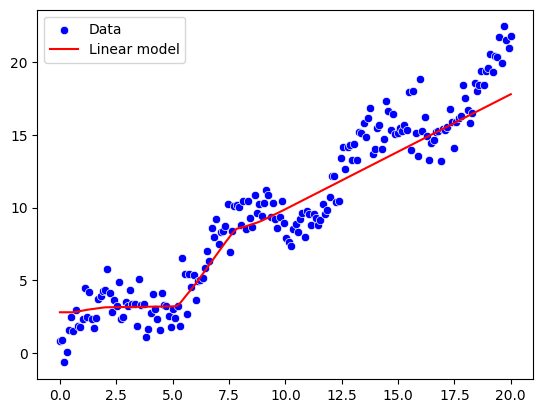

In [32]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
